In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
# import the combined CSV file and have the 'date' column parsed as datetime upon import
df = pd.read_csv('../data/formatted/combined.csv',
                 parse_dates=['date'])

In [3]:
# preview the contents
print(df.head())

        date    open    high     low   close  volume ticker
0 1983-03-21  8.9675  9.0300  8.8101  8.9975  510800    AMD
1 1983-03-22  8.7176  8.9675  8.4977  8.4977  328000    AMD
2 1983-03-23  8.4977  8.8101  8.4677  8.7176  427200    AMD
3 1983-03-24  8.7176  8.7801  8.6551  8.7801  393200    AMD
4 1983-03-25  8.9051  9.0600  8.7476  8.8726  210400    AMD


In [4]:
# check general types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62320 entries, 0 to 62319
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62320 non-null  datetime64[ns]
 1   open    62320 non-null  float64       
 2   high    62320 non-null  float64       
 3   low     62320 non-null  float64       
 4   close   62320 non-null  float64       
 5   volume  62320 non-null  int64         
 6   ticker  62320 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.3+ MB
None


In [5]:
# check for nulls
print(df.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64


In [6]:
# print the stats for each stock ticker
for ticker in df['ticker'].unique():
    print(ticker, '\n', df.loc[df['ticker'] == ticker].describe(), '\n')

AMD 
                                 date          open          high  \
count                          10337  10337.000000  10337.000000   
mean   2003-09-12 09:27:48.530521344     20.074938     20.495762   
min              1983-03-21 00:00:00      1.620000      1.690000   
25%              1993-06-09 00:00:00      6.190000      6.331000   
50%              2003-09-10 00:00:00     11.000000     11.250000   
75%              2013-12-13 00:00:00     17.245300     17.560200   
max              2024-03-22 00:00:00    213.410000    227.300000   
std                              NaN     28.138655     28.712830   

                low         close        volume  
count  10337.000000  10337.000000  1.033700e+04  
mean      19.629457     20.067434  2.055504e+07  
min        1.610000      1.620000  3.200000e+03  
25%        6.062500      6.180000  1.797000e+06  
50%       10.750000     10.990000  8.632800e+06  
75%       16.900000     17.245300  2.665750e+07  
max      208.220000    211.3800

In [35]:
# a simple function to plot the 
def line_graph(df, ticker, col):
    x = df[df['ticker'] == ticker]['date']
    y = df[df['ticker'] == ticker][col]

    fig, ax = plt.subplots(figsize=(16, 8))
    #ax.plot(x, y)
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    sns.lineplot(x=x, y=y, ax=ax)
    ax.set_title(ticker + ' : ' + col.capitalize())
    plt.show()

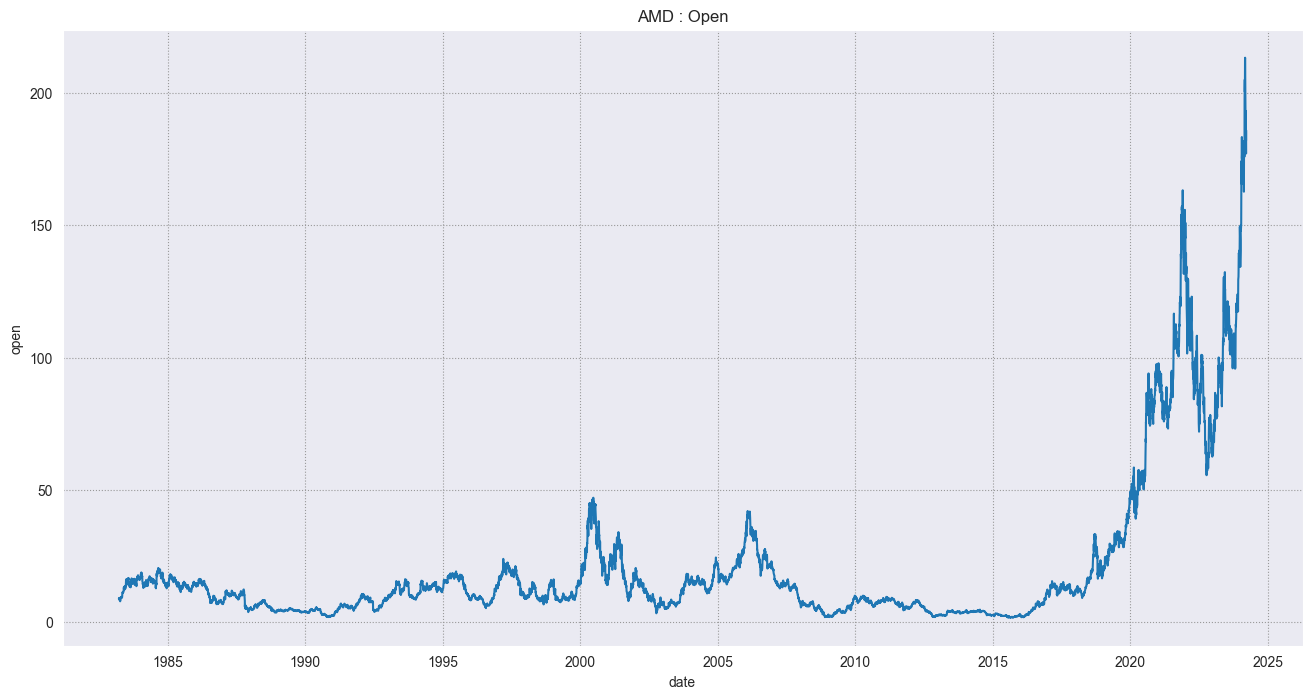

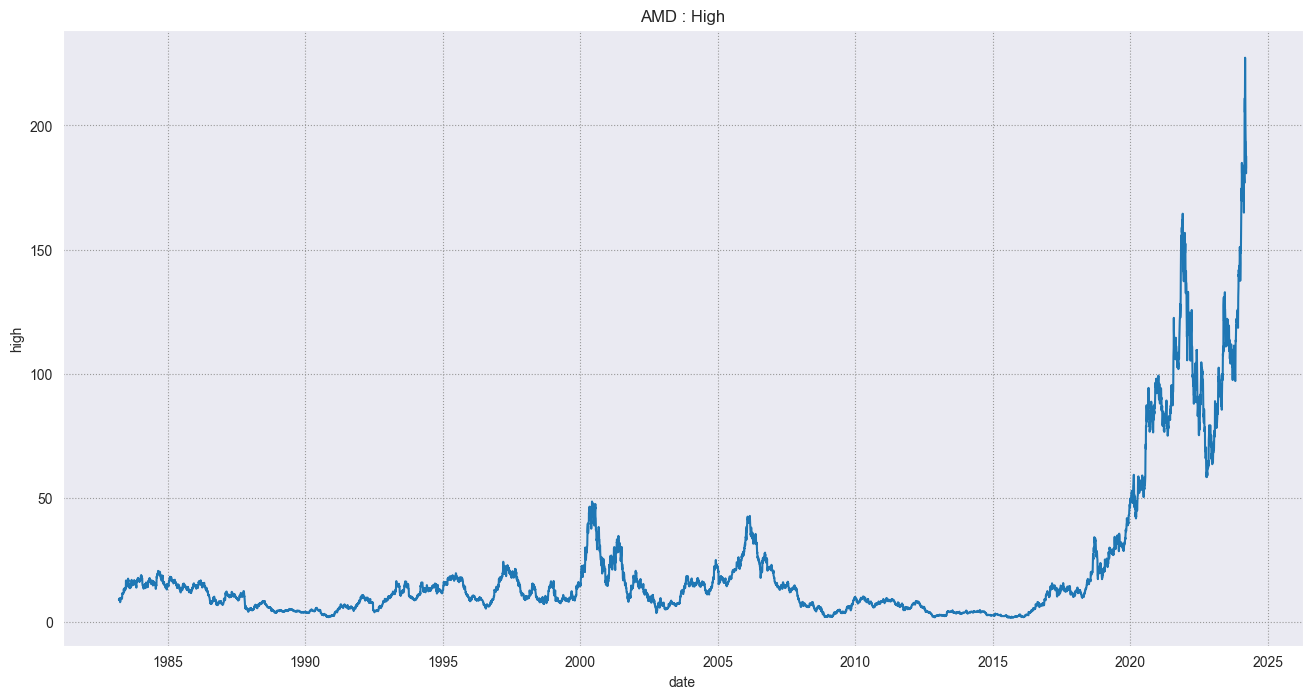

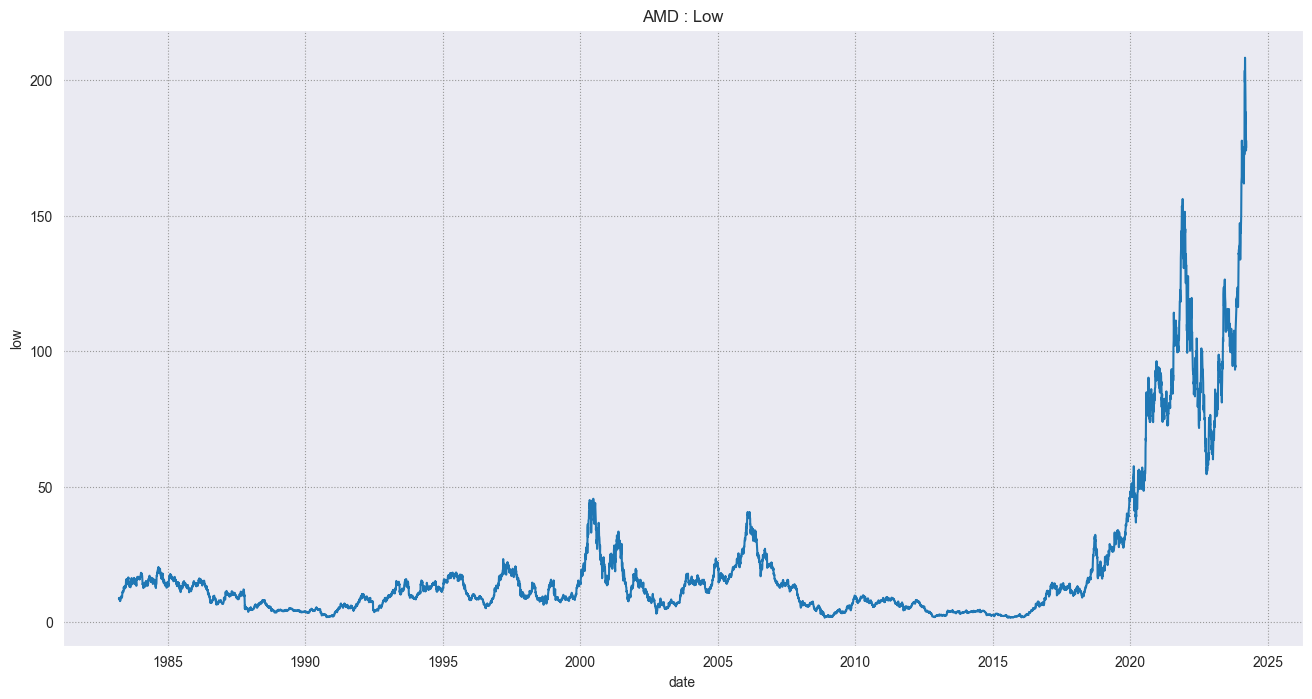

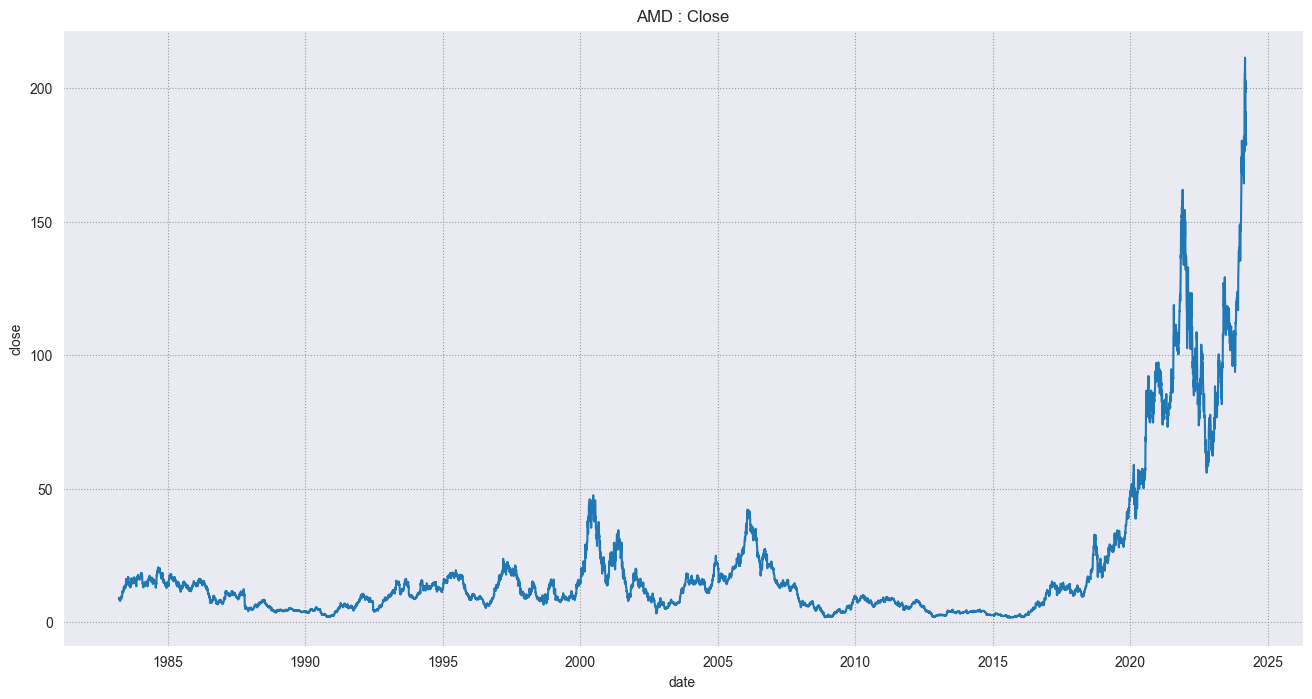

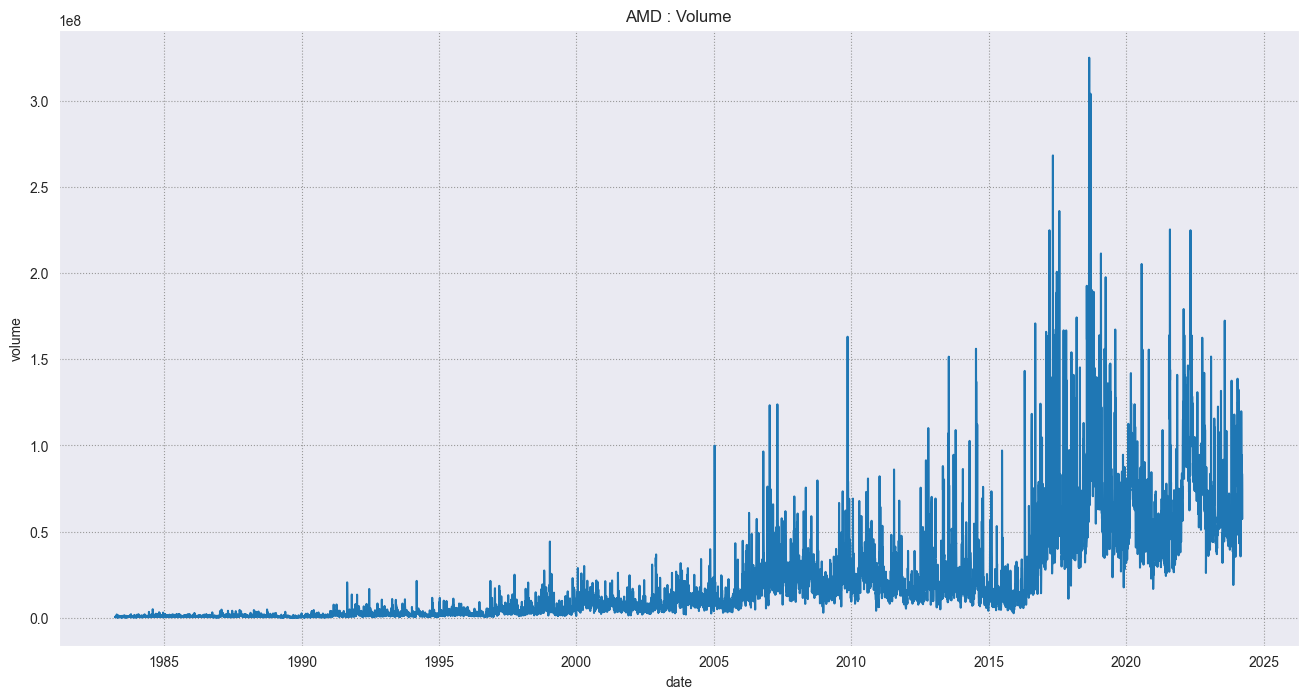

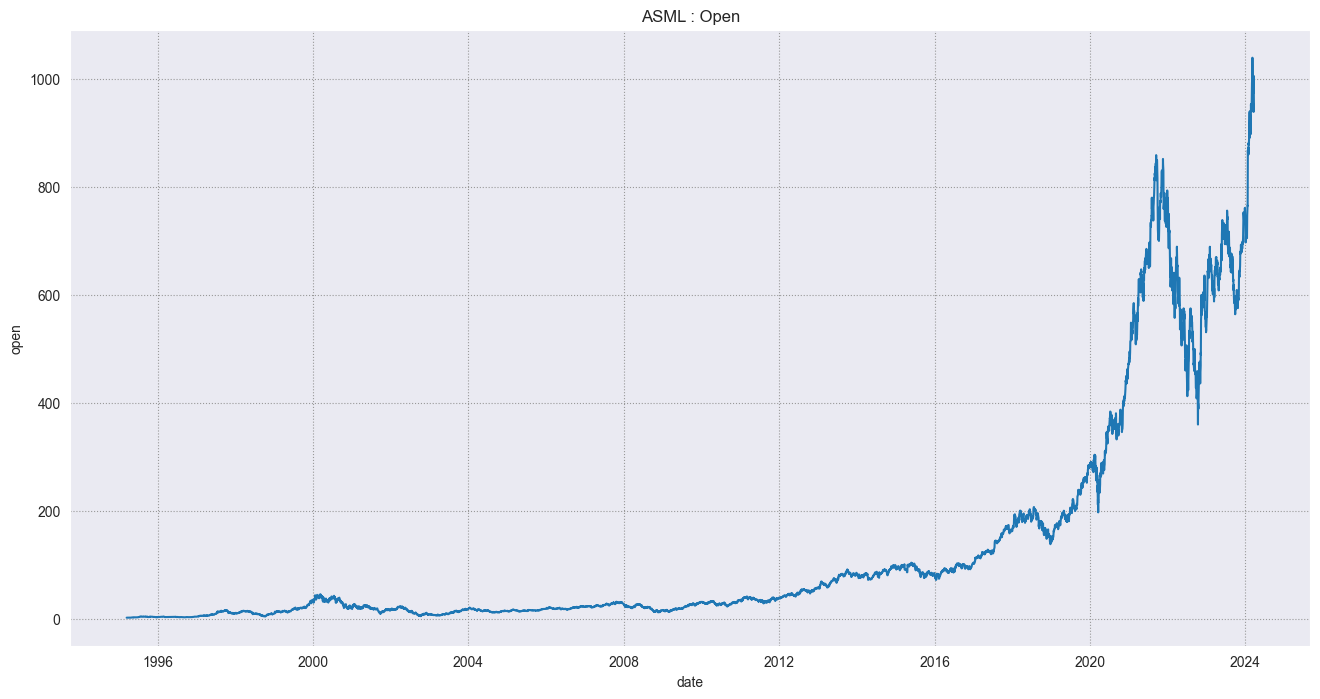

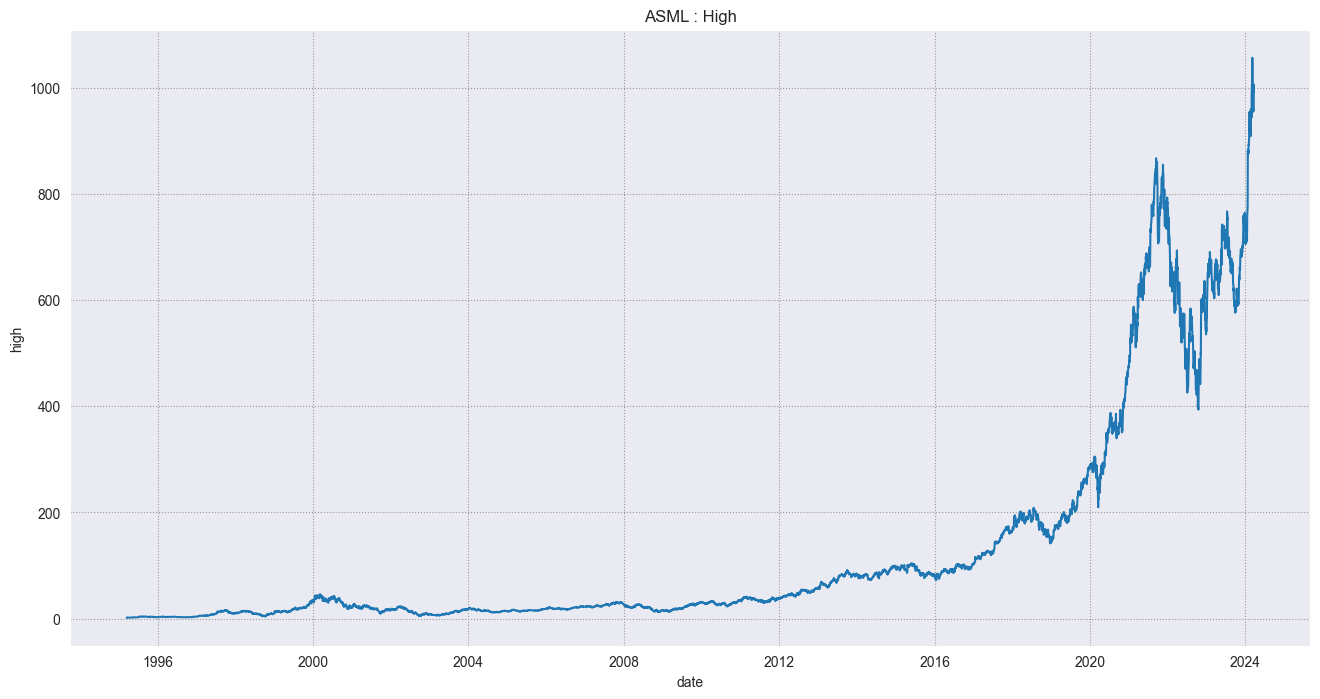

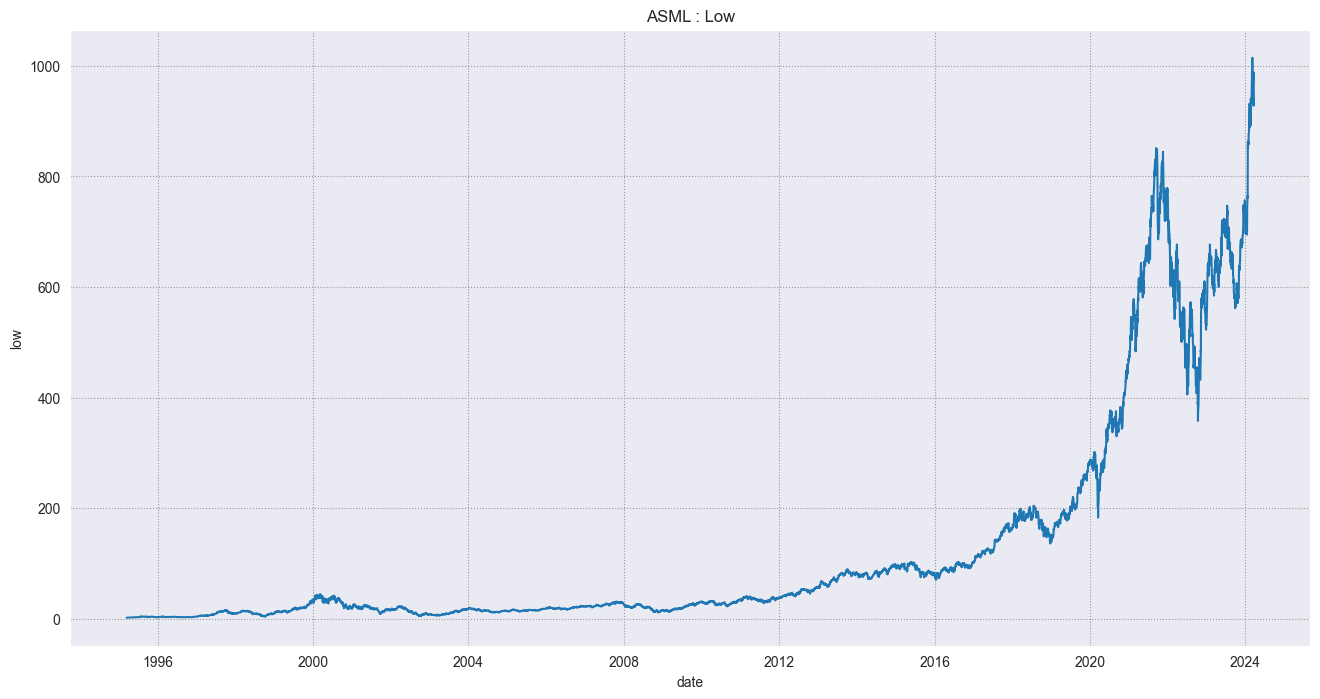

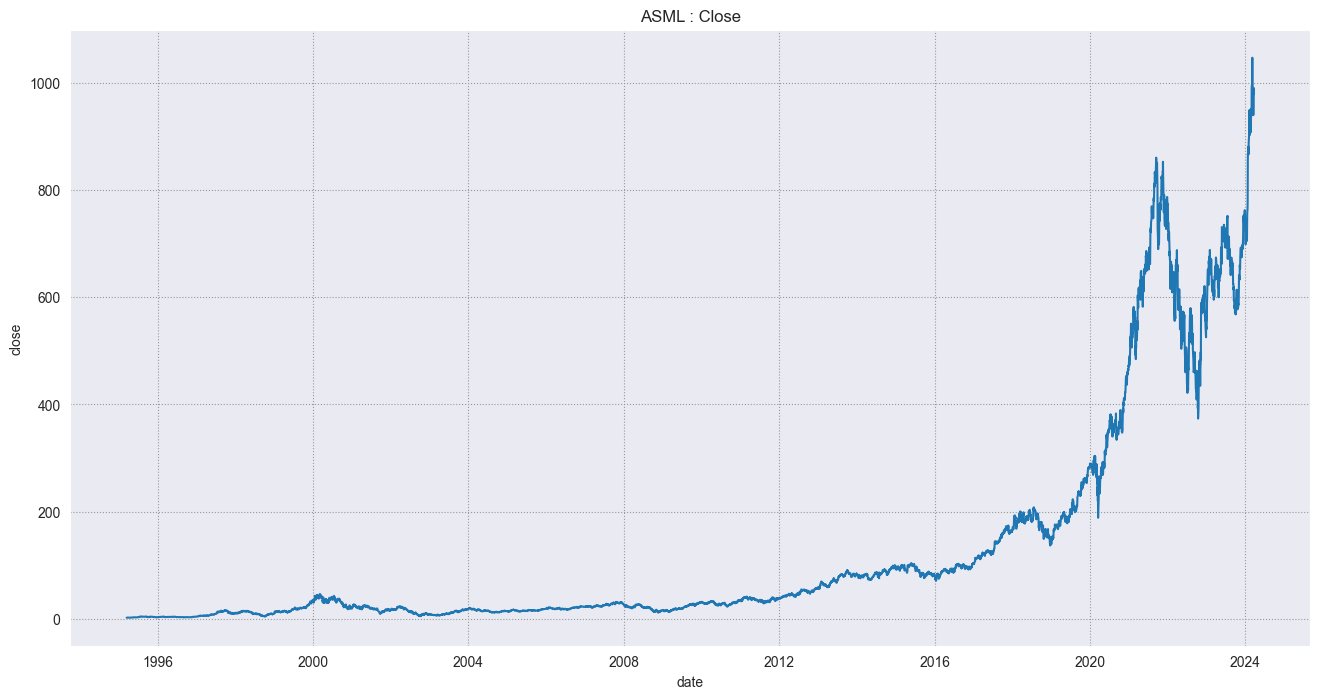

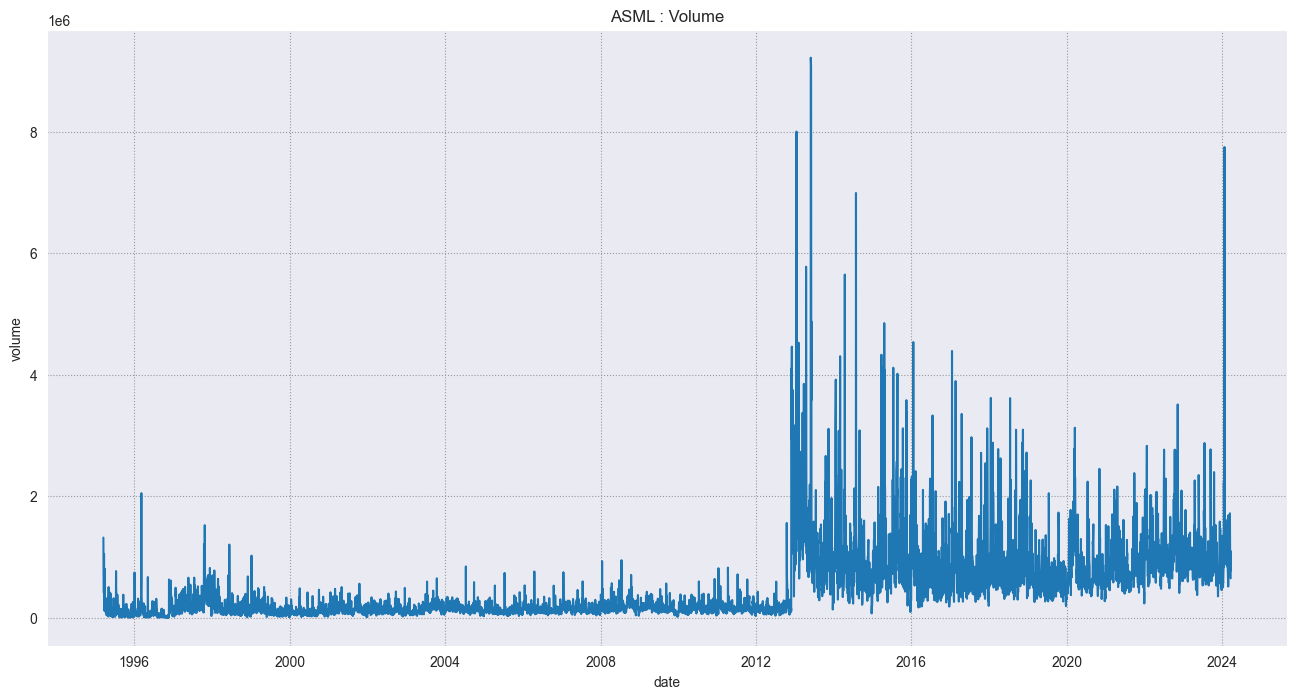

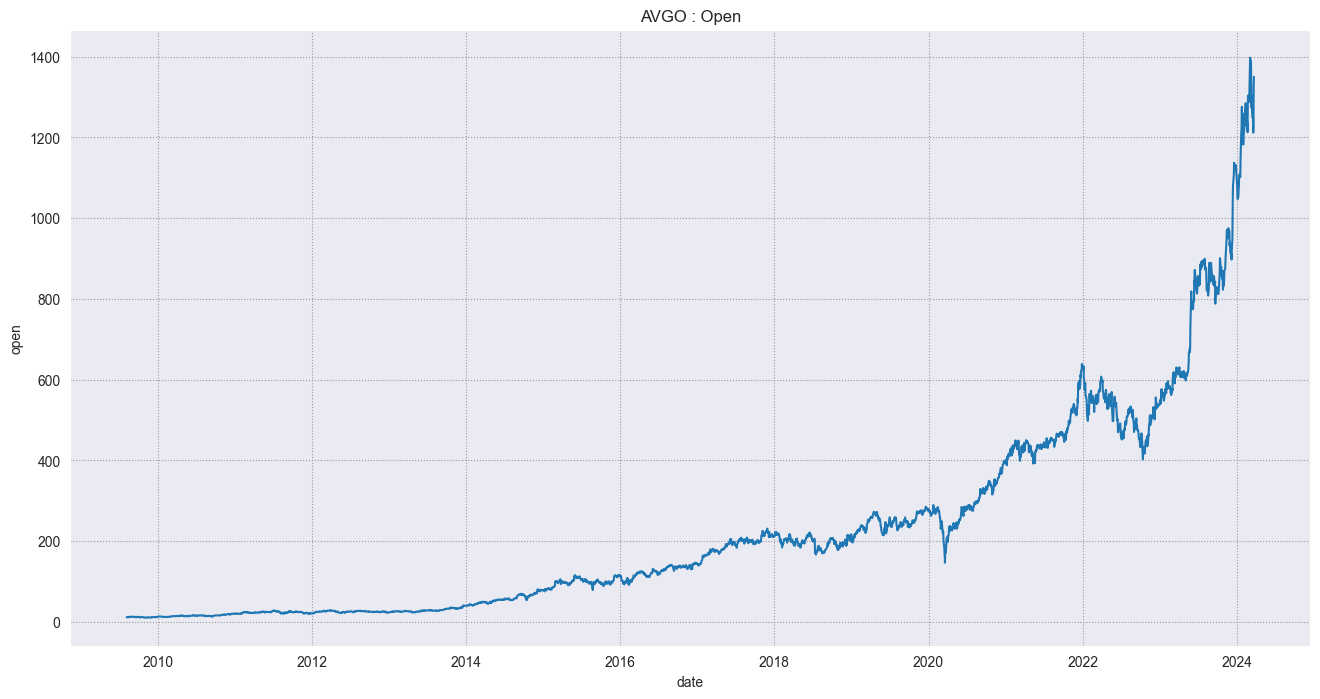

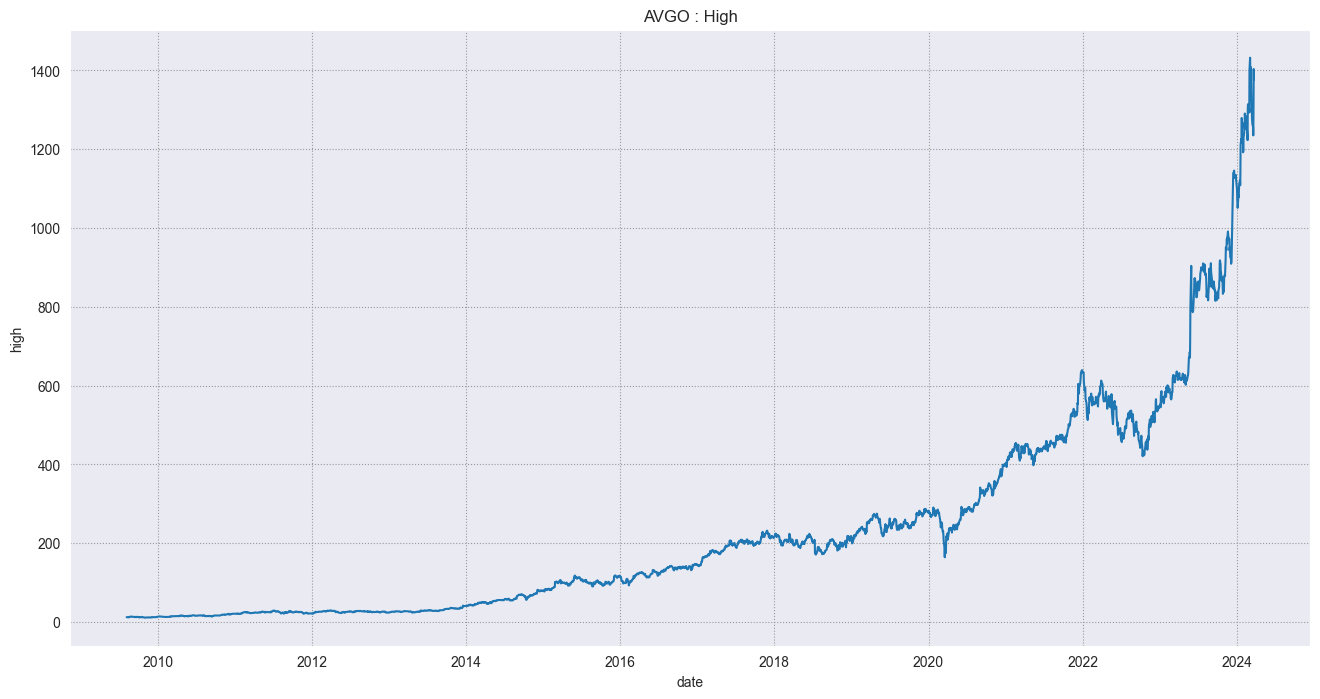

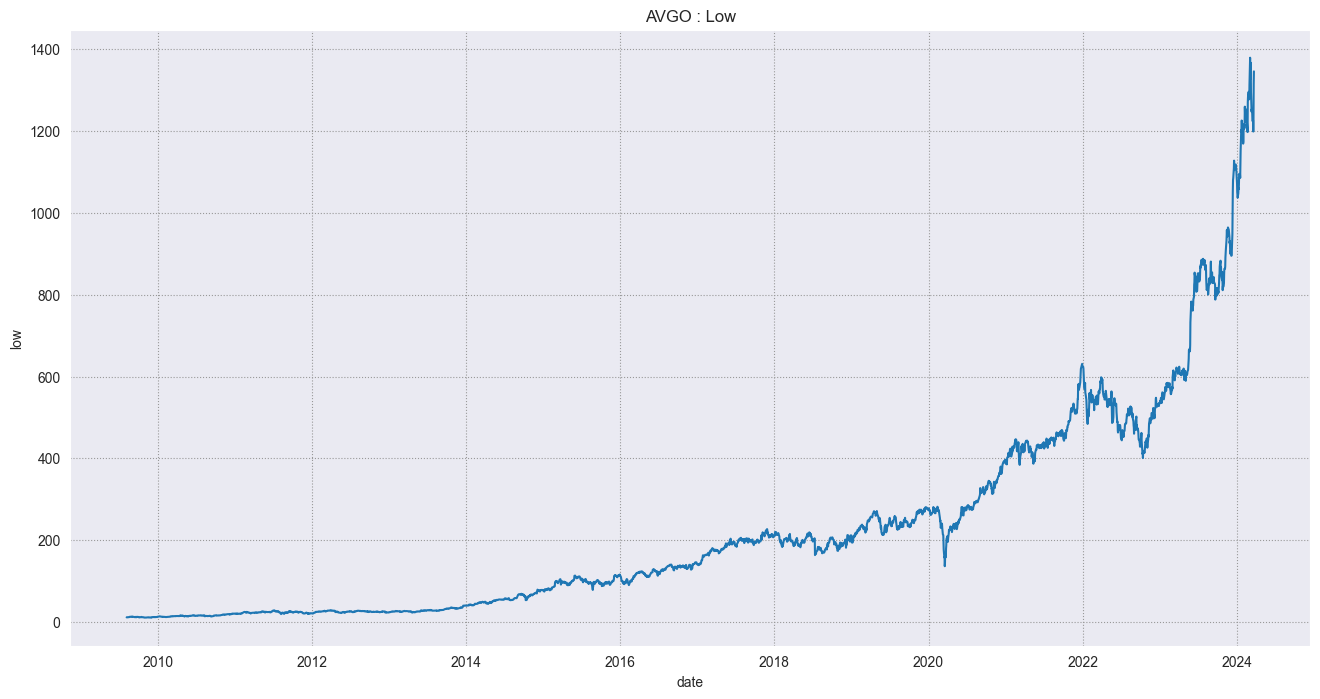

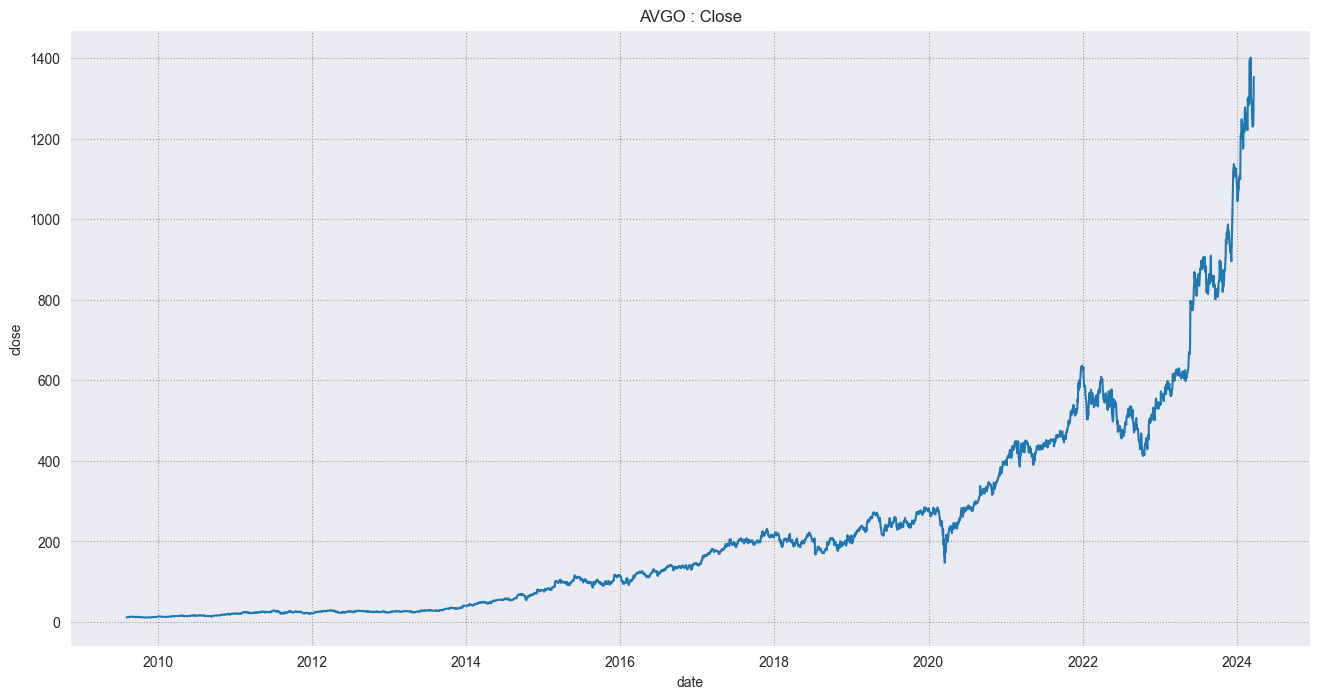

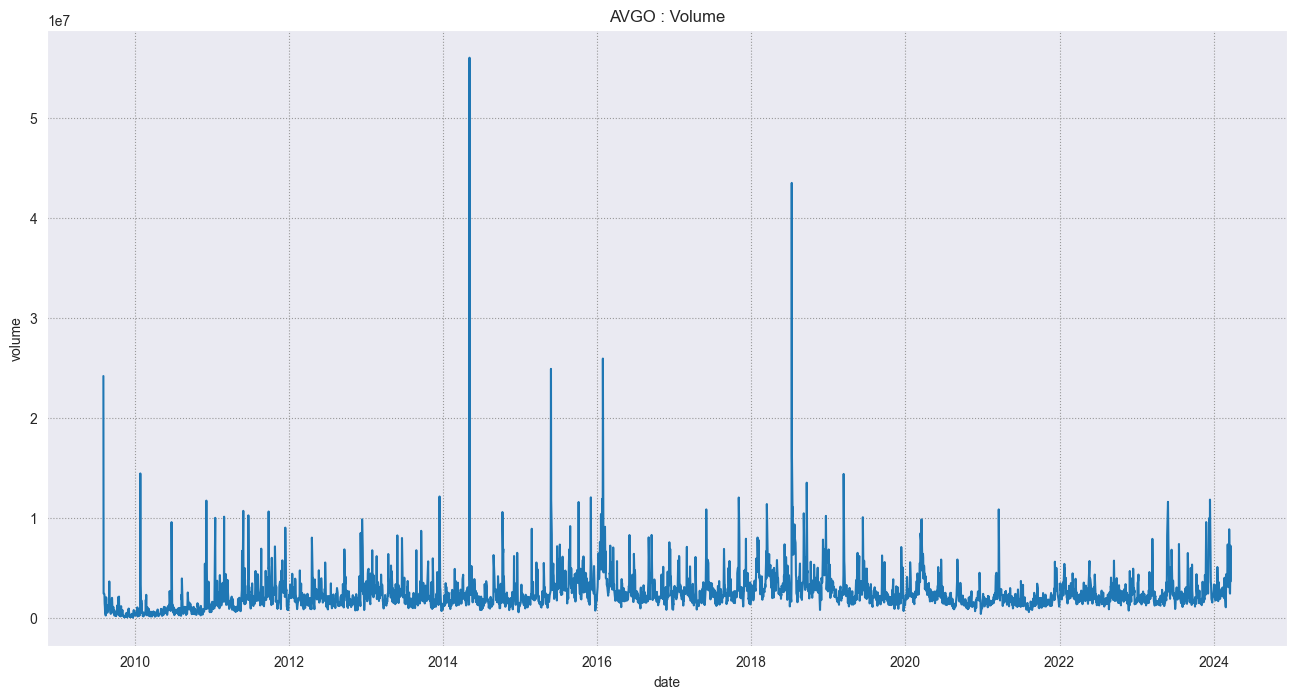

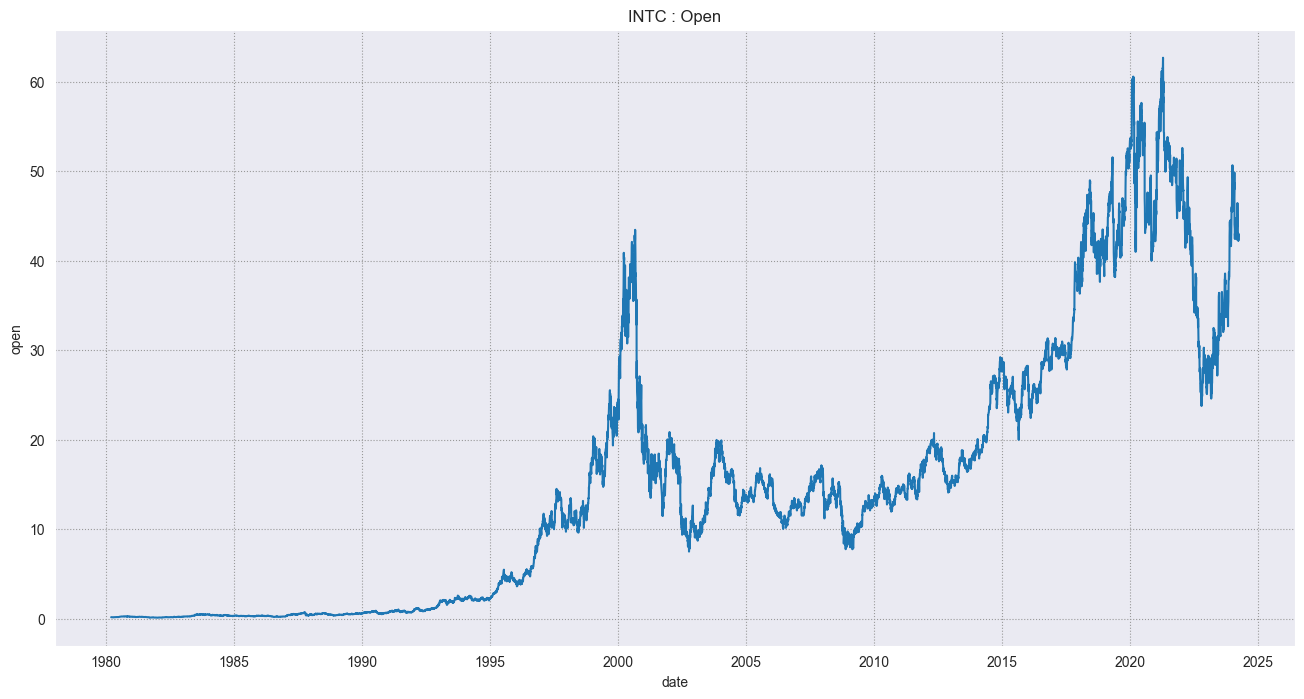

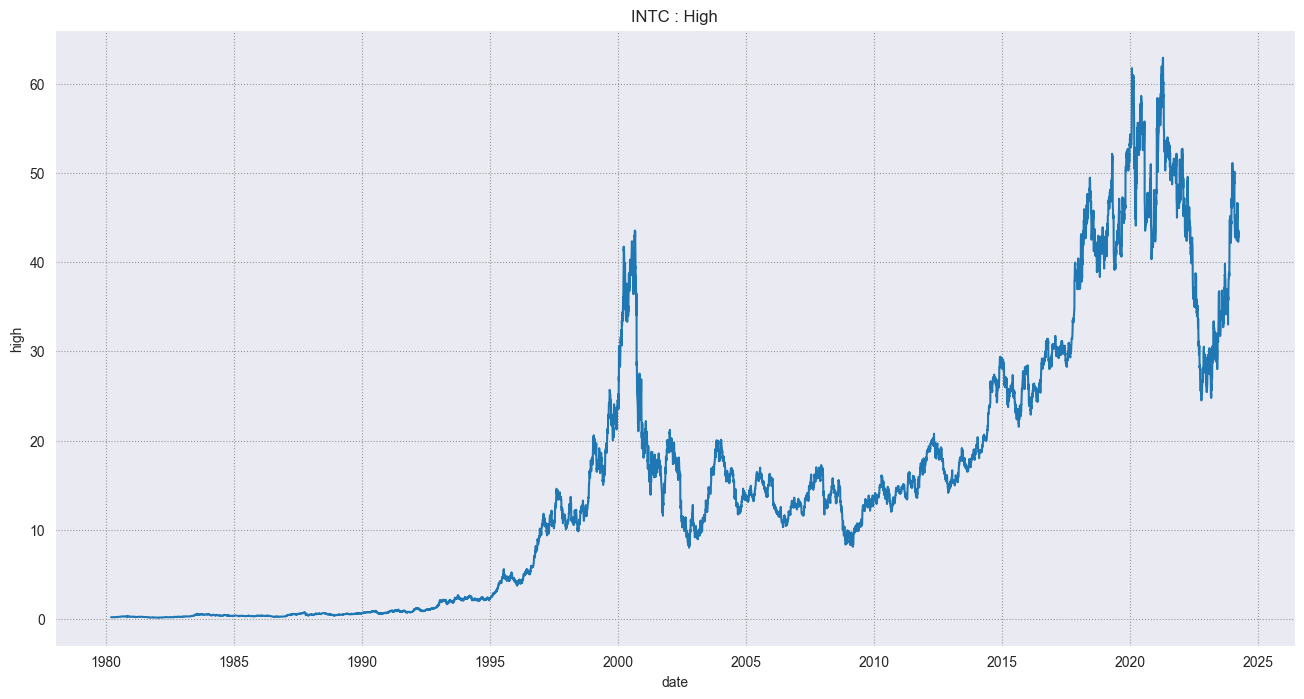

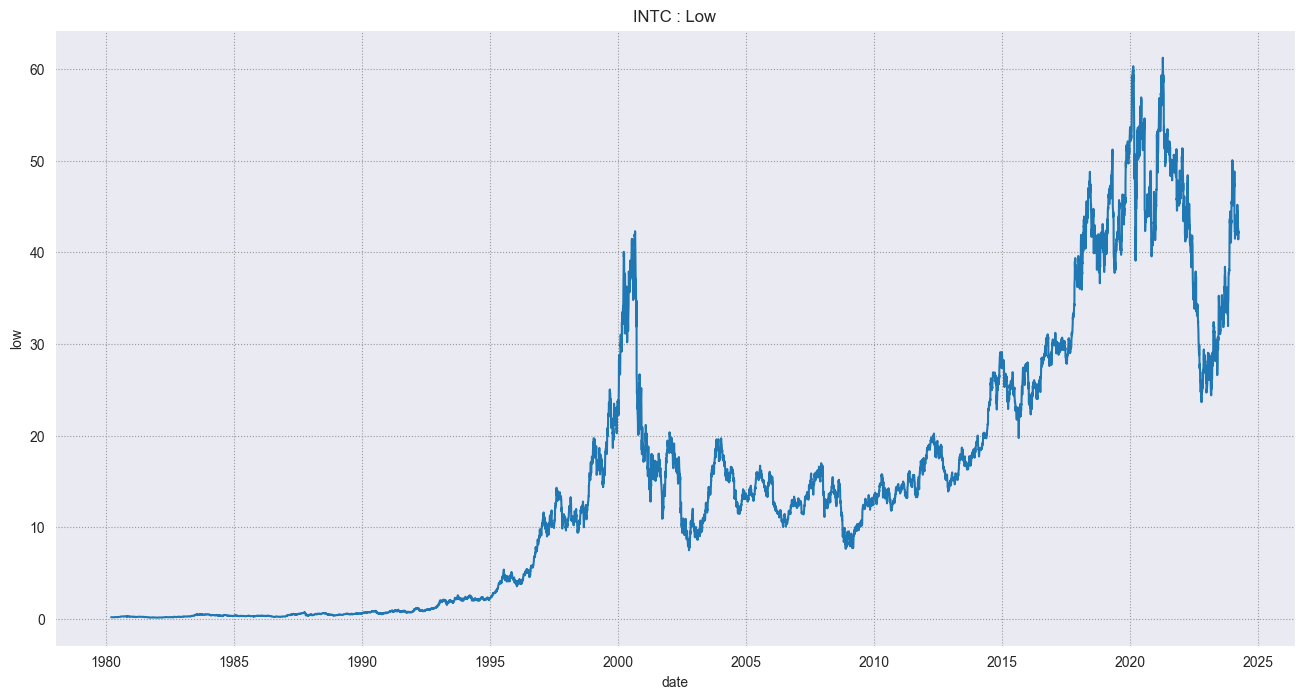

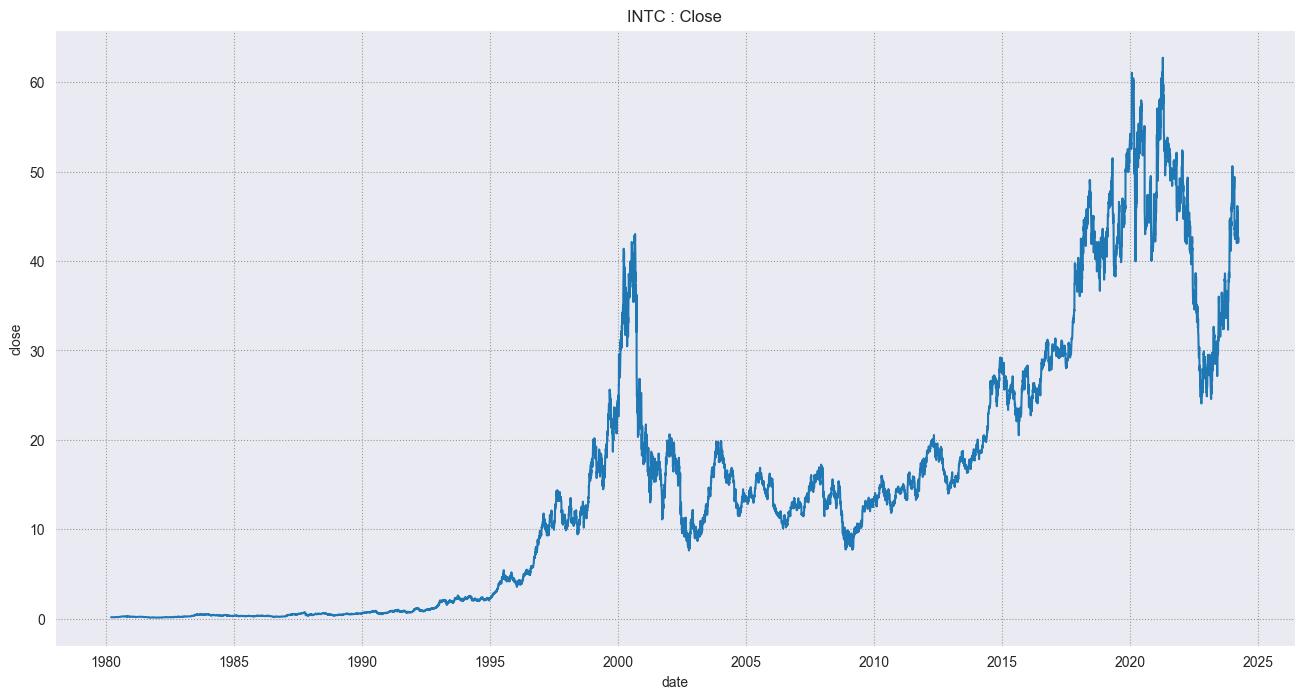

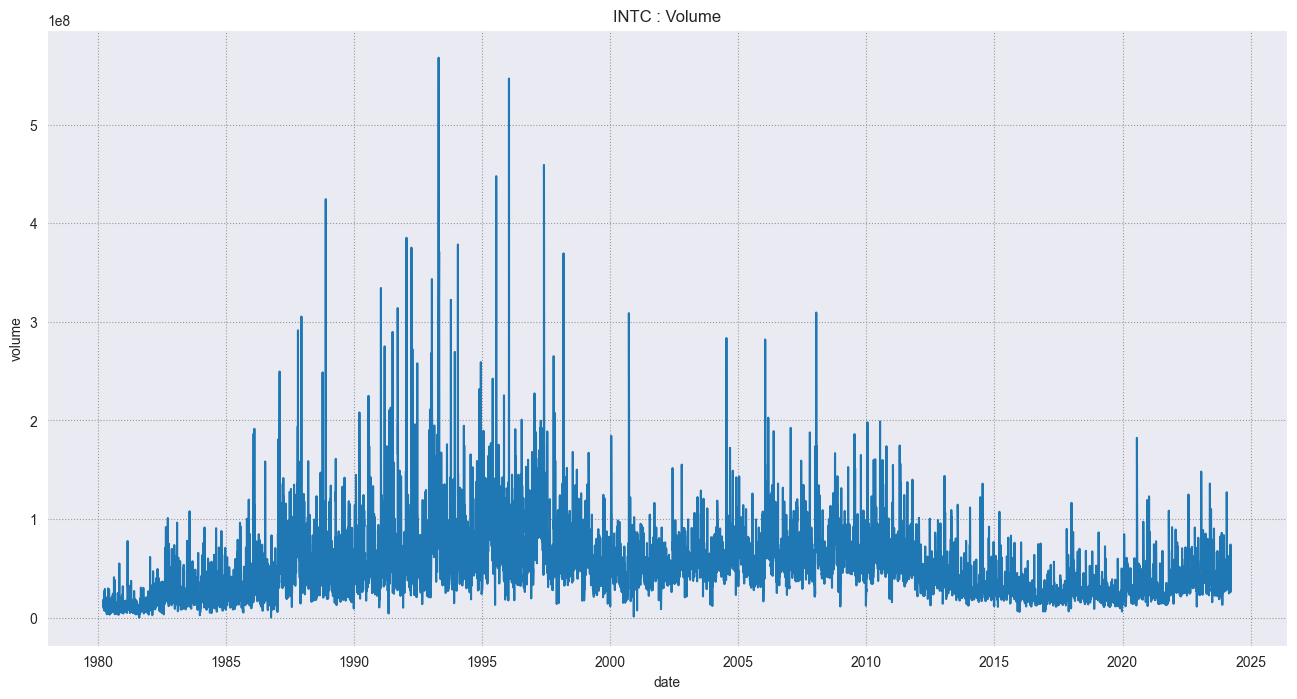

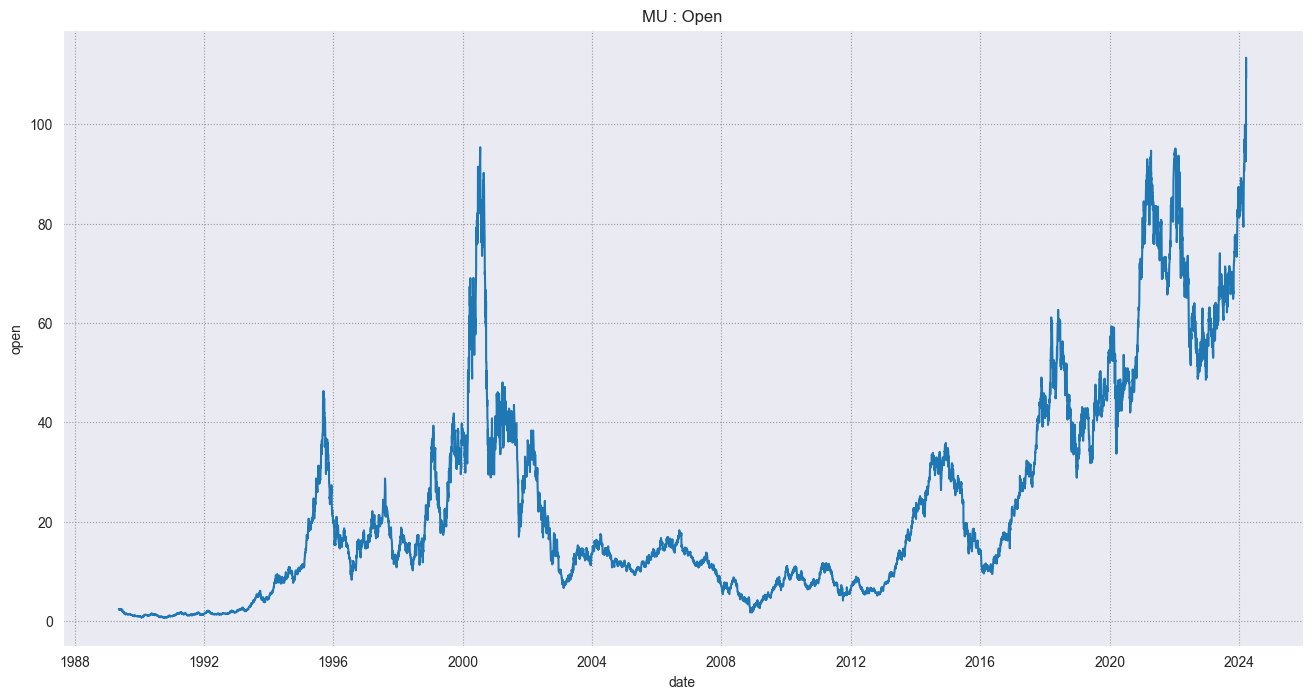

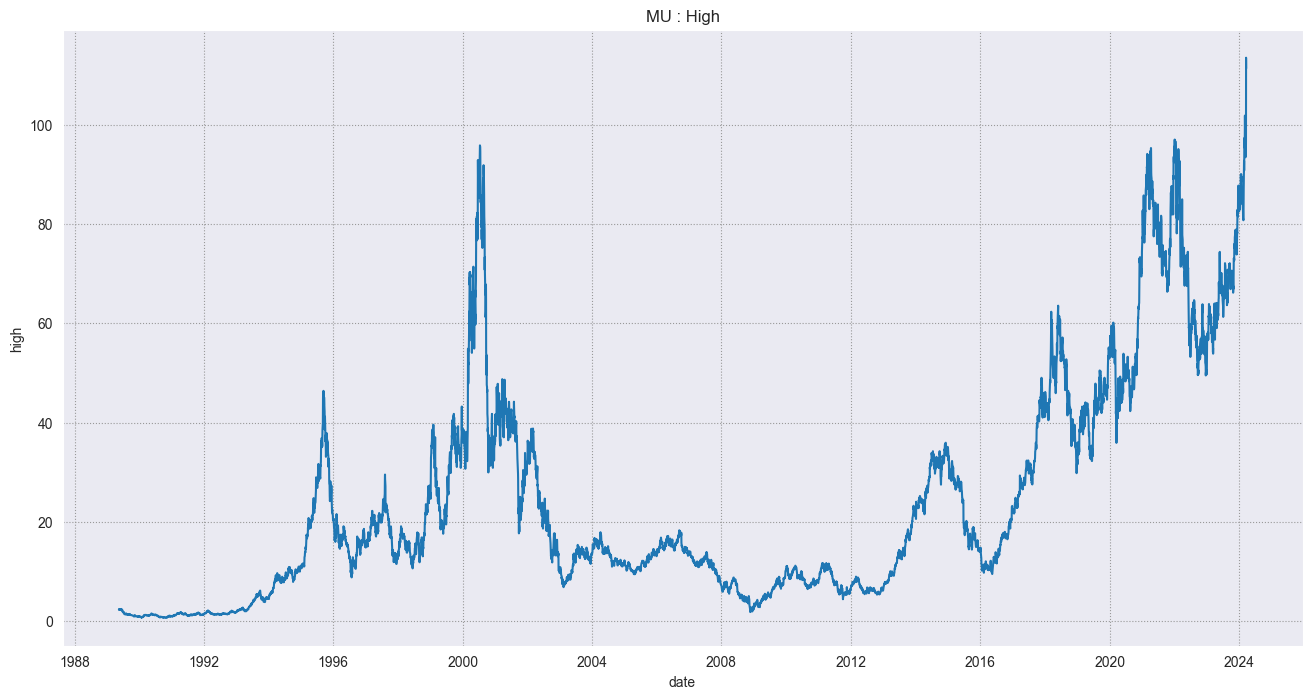

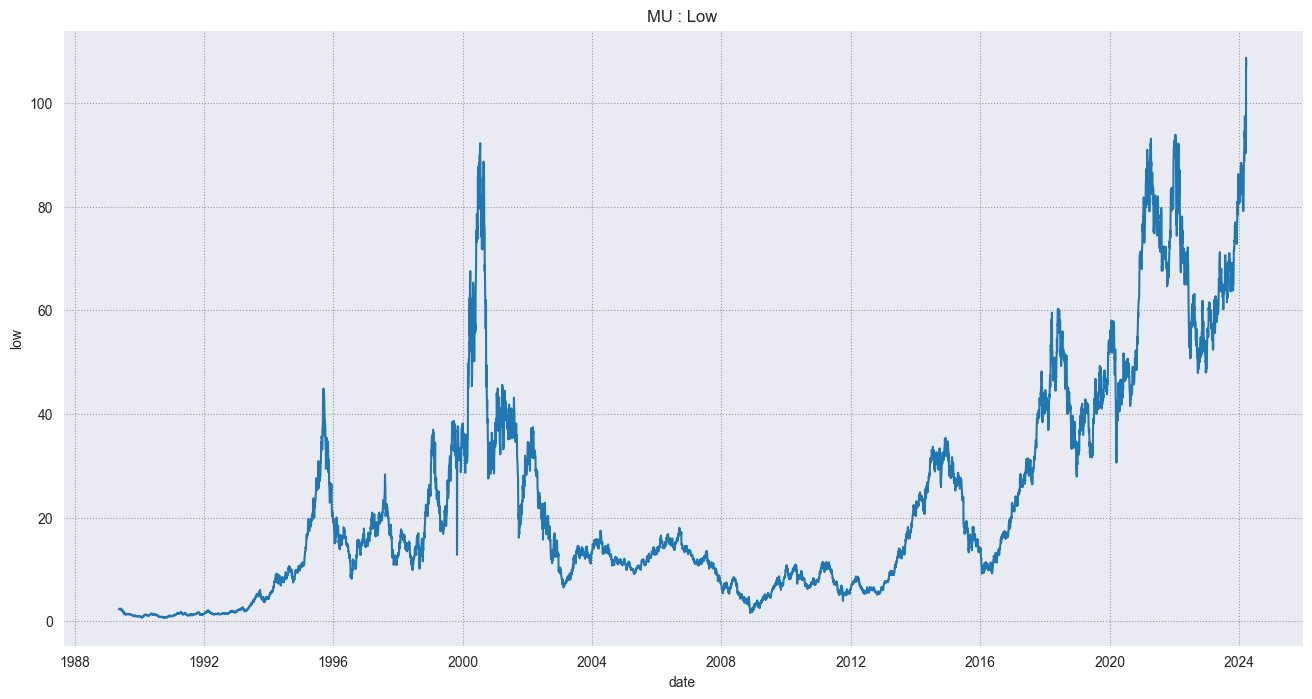

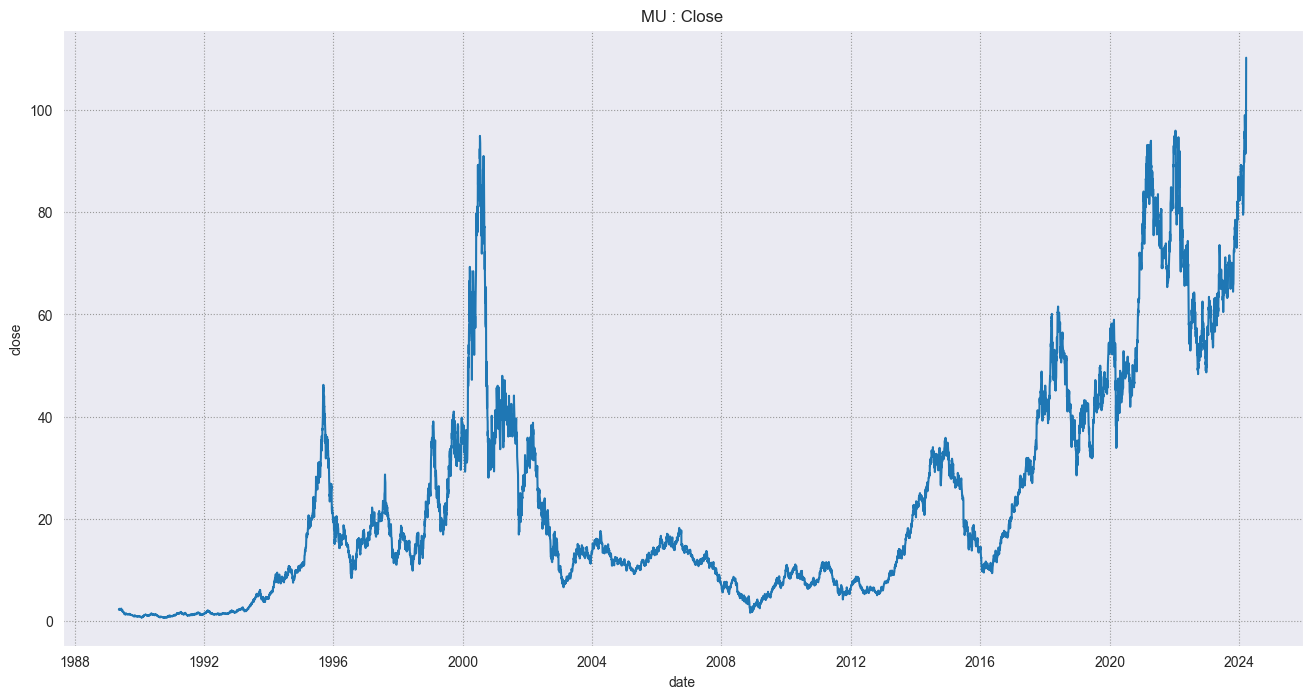

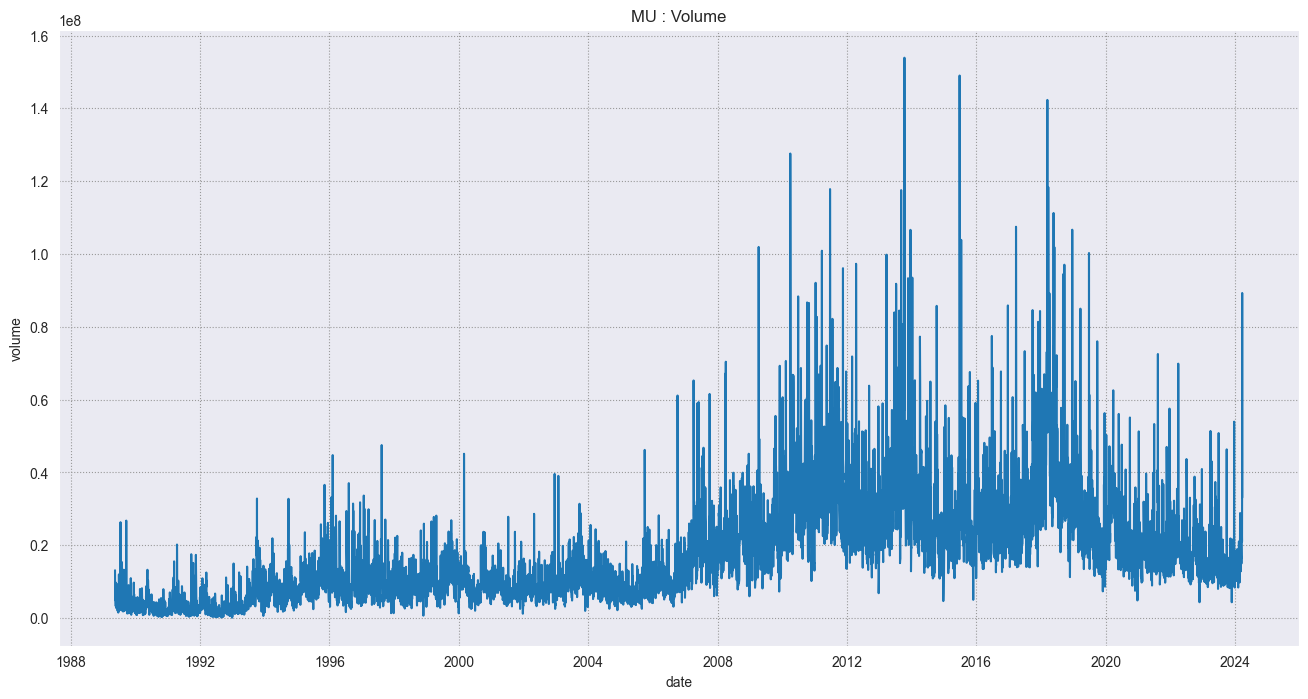

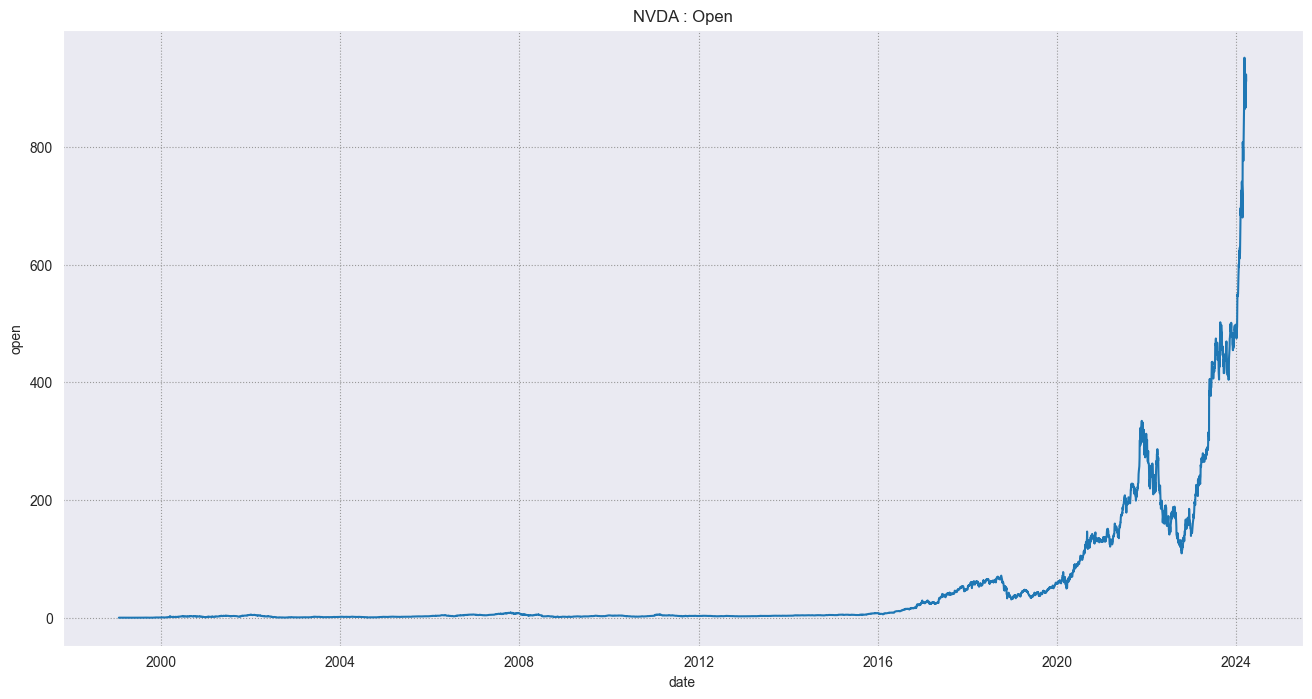

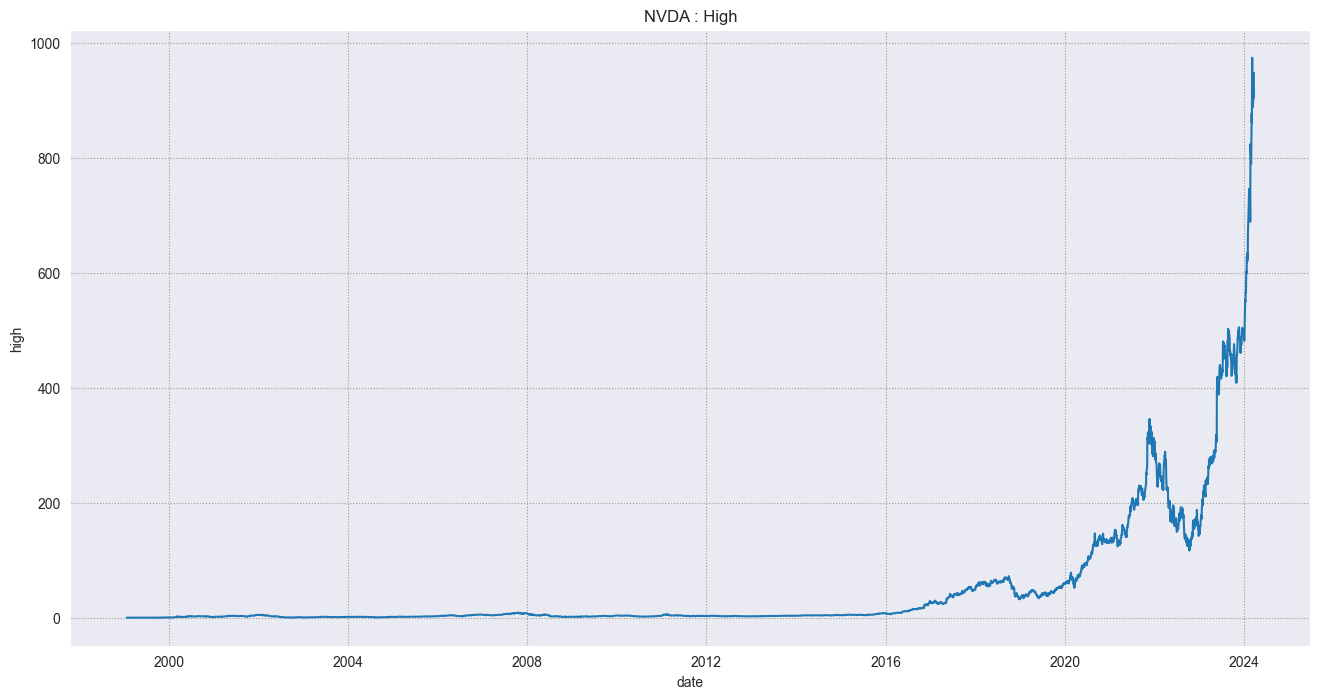

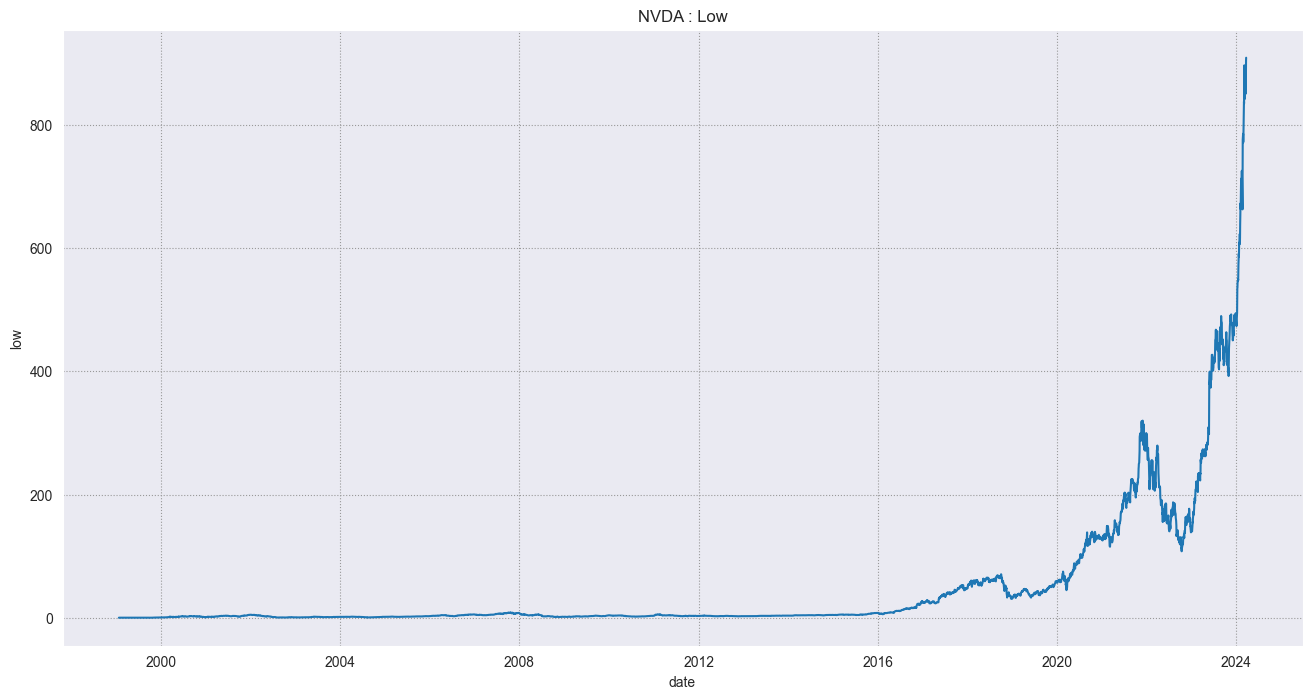

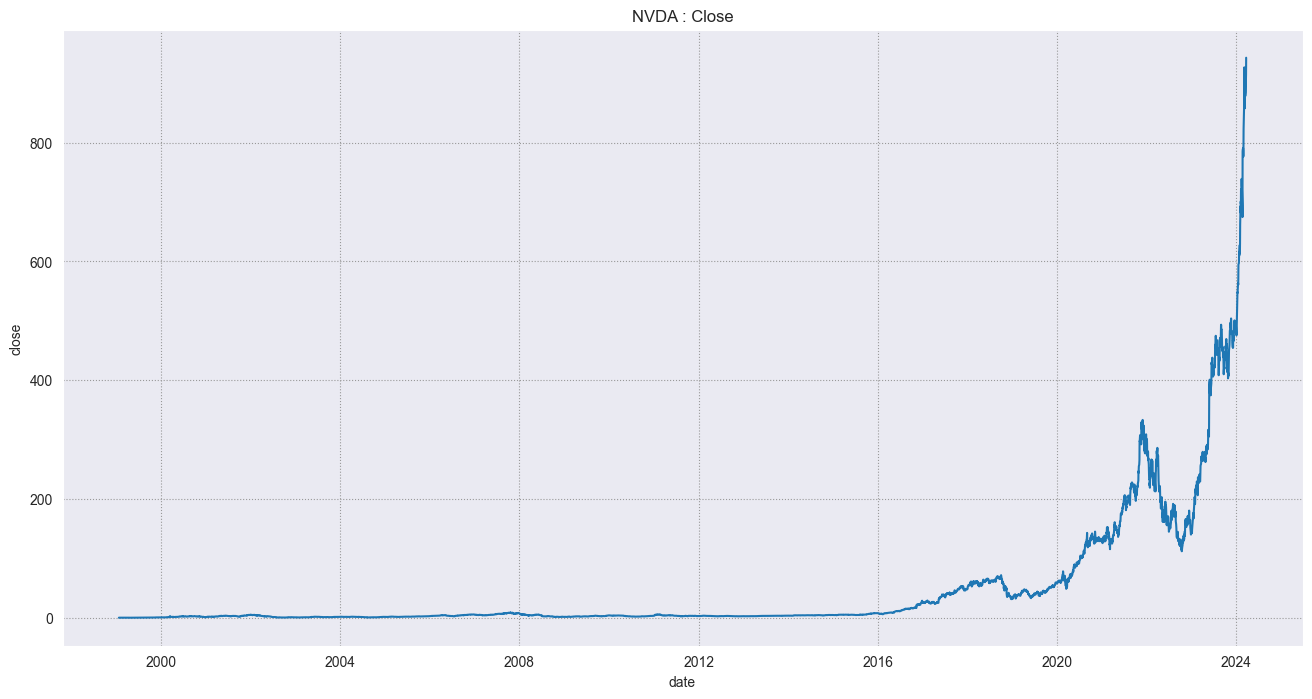

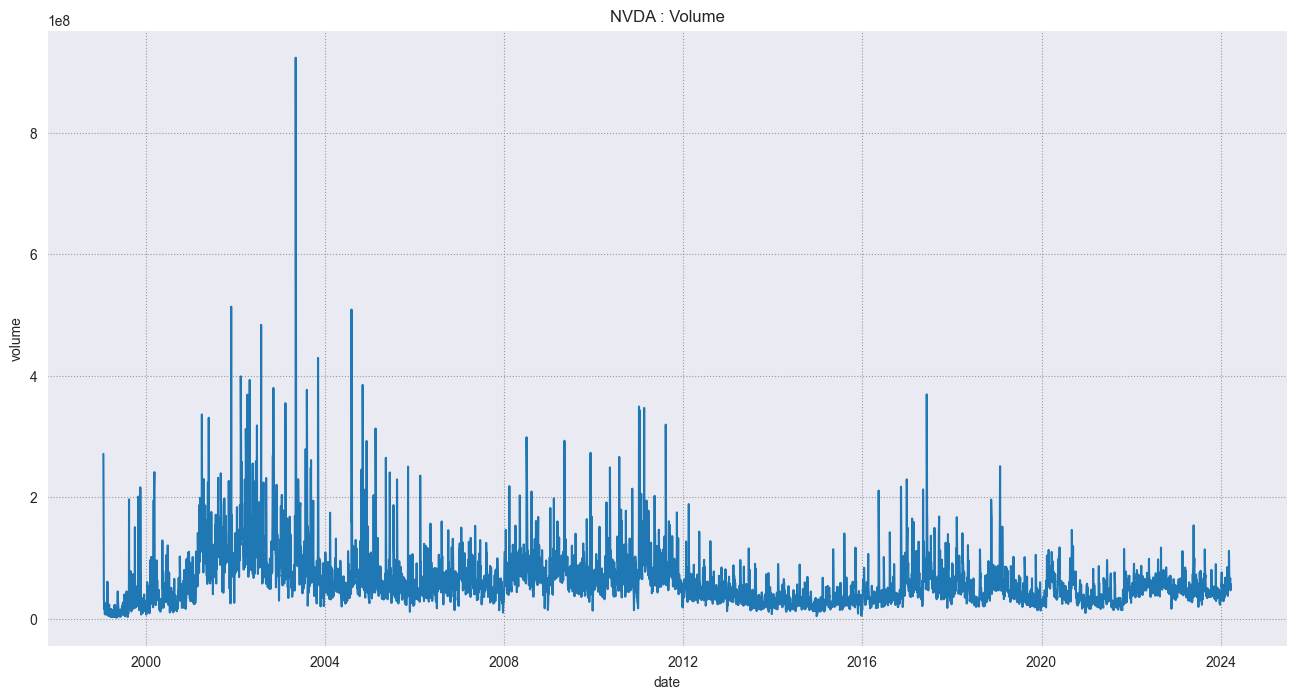

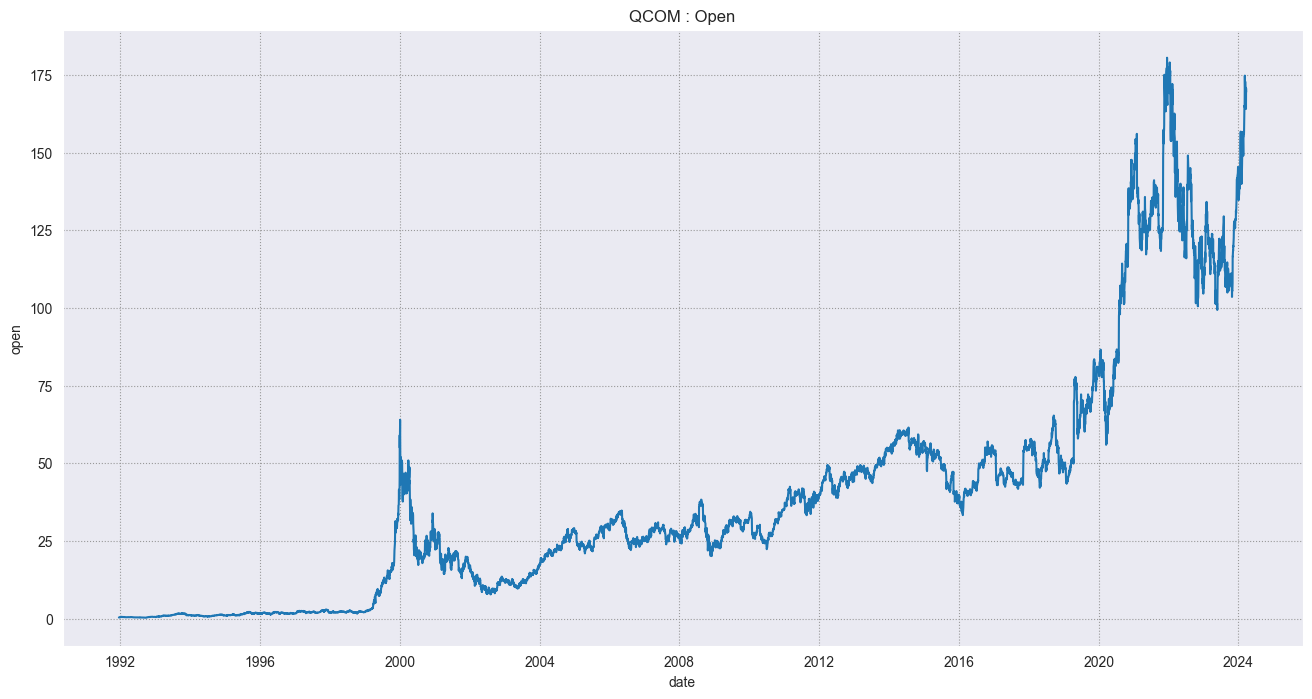

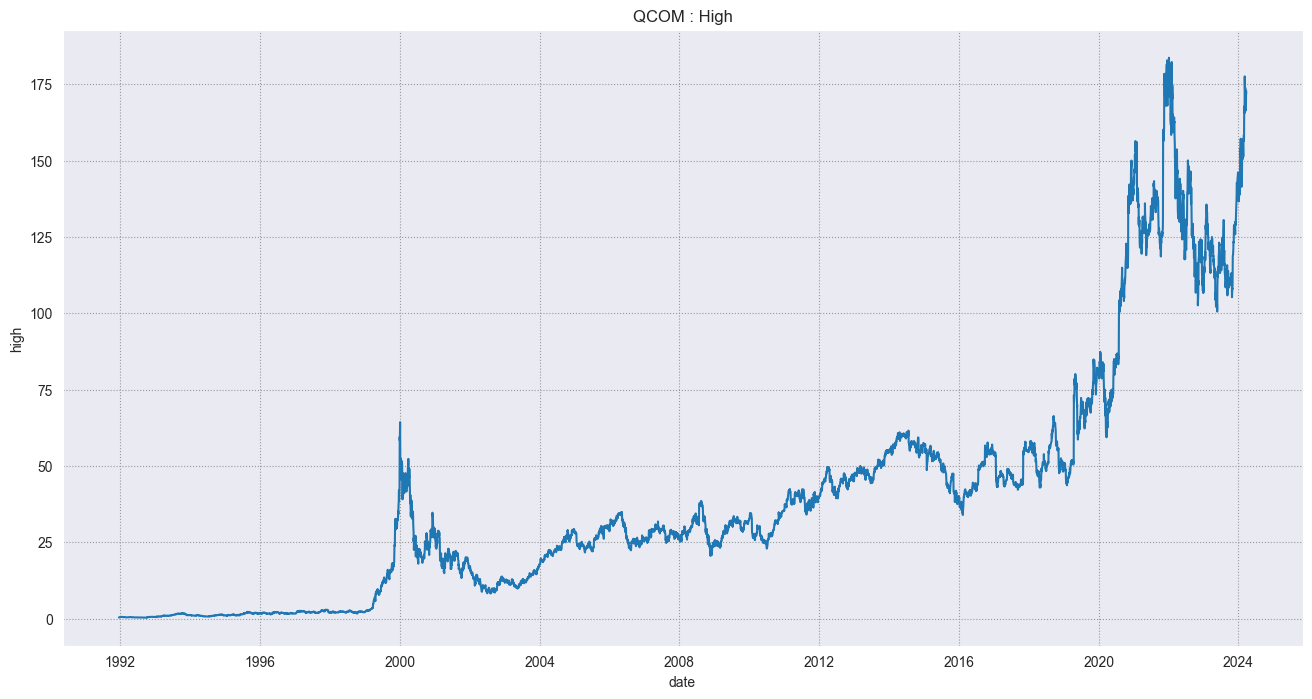

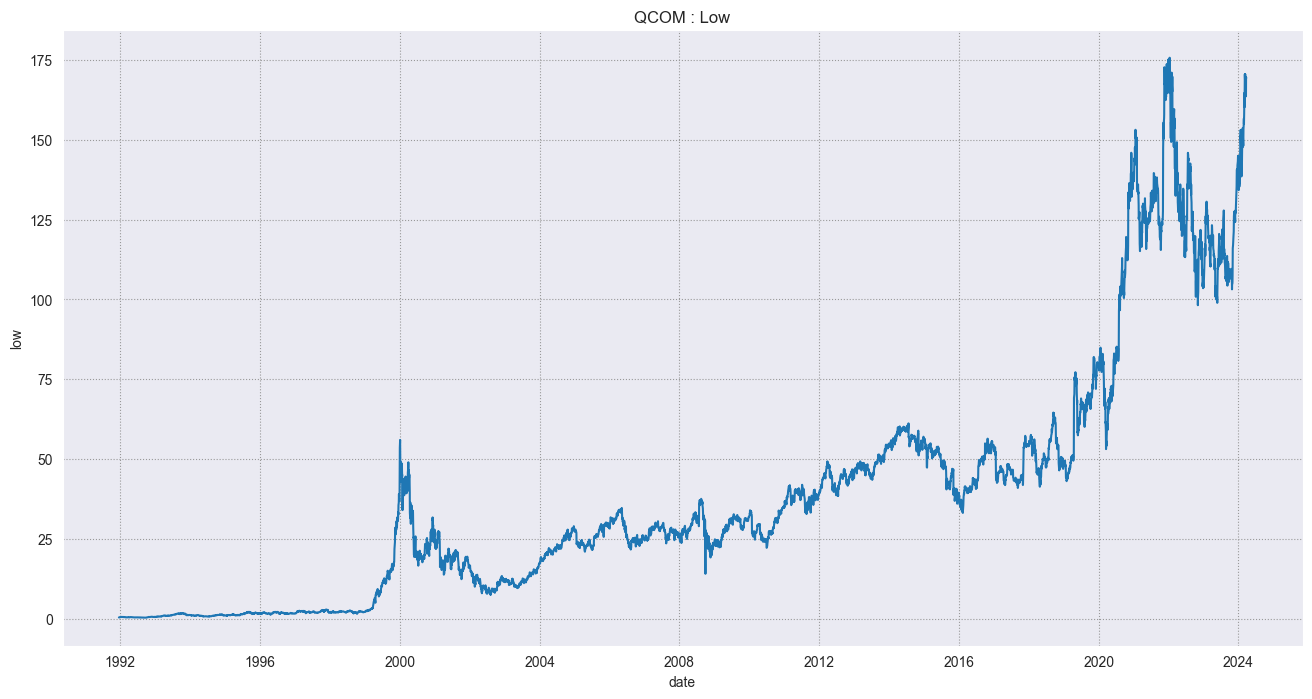

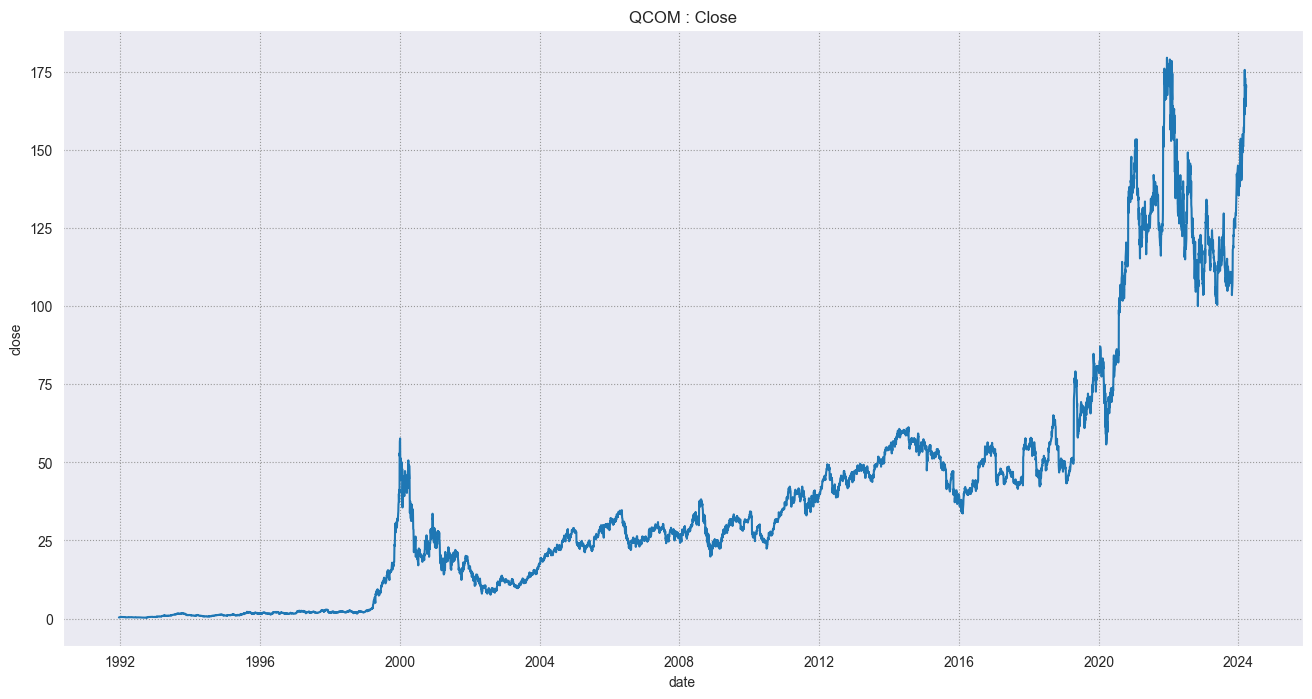

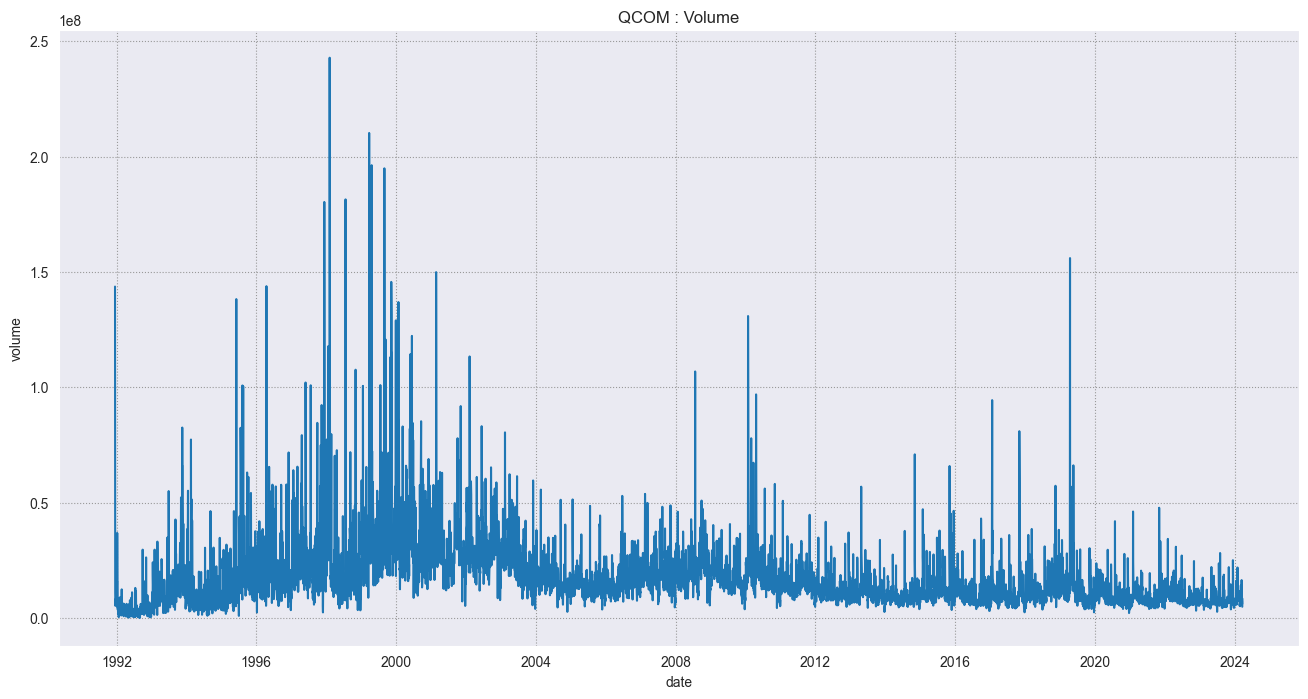

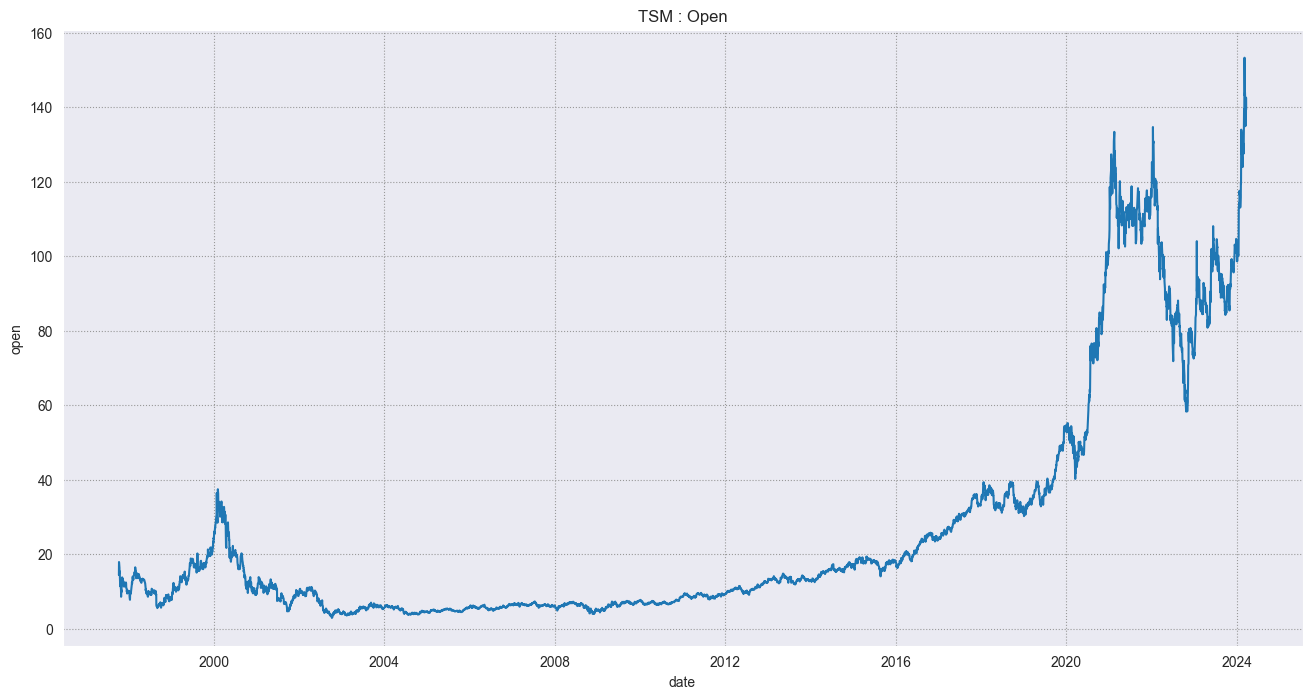

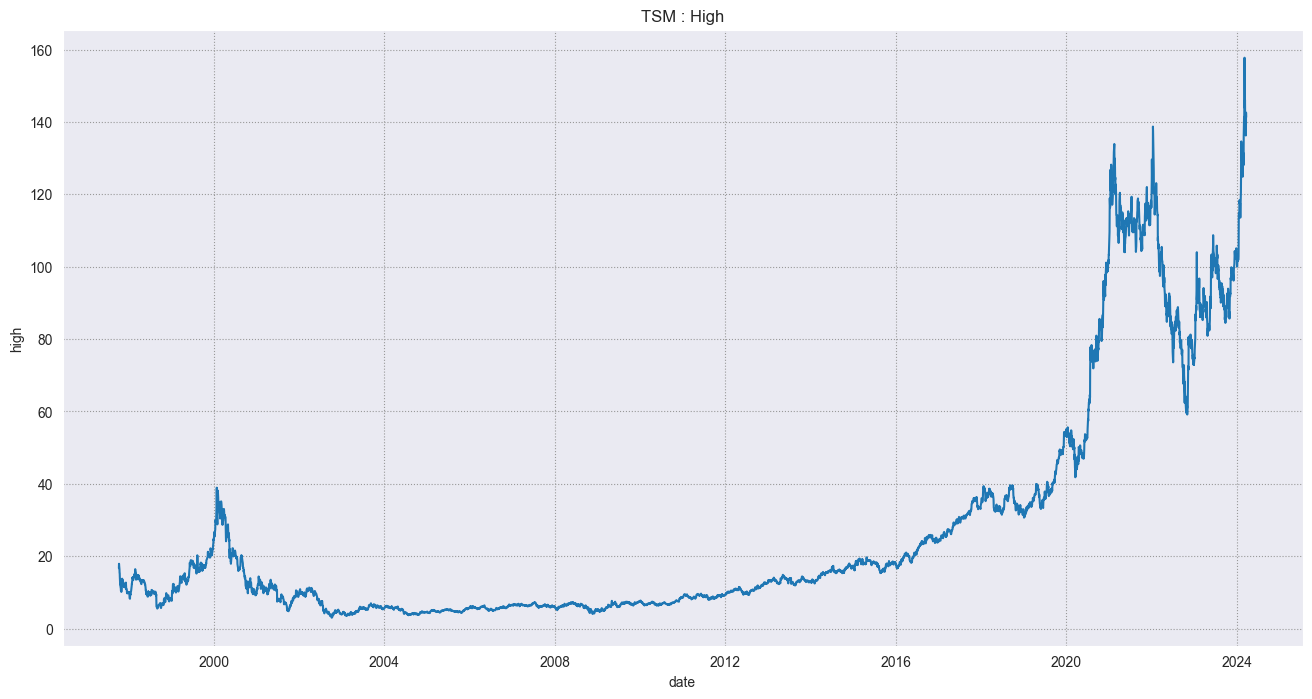

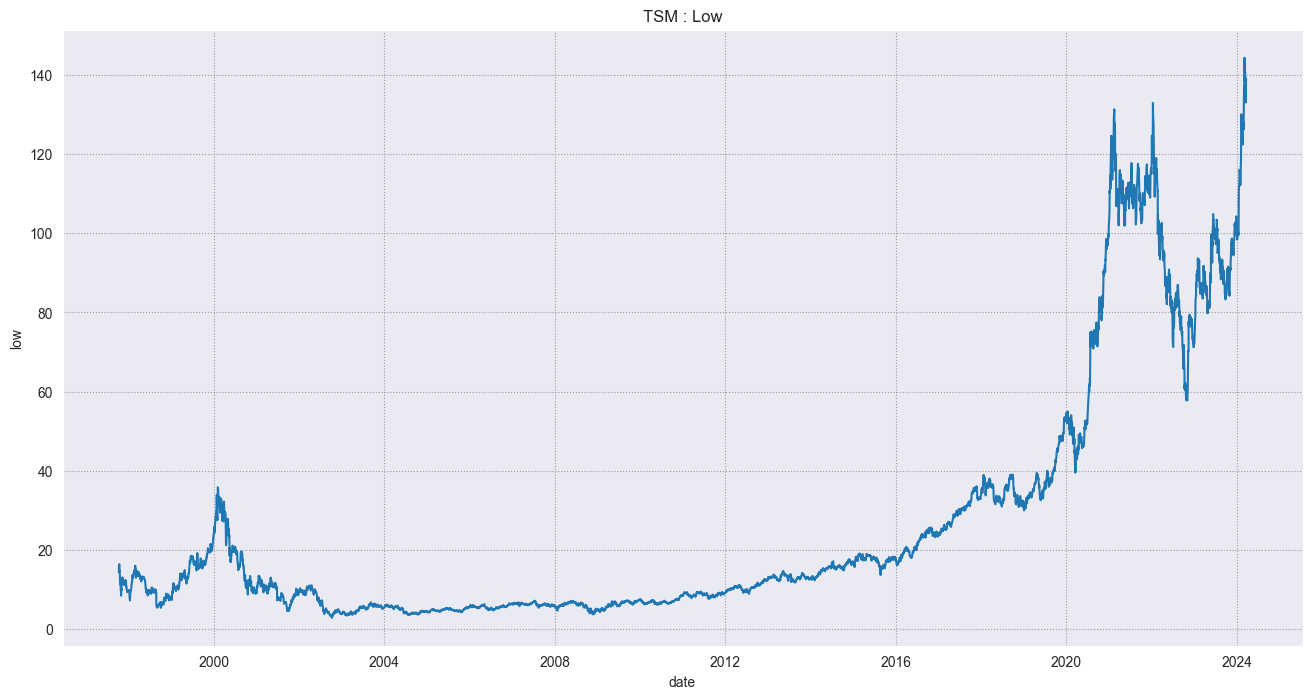

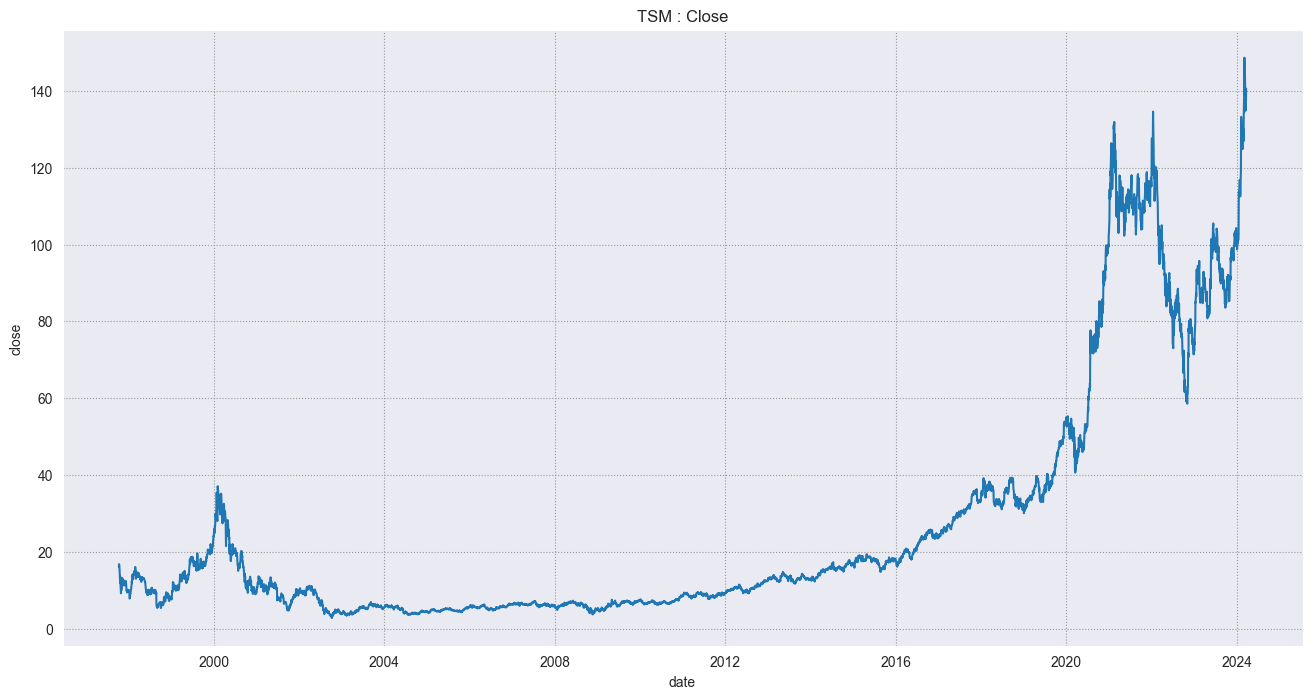

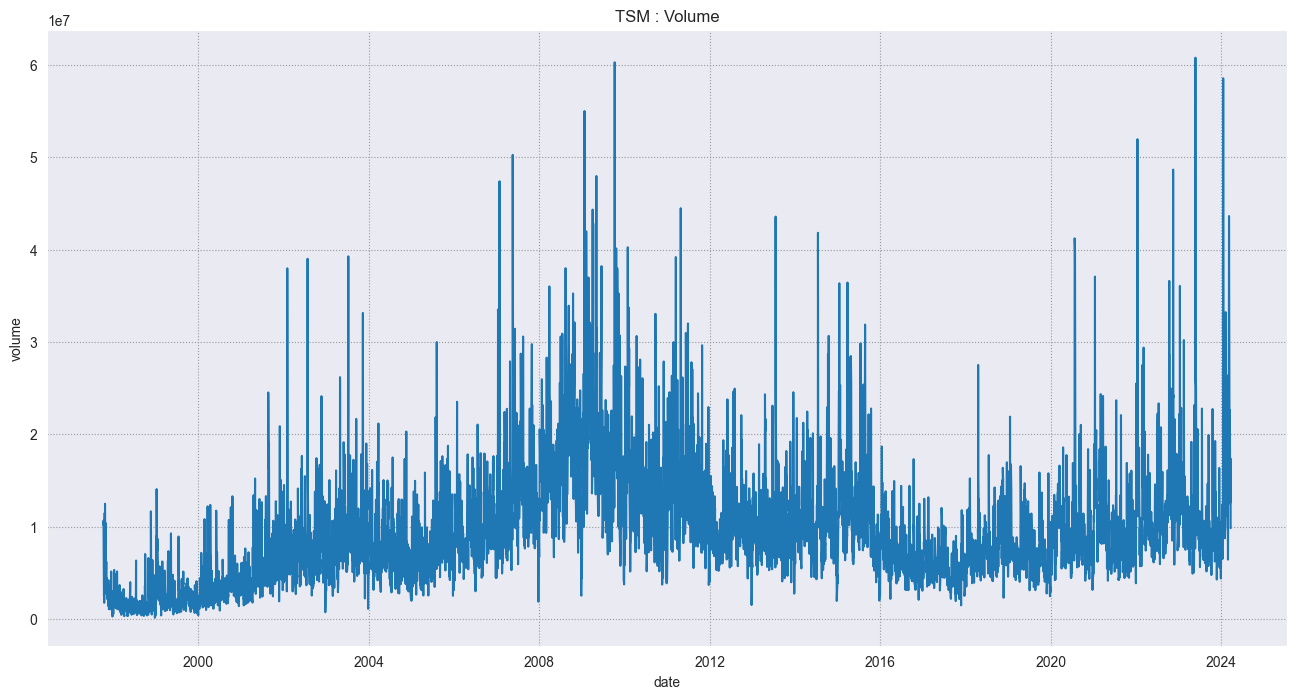

In [36]:
# graph the values for each of the stock tickers
for ticker in df['ticker'].unique():
    for col in df.drop(['date', 'ticker'], axis=1).columns:
        line_graph(df, ticker, col)

In [18]:
df[df['ticker'] == 'AMD'].drop(['date', 'ticker'], axis=1)

open      high       low     close    volume
0        8.9675    9.0300    8.8101    8.9975    510800
1        8.7176    8.9675    8.4977    8.4977    328000
2        8.4977    8.8101    8.4677    8.7176    427200
3        8.7176    8.7801    8.6551    8.7801    393200
4        8.9051    9.0600    8.7476    8.8726    210400
...         ...       ...       ...       ...       ...
10332  193.2850  193.5000  188.0500  190.6500  57291109
10333  183.1600  185.6127  177.3602  181.4200  83561864
10334  182.0300  182.6800  174.0000  179.7300  80932091
10335  185.9700  187.6900  177.6600  178.6800  74511412
10336  177.2100  180.7600  175.0500  179.6500  57466029

[10337 rows x 5 columns]

In [15]:
df[df['ticker'] == 'AMD'].drop(['date', 'ticker'], axis=1).diff()

open    high      low   close      volume
0          NaN     NaN      NaN     NaN         NaN
1      -0.2499 -0.0625  -0.3124 -0.4998   -182800.0
2      -0.2199 -0.1574  -0.0300  0.2199     99200.0
3       0.2199 -0.0300   0.1874  0.0625    -34000.0
4       0.1875  0.2799   0.0925  0.0925   -182800.0
...        ...     ...      ...     ...         ...
10332   8.4550 -0.2999   3.5700 -0.4100 -37165167.0
10333 -10.1250 -7.8873 -10.6898 -9.2300  26270755.0
10334  -1.1300 -2.9327  -3.3602 -1.6900  -2629773.0
10335   3.9400  5.0100   3.6600 -1.0500  -6420679.0
10336  -8.7600 -6.9300  -2.6100  0.9700 -17045383.0

[10337 rows x 5 columns]

In [25]:
# Run a loop to create a dataframe that contains the difference between the values

for i,ticker in enumerate(df['ticker'].unique()):
    if i == 0:
        df_diff = df[df['ticker'] == ticker].drop(['date', 'ticker'], axis=1).diff() / df[df['ticker'] == ticker].drop(['date', 'ticker'], axis=1).shift(periods=1)
        df_diff['ticker'] = ticker
        df_diff['date'] = df[df['ticker'] == ticker]['date']
    else:
        temp_diff = df[df['ticker'] == ticker].drop(['date', 'ticker'], axis=1).diff() / df[df['ticker'] == ticker].drop(['date', 'ticker'], axis=1).shift(periods=1)
        temp_diff['ticker'] = ticker
        temp_diff['date'] = df[df['ticker'] == ticker]['date']
        
        df_diff = pd.concat([df_diff, temp_diff], axis=0)

In [32]:
# Drop the rows with null values
df_diff.dropna(ignore_index=True, inplace=True)

In [33]:
df_diff

open      high       low     close    volume ticker       date
0     -0.027867 -0.006921 -0.035459 -0.055549 -0.357870    AMD 1983-03-22
1     -0.025225 -0.017552 -0.003530  0.025878  0.302439    AMD 1983-03-23
2      0.025878 -0.003405  0.022131  0.007169 -0.079588    AMD 1983-03-24
3      0.021508  0.031879  0.010687  0.010535 -0.464903    AMD 1983-03-25
4     -0.007018 -0.003311 -0.010574 -0.021132  1.351711    AMD 1983-03-28
...         ...       ...       ...       ...       ...    ...        ...
62307  0.039190  0.032051  0.018818  0.001559 -0.411747    TSM 2024-03-18
62308 -0.034812 -0.037211 -0.026206 -0.012954  0.290999    TSM 2024-03-19
62309  0.009091  0.007609  0.014884  0.013939 -0.266135    TSM 2024-03-20
62310  0.044093  0.038526  0.029850  0.019744  0.376242    TSM 2024-03-21
62311 -0.022098 -0.008836  0.000503  0.007816 -0.433215    TSM 2024-03-22

[62312 rows x 7 columns]

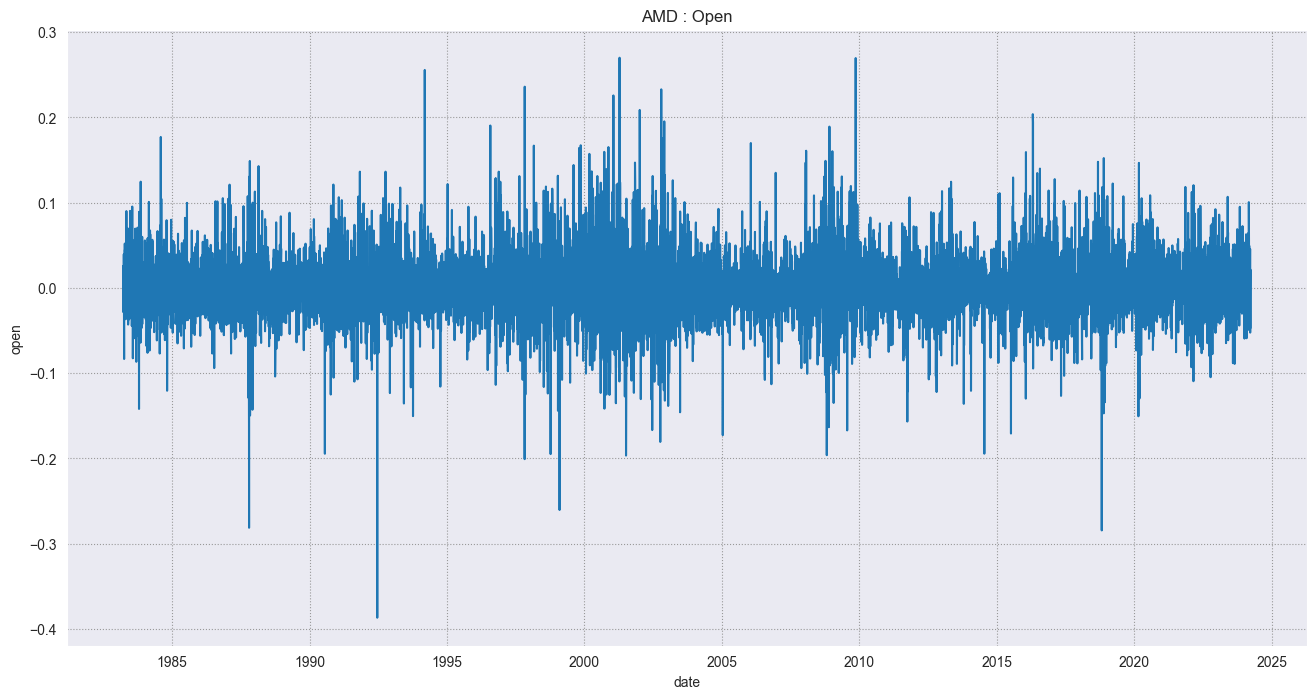

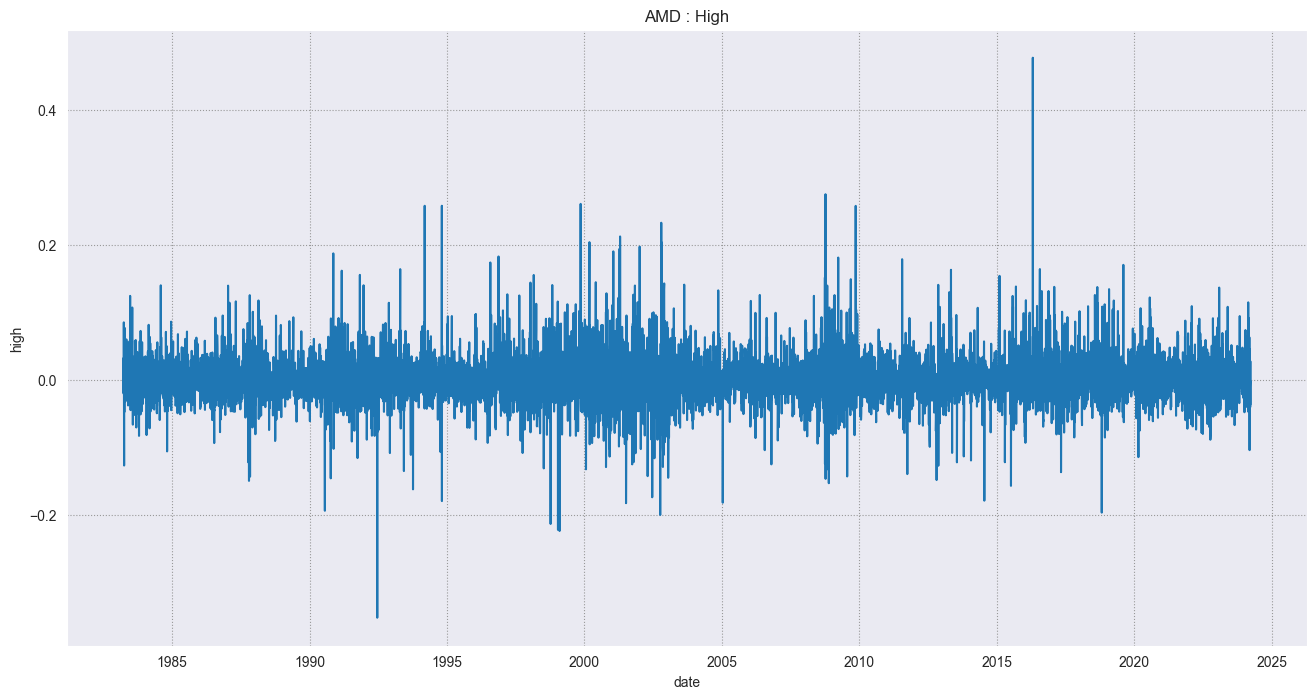

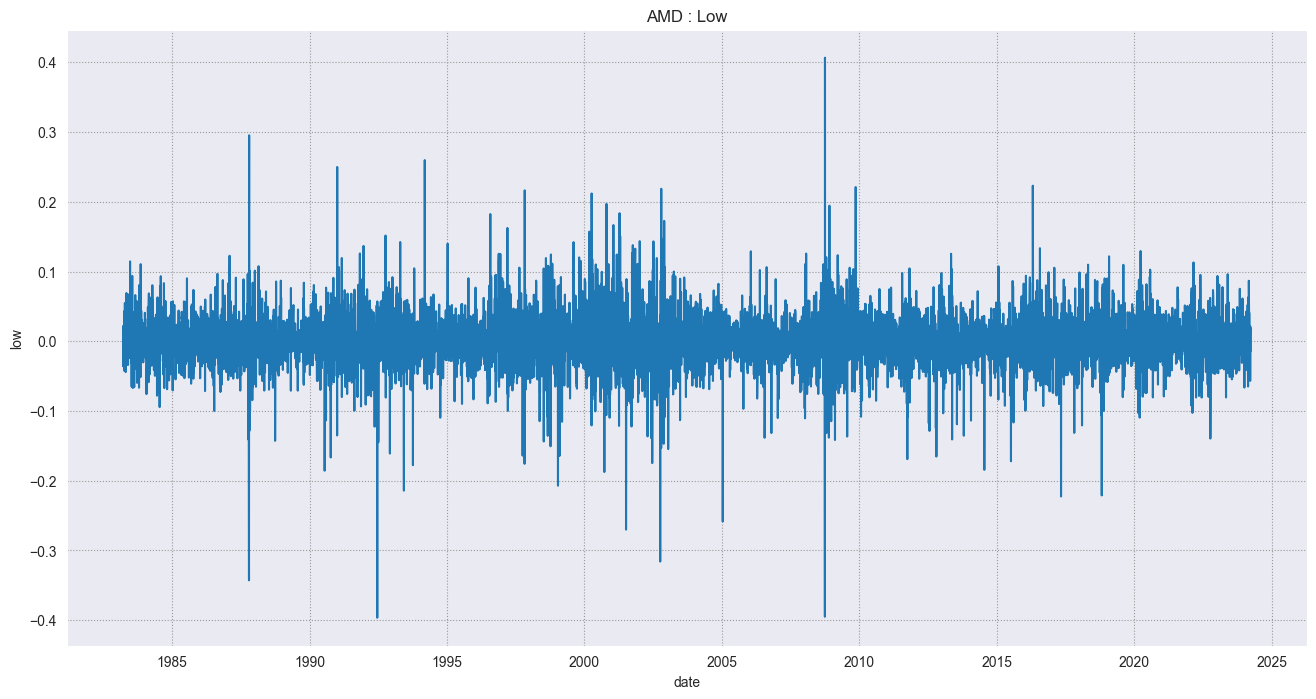

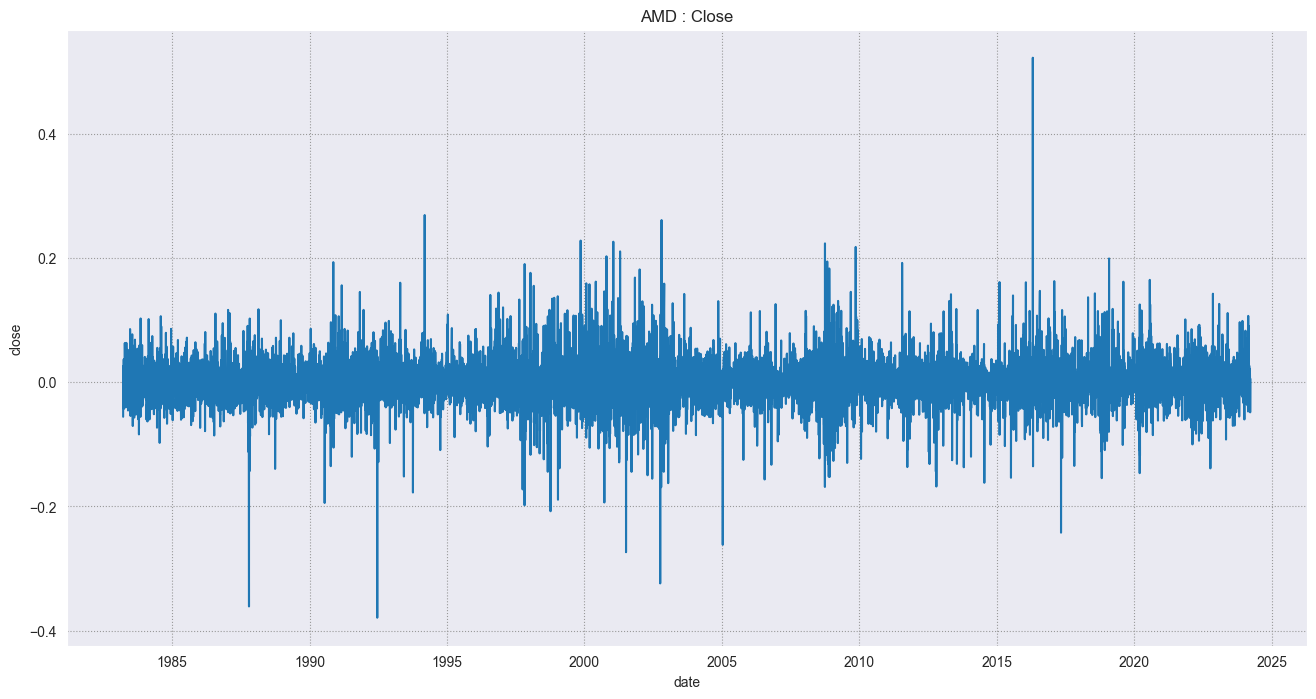

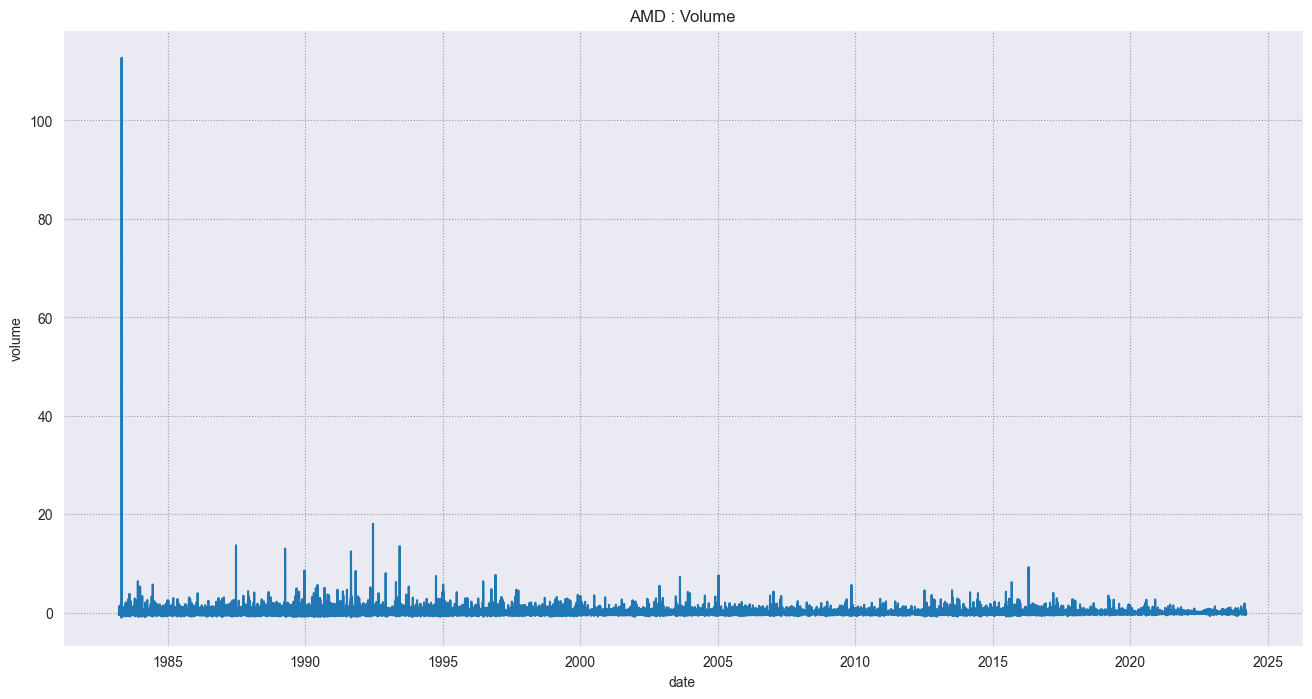

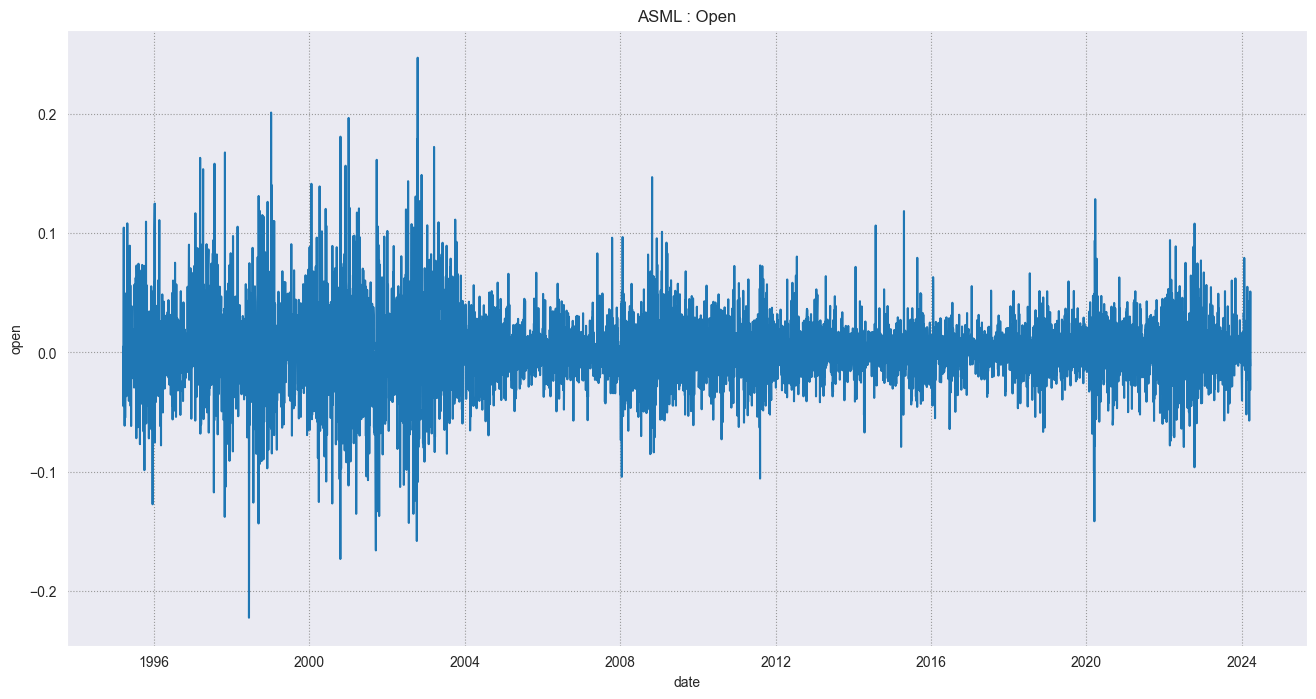

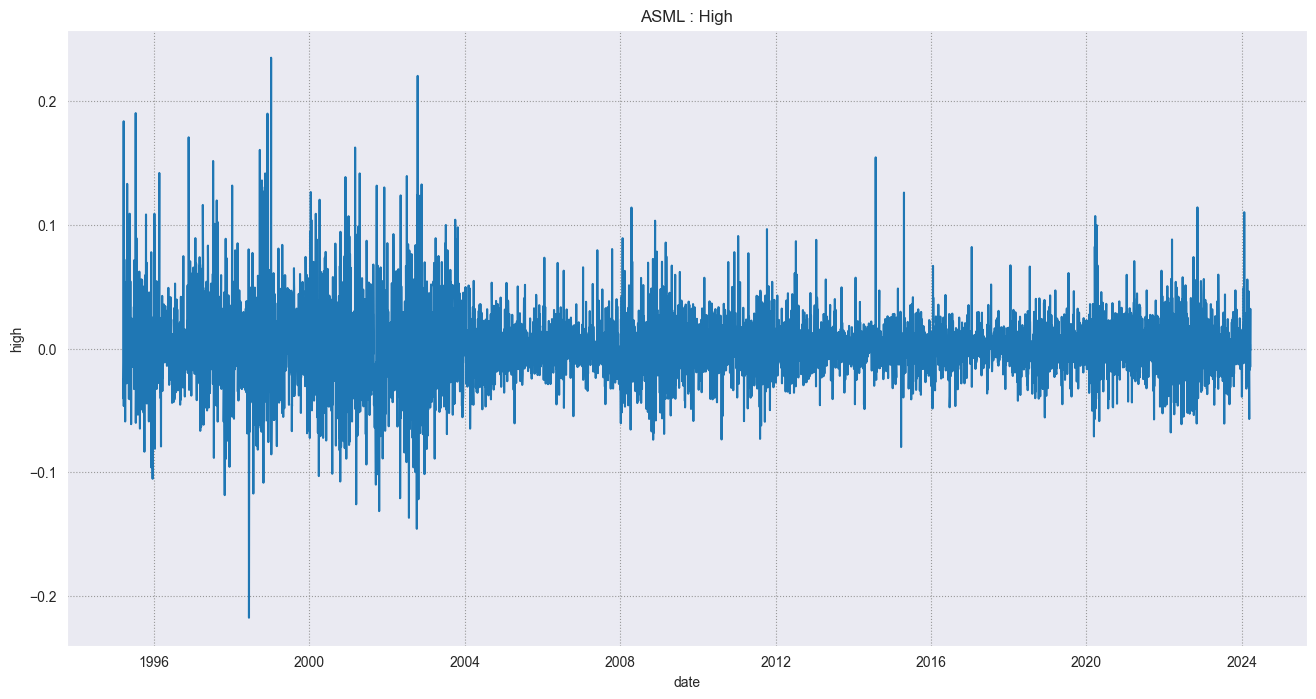

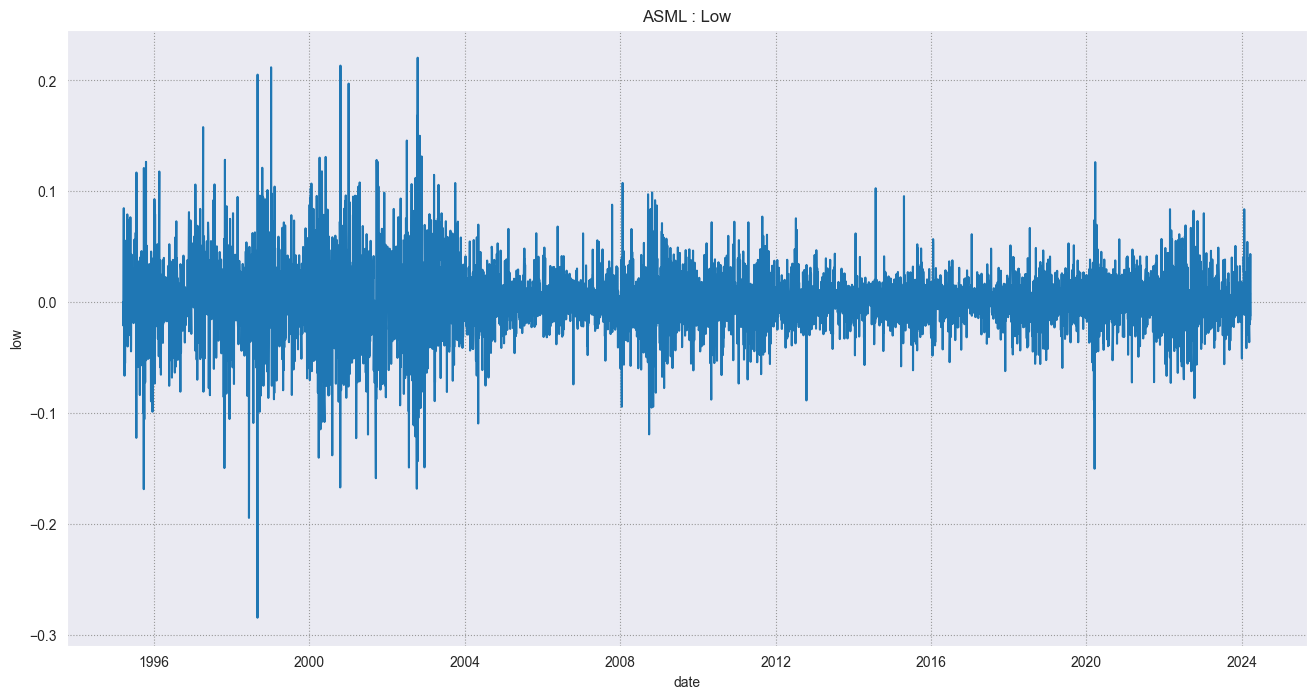

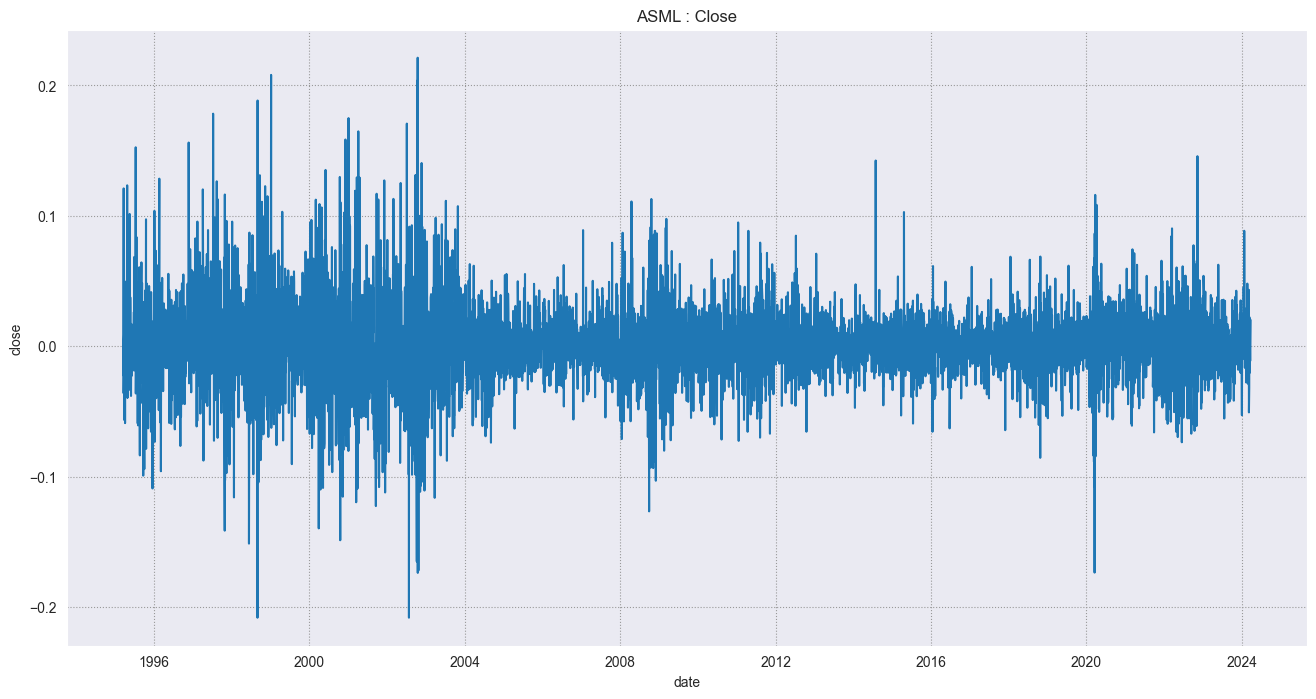

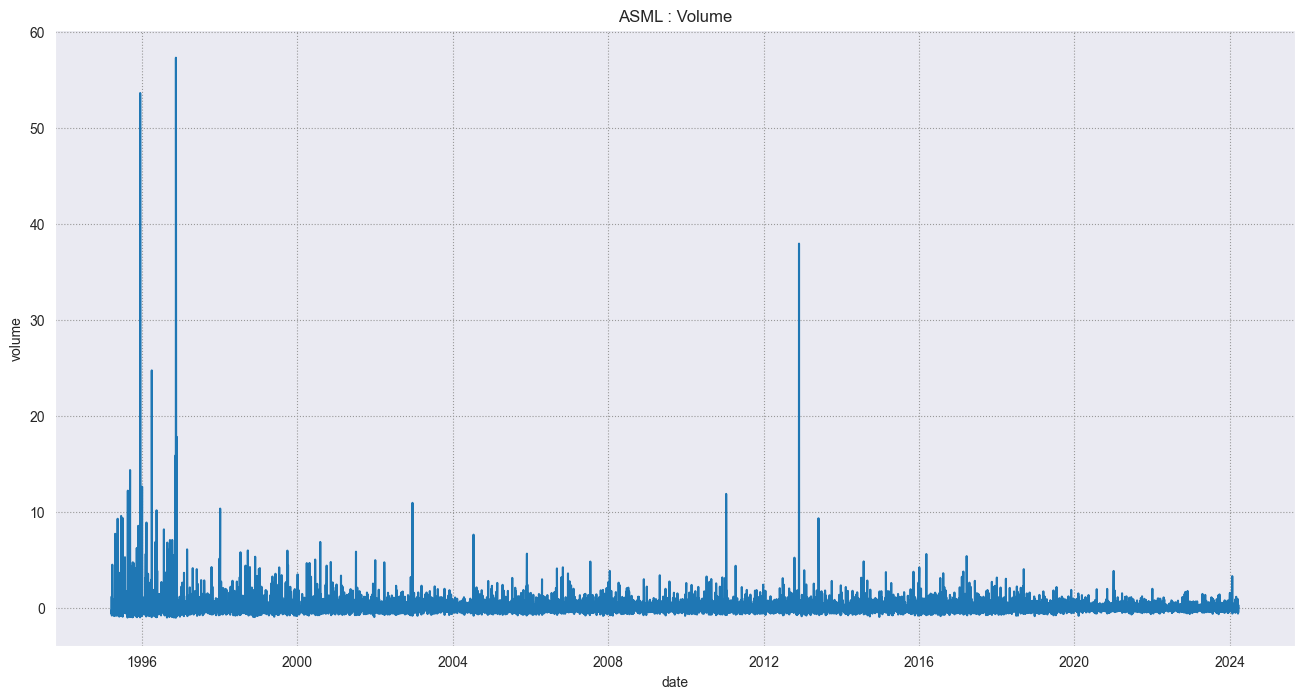

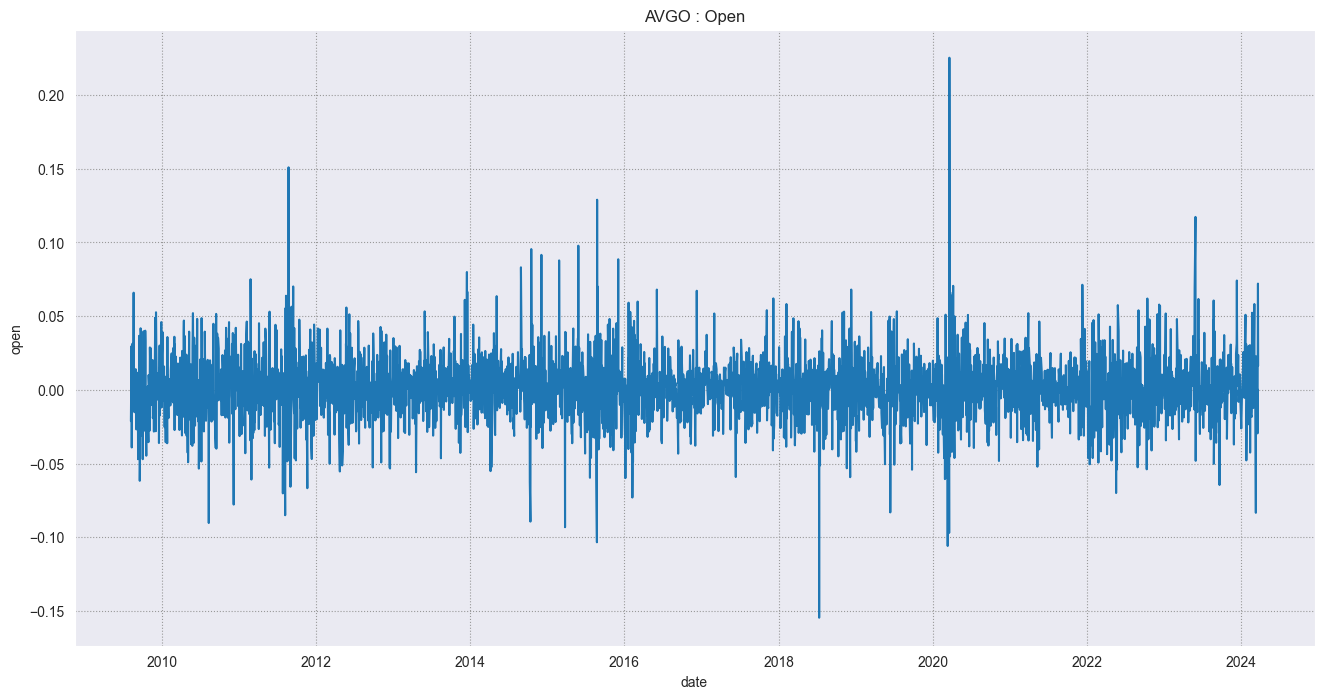

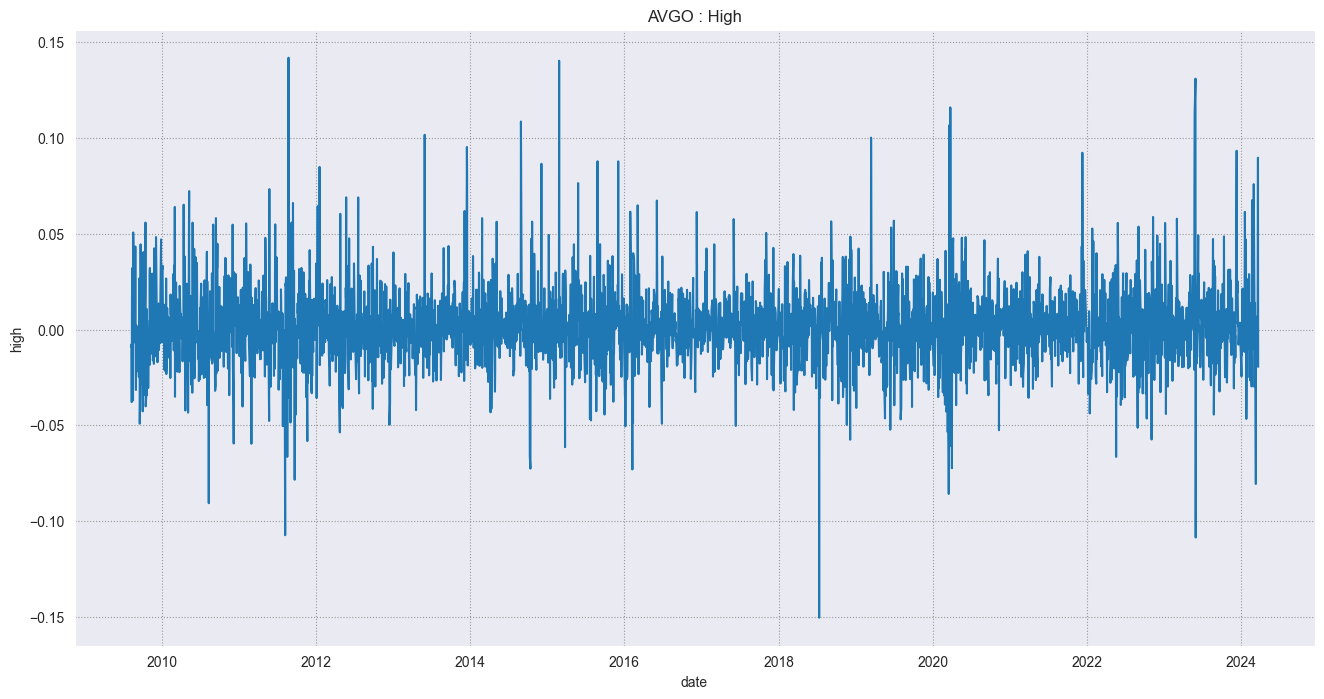

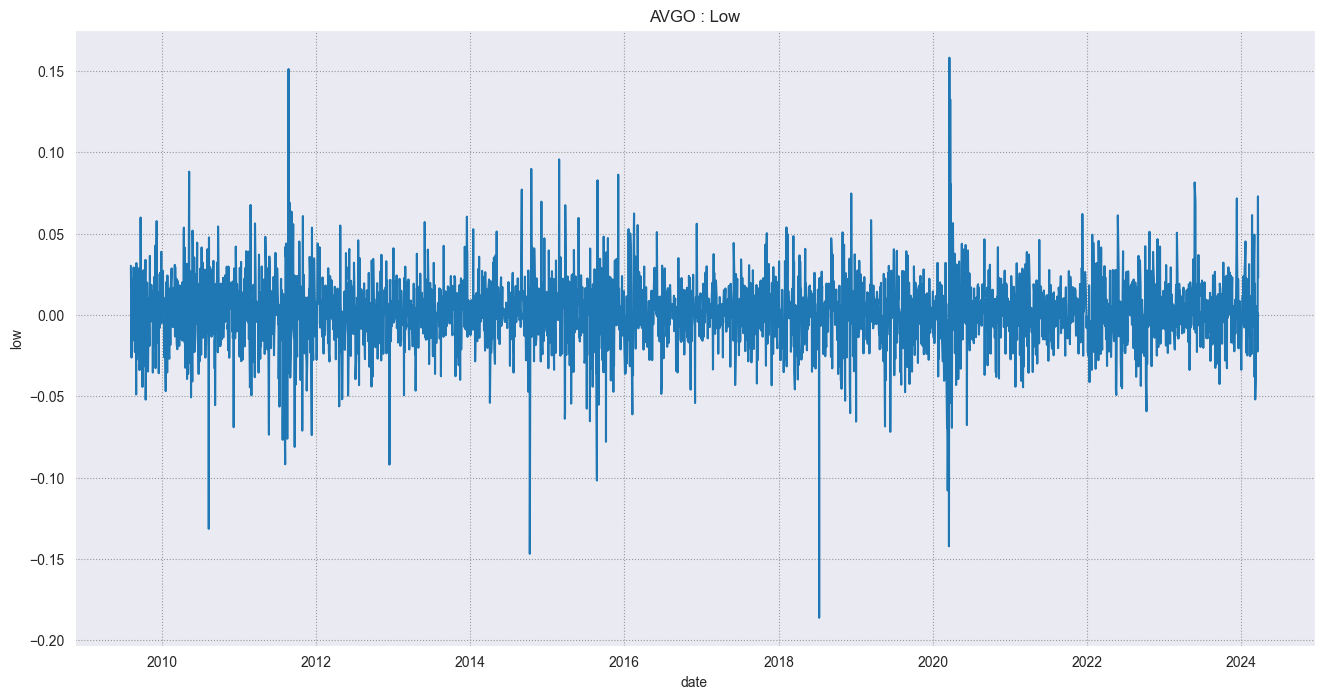

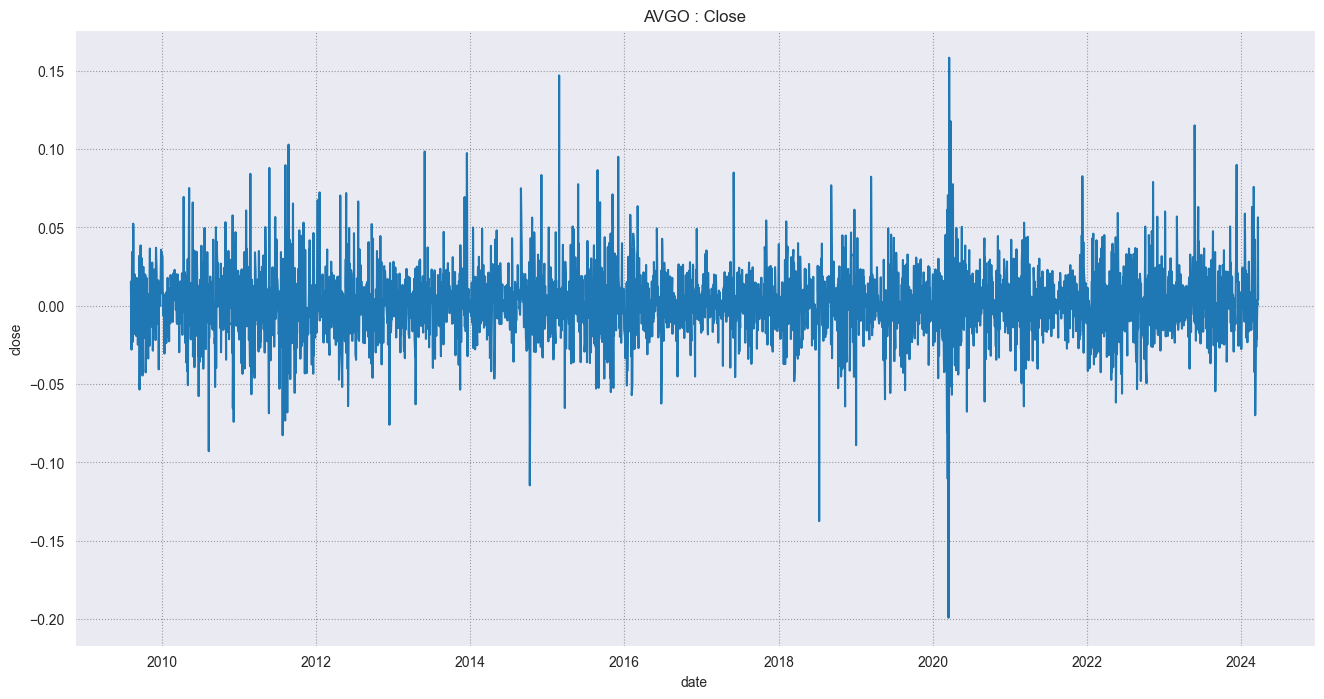

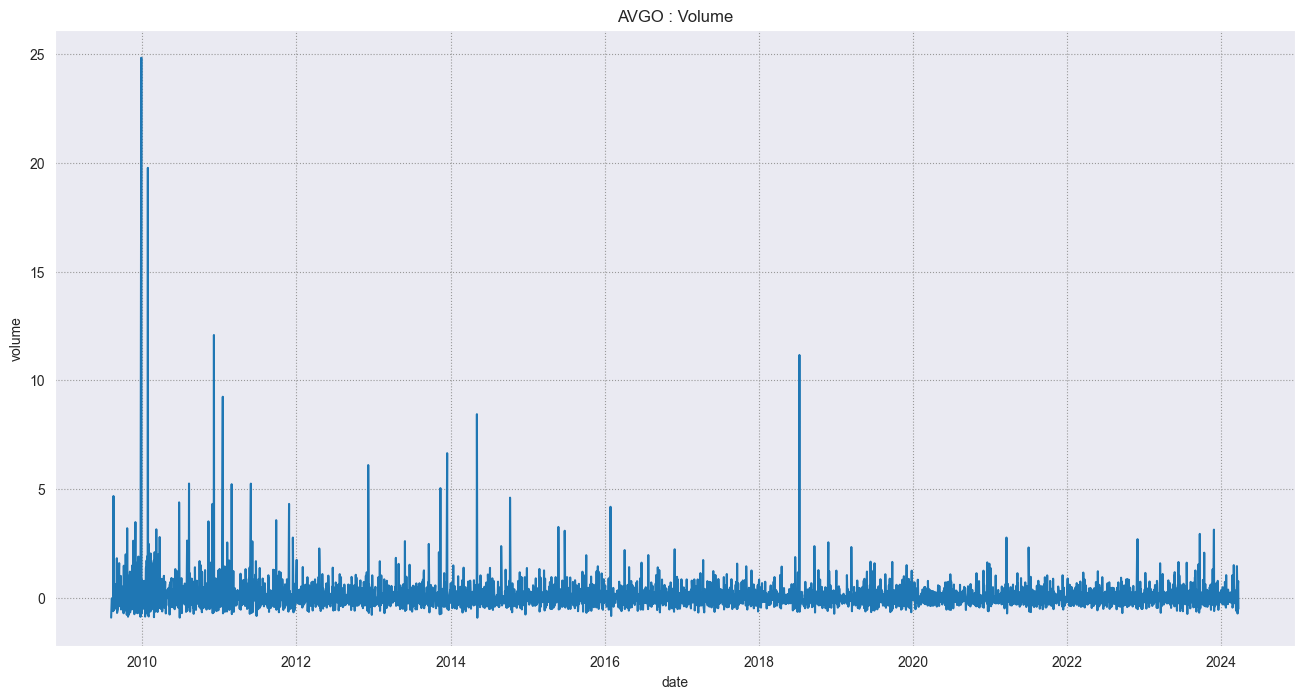

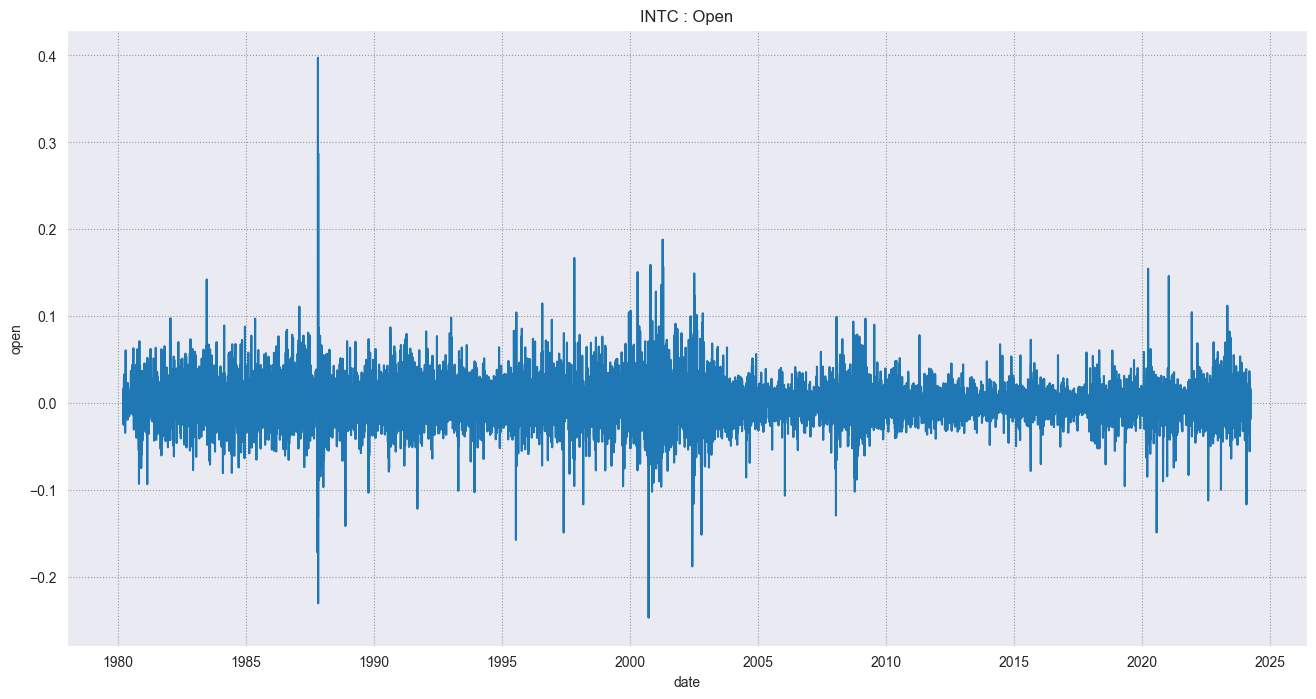

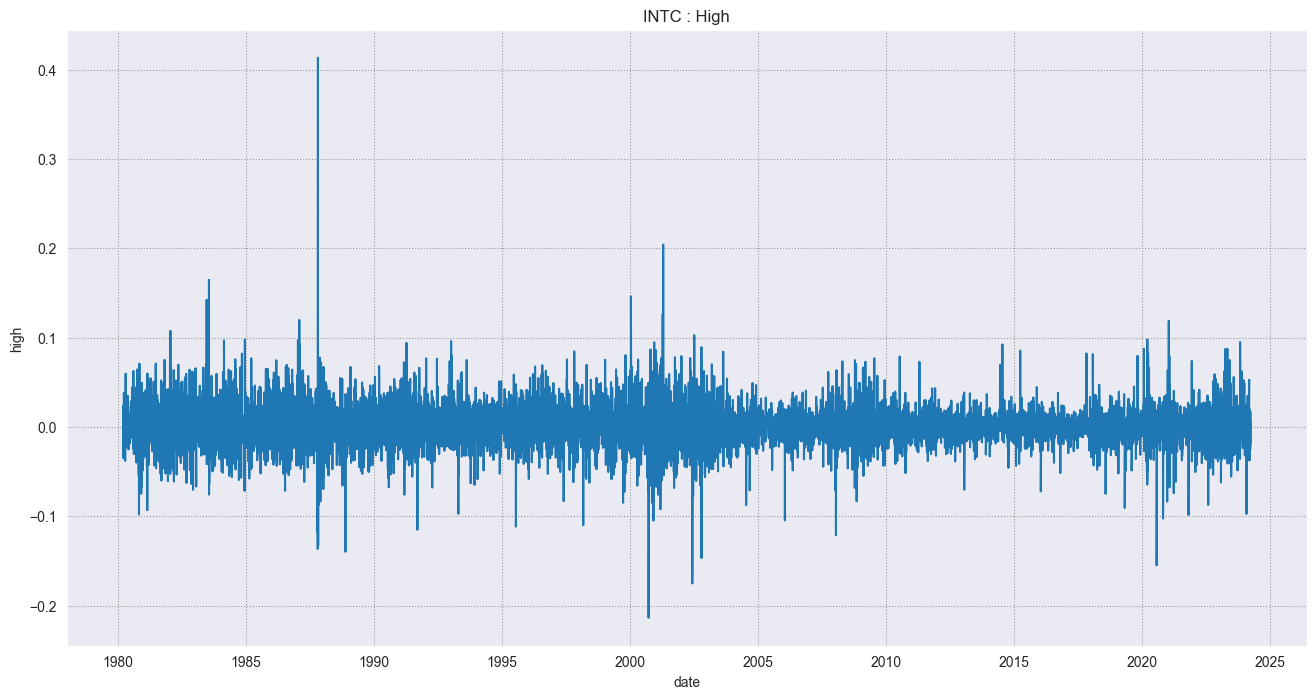

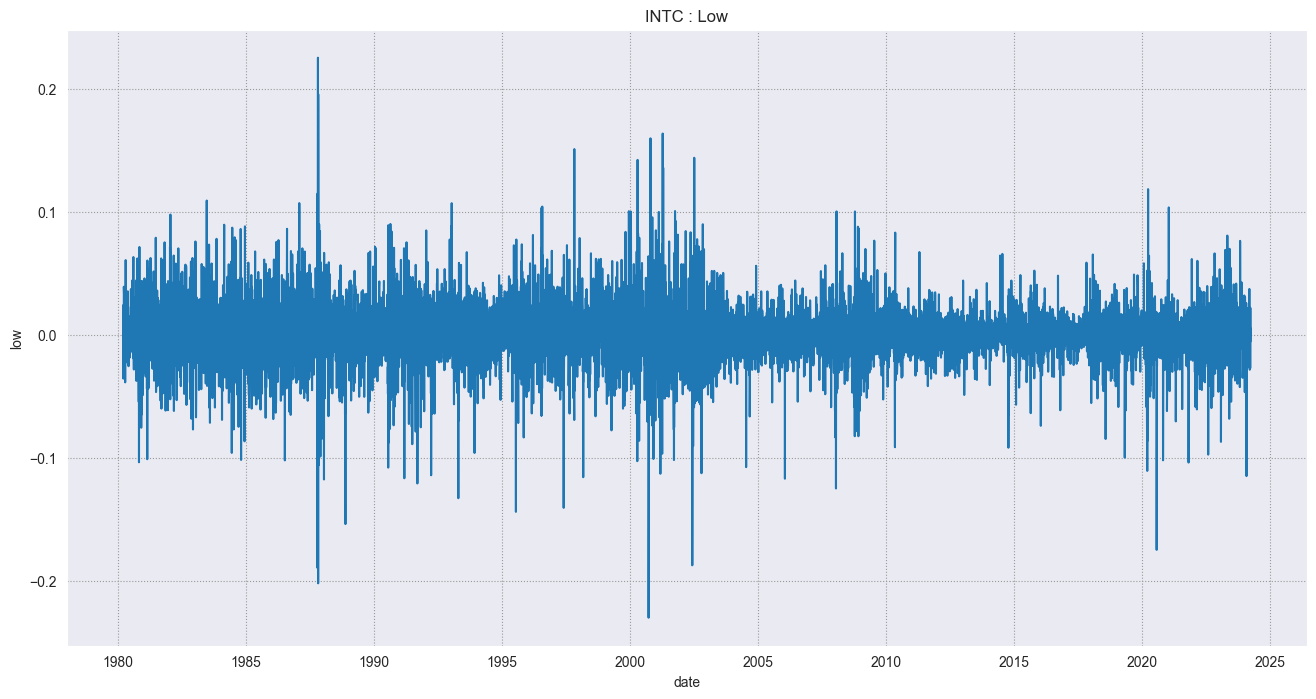

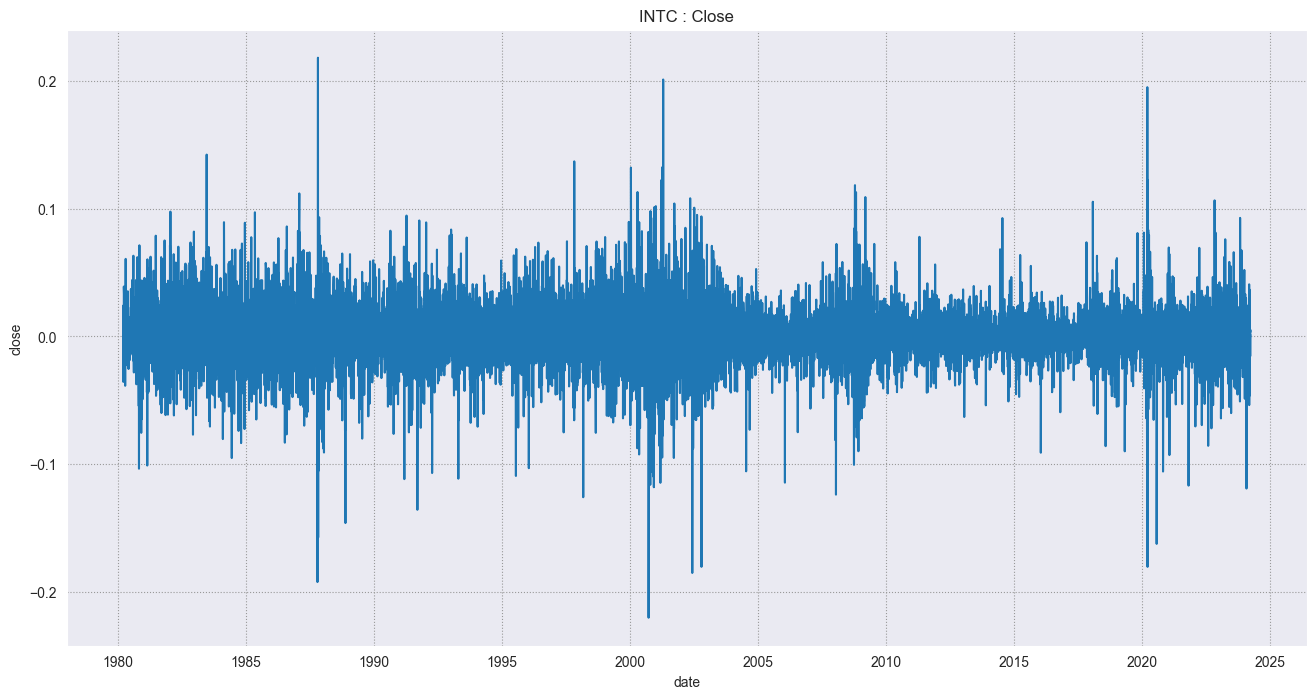

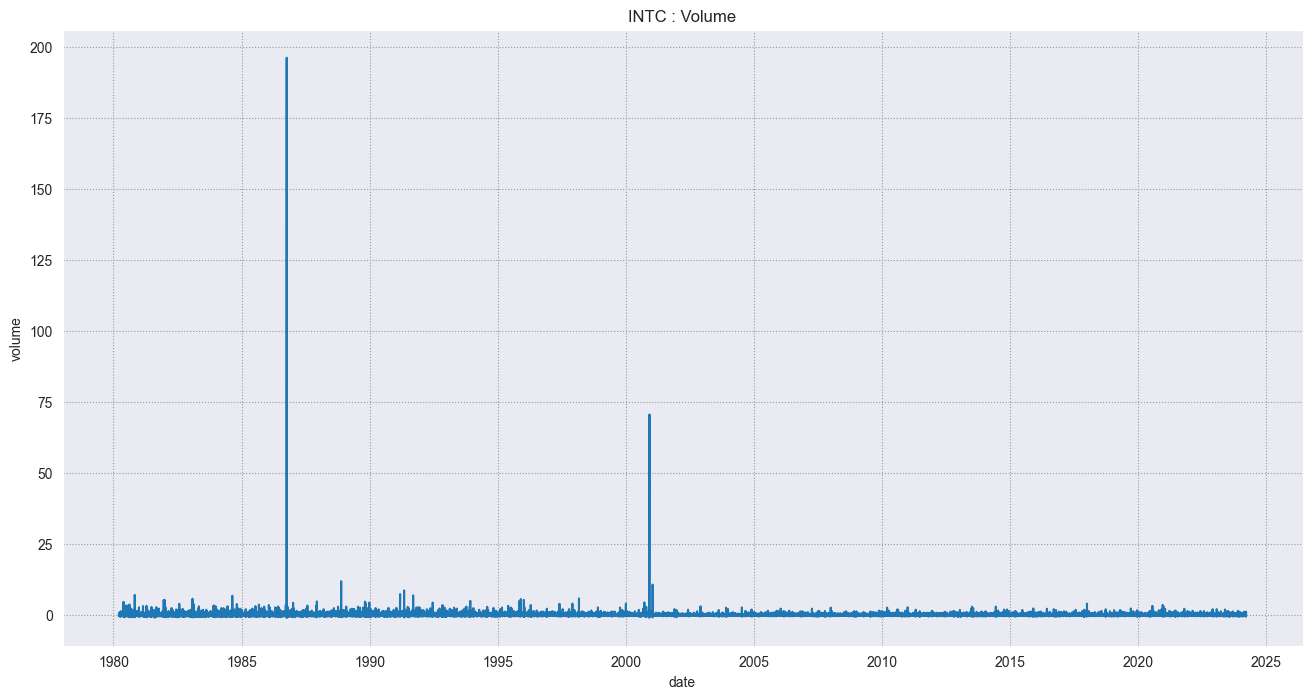

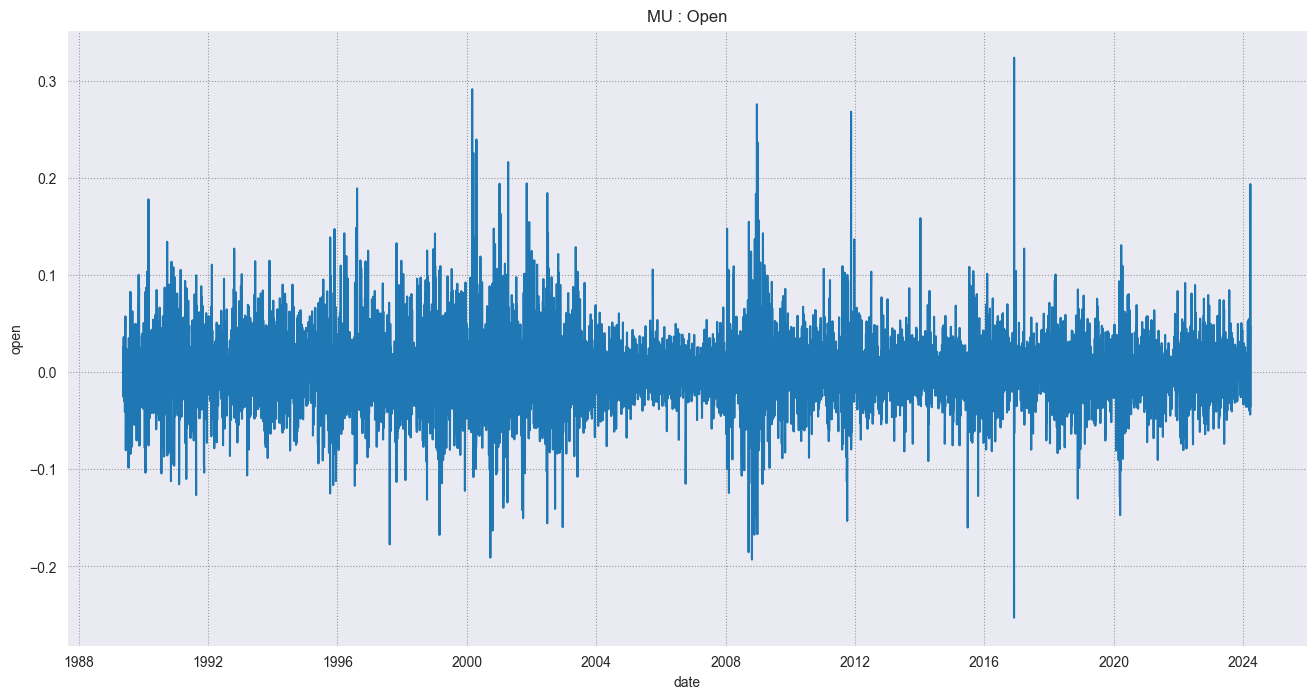

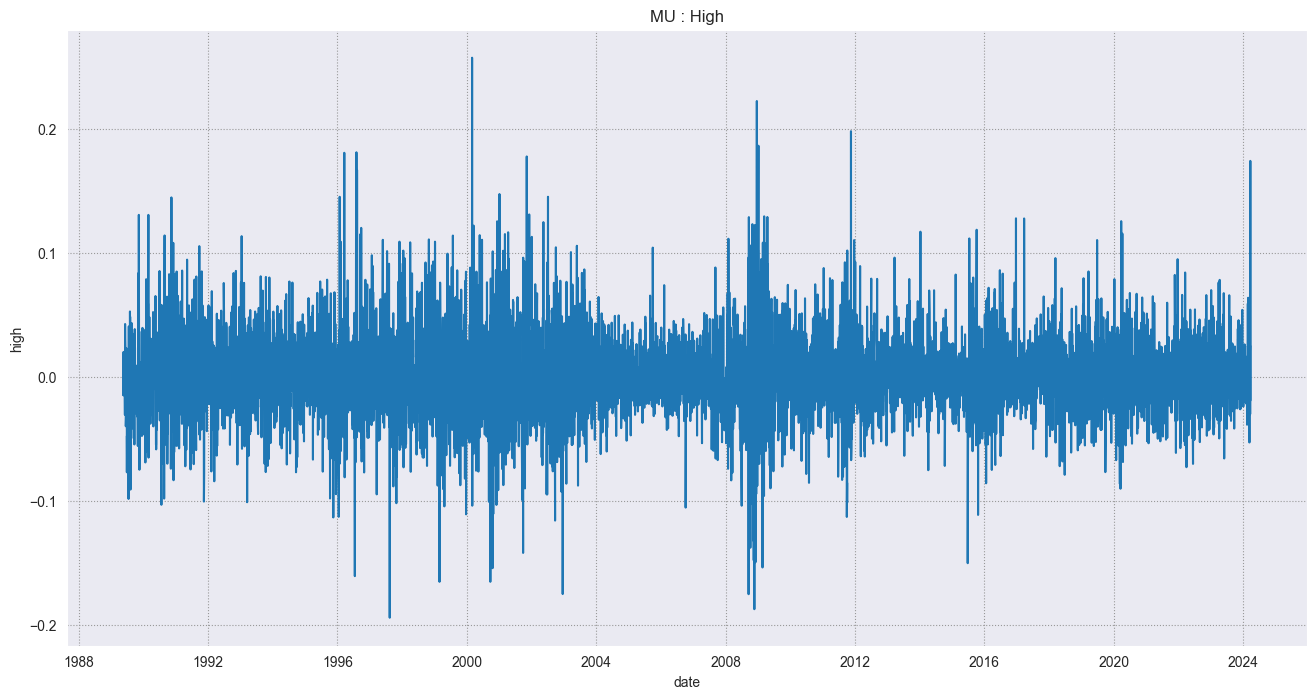

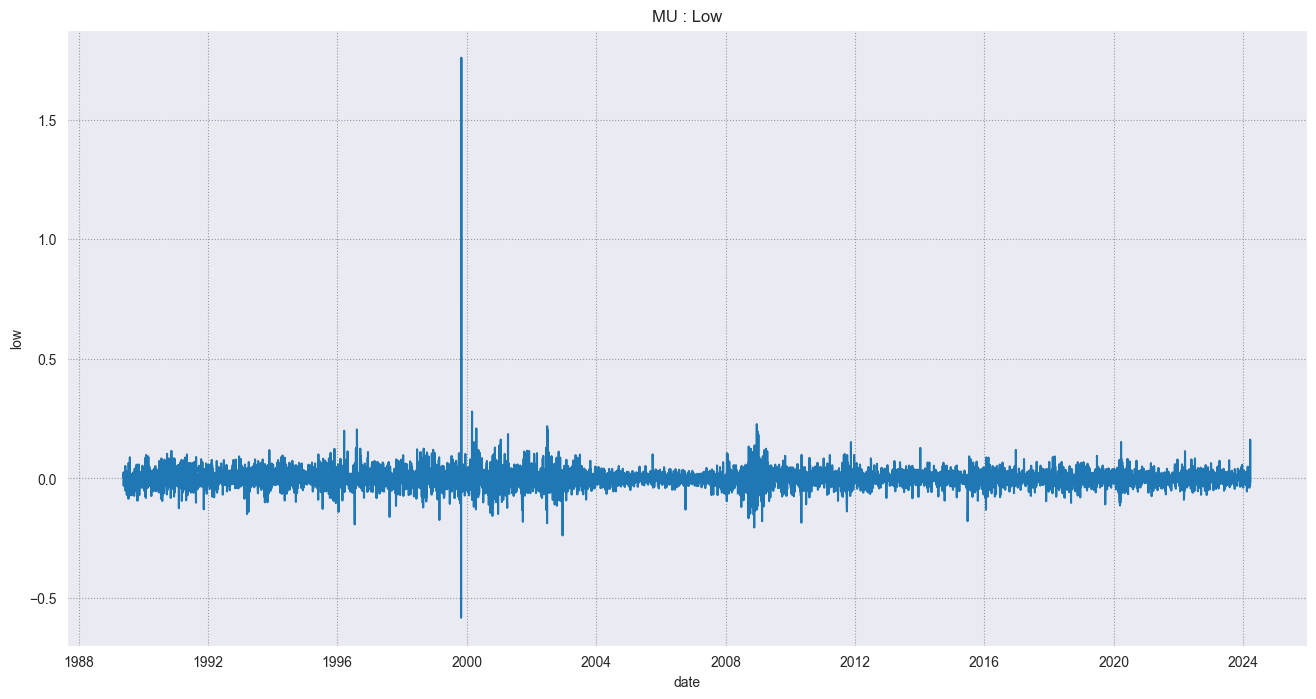

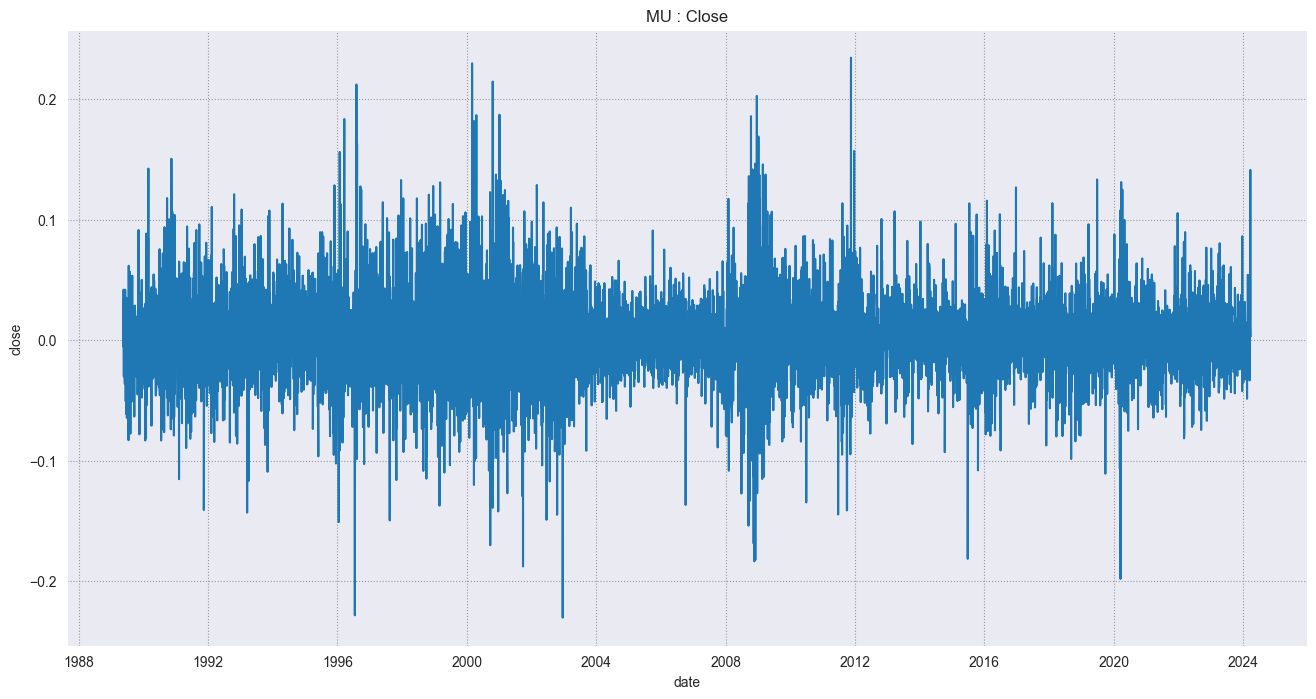

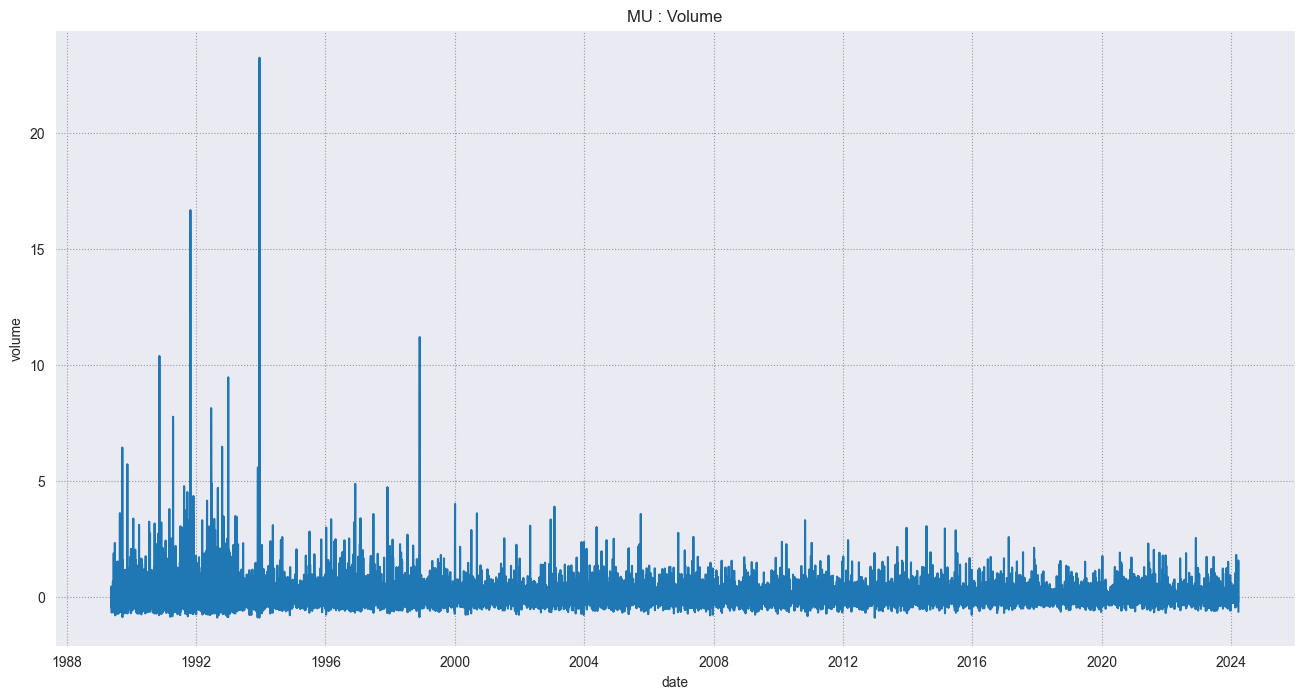

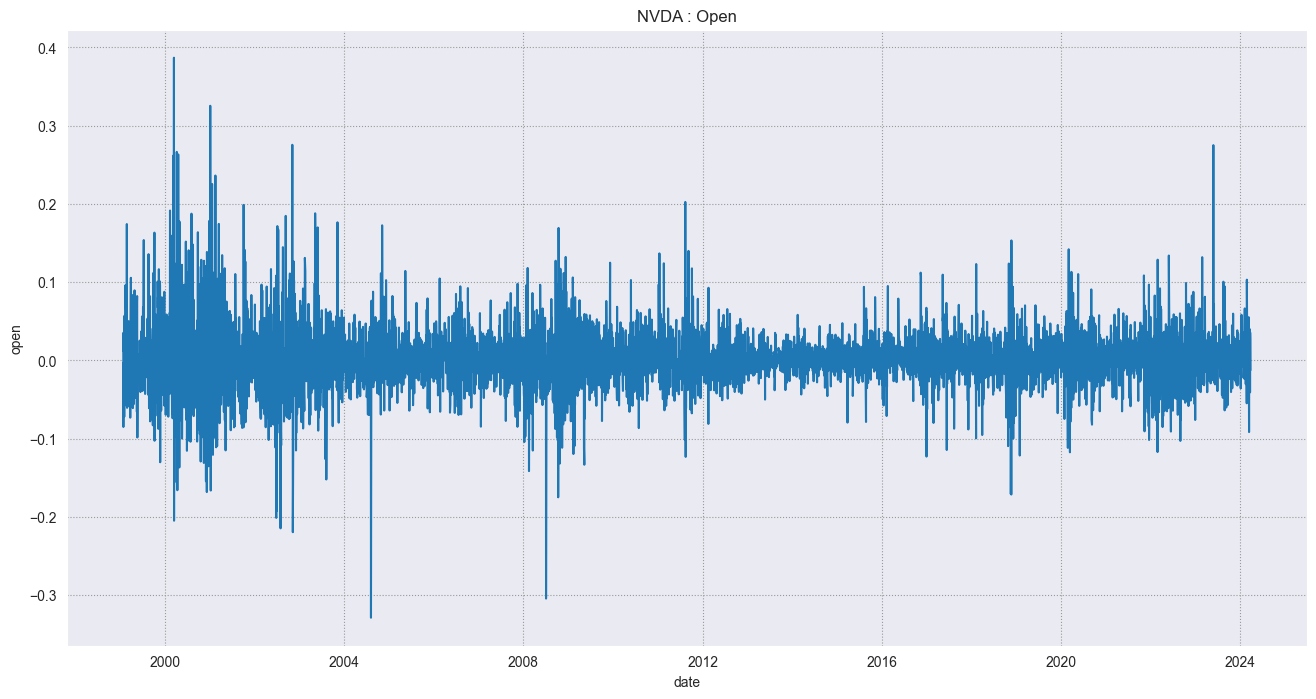

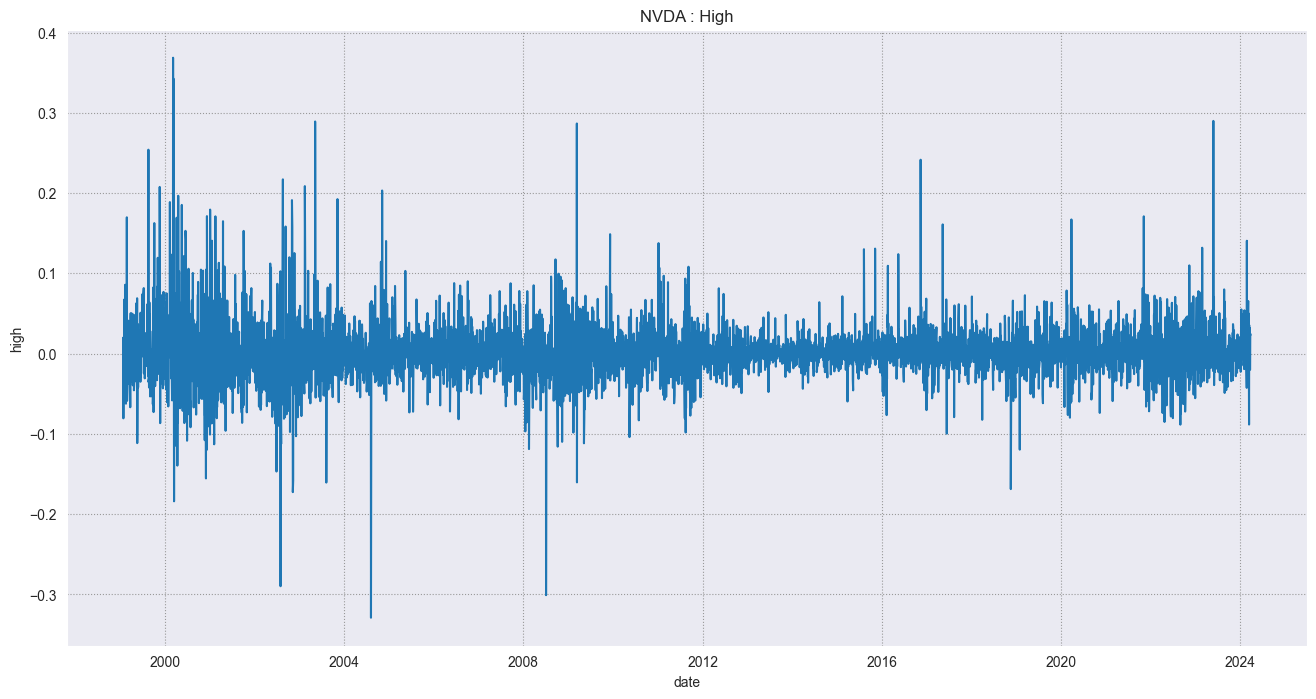

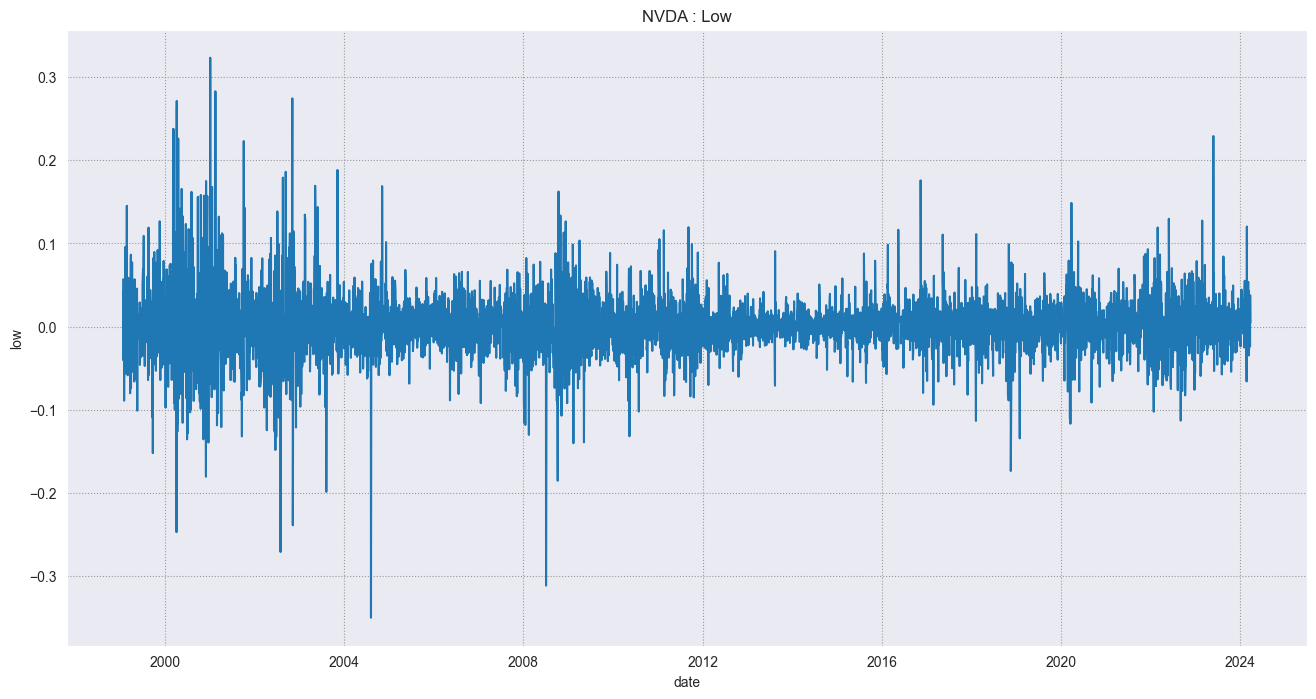

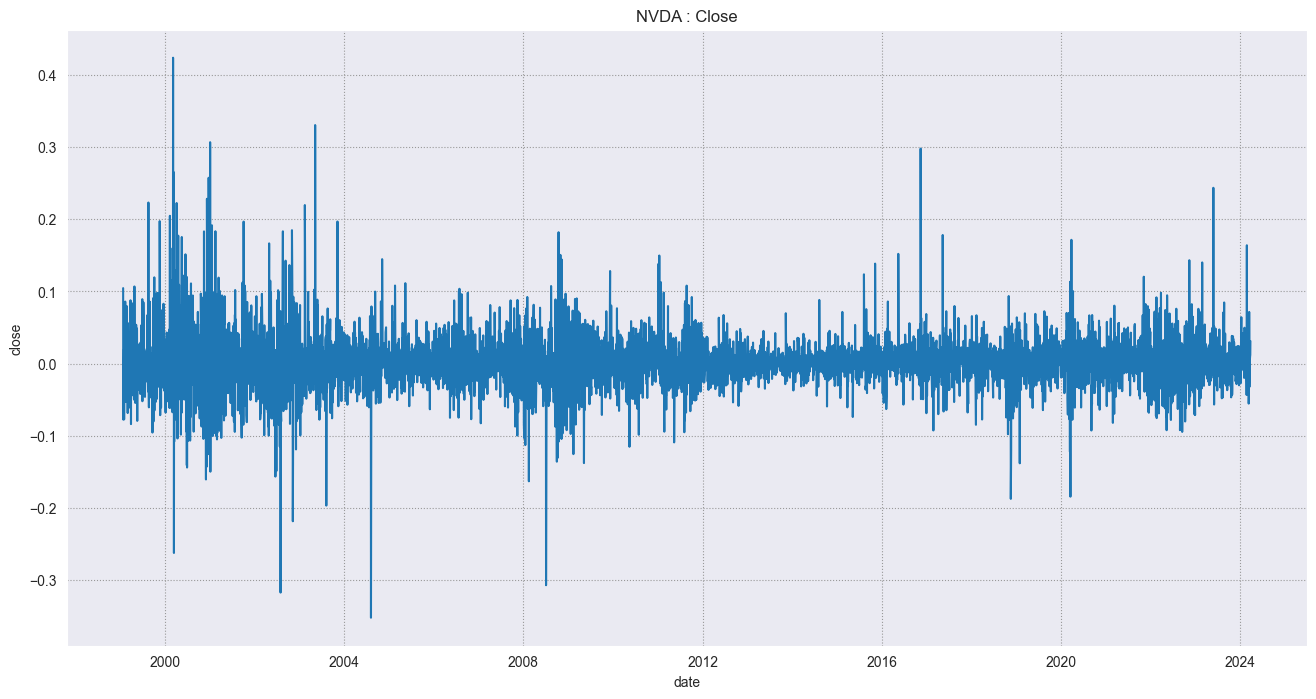

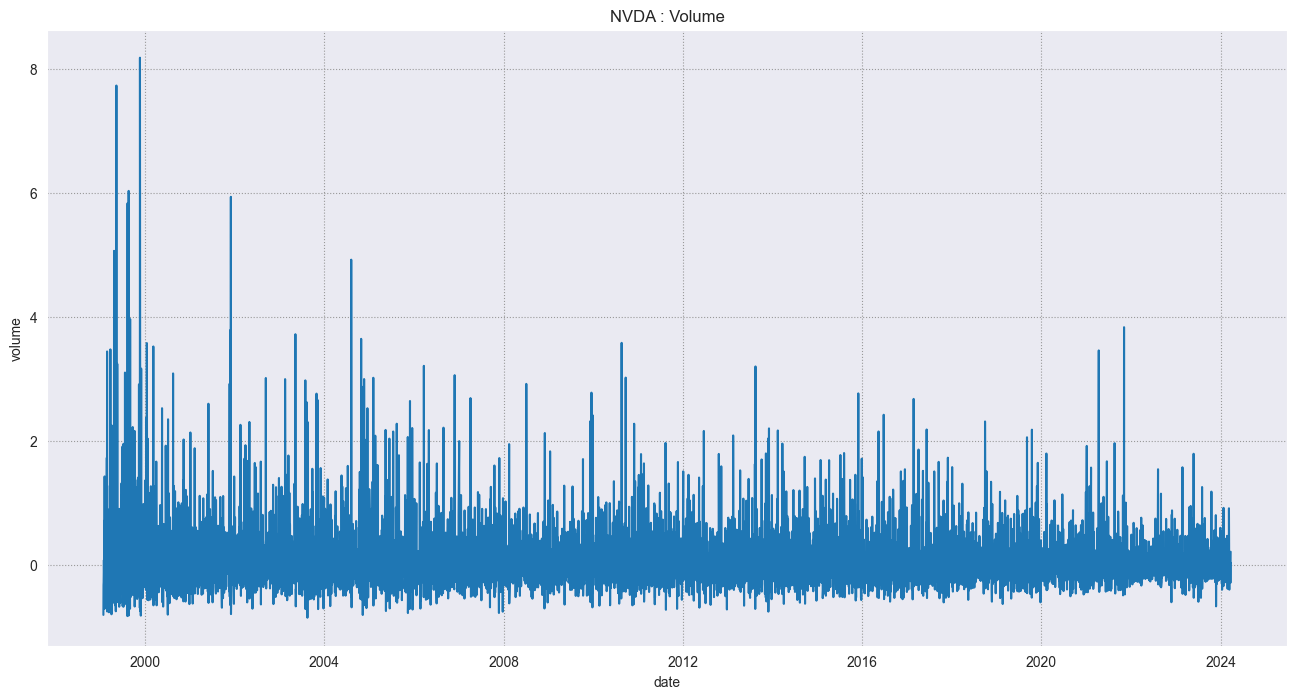

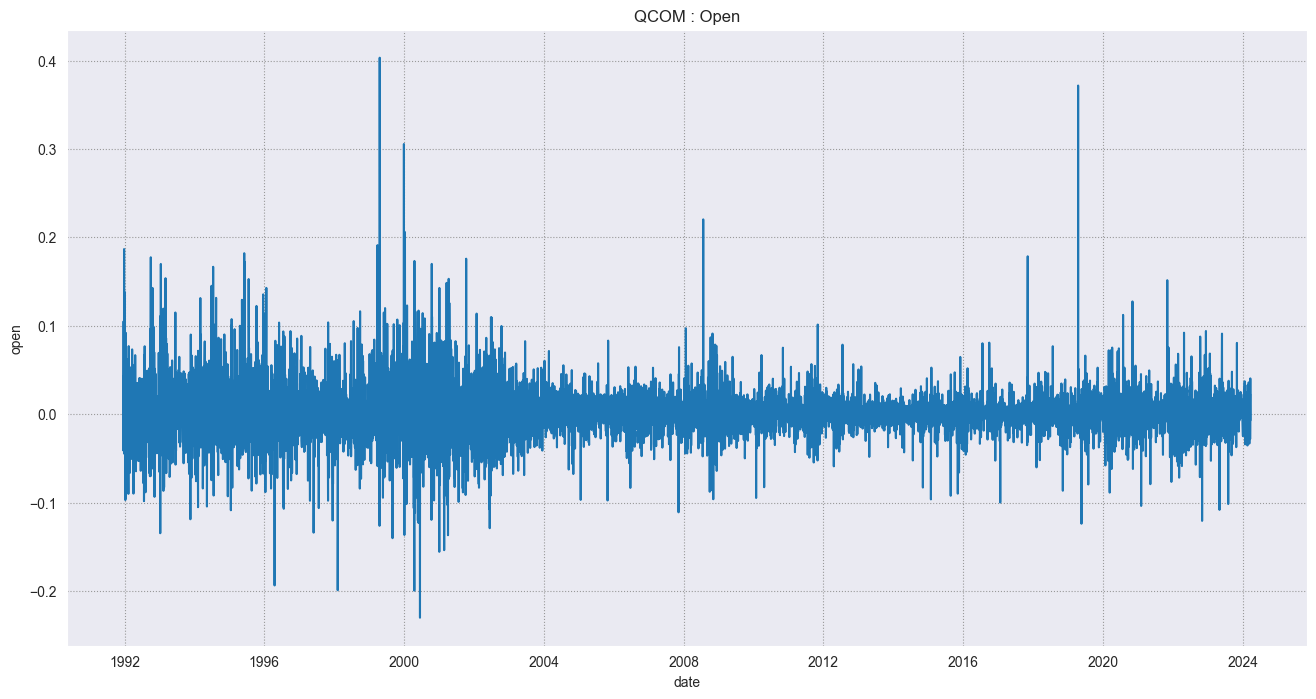

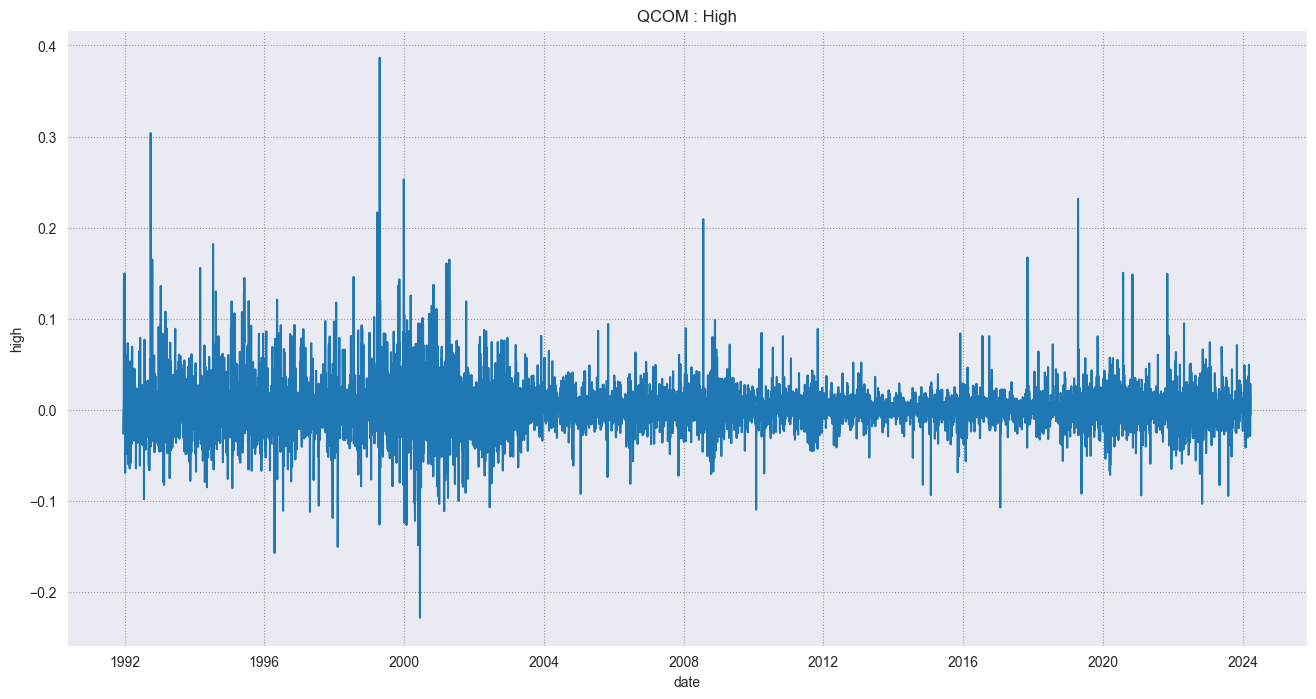

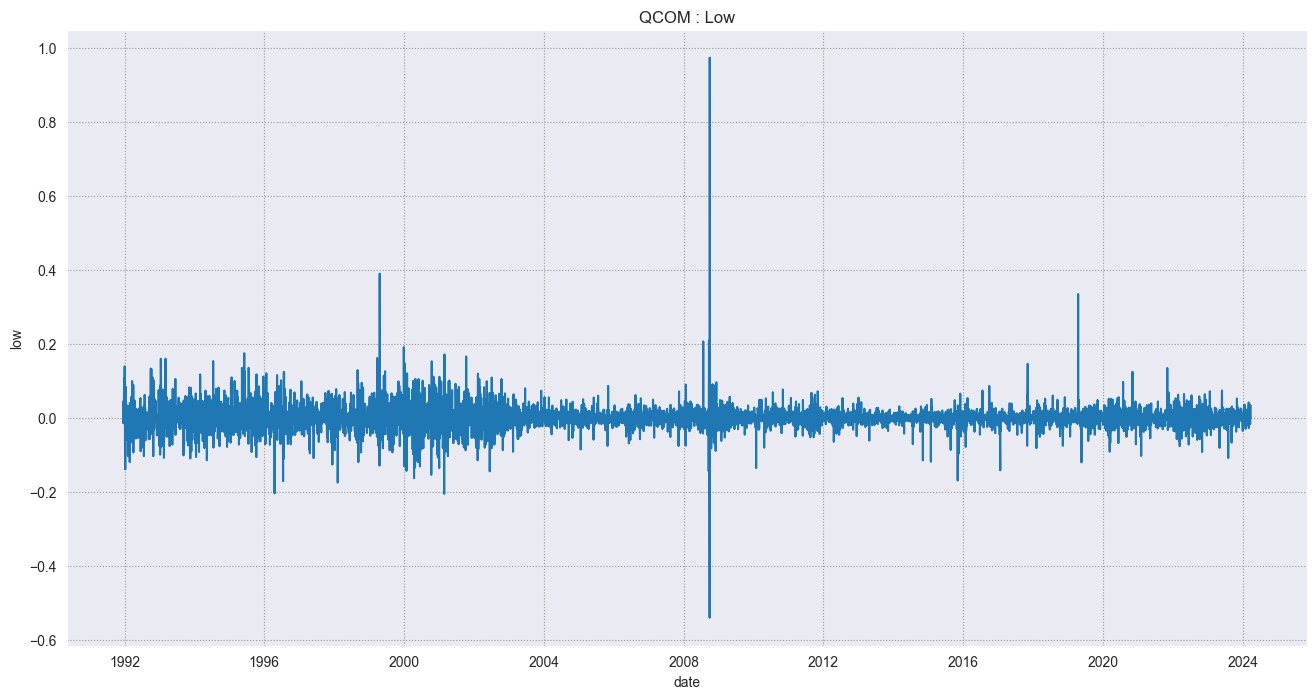

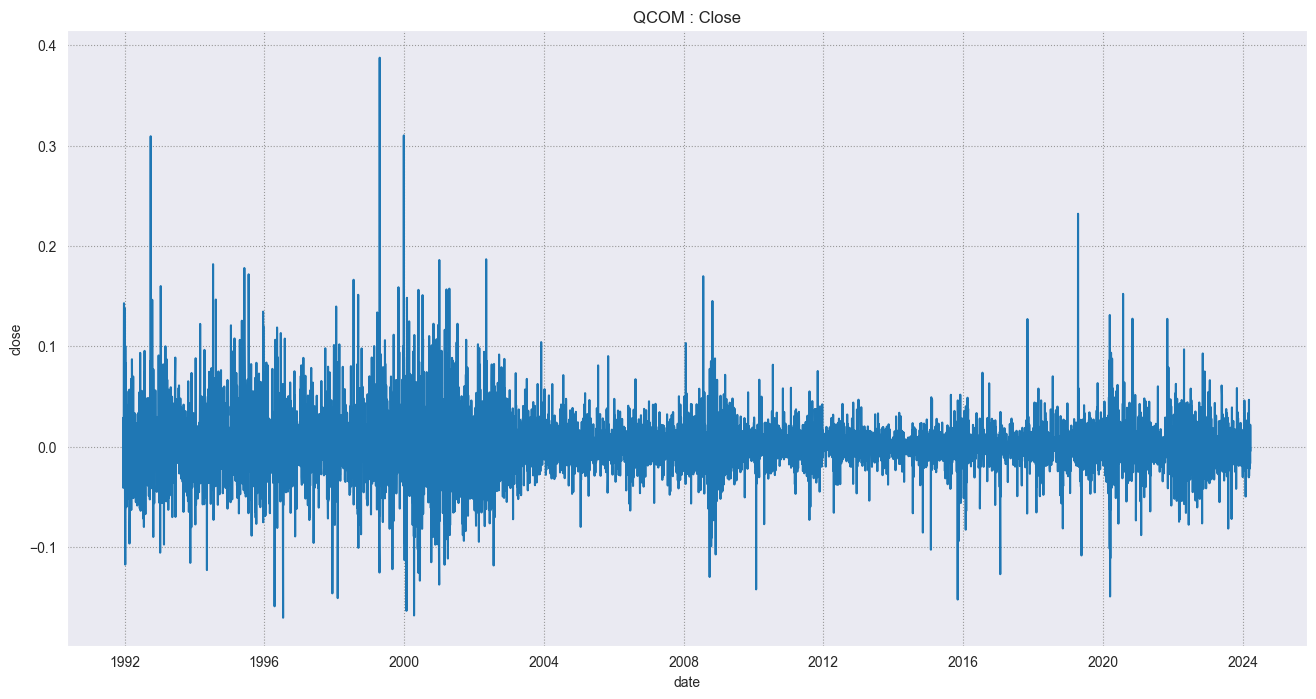

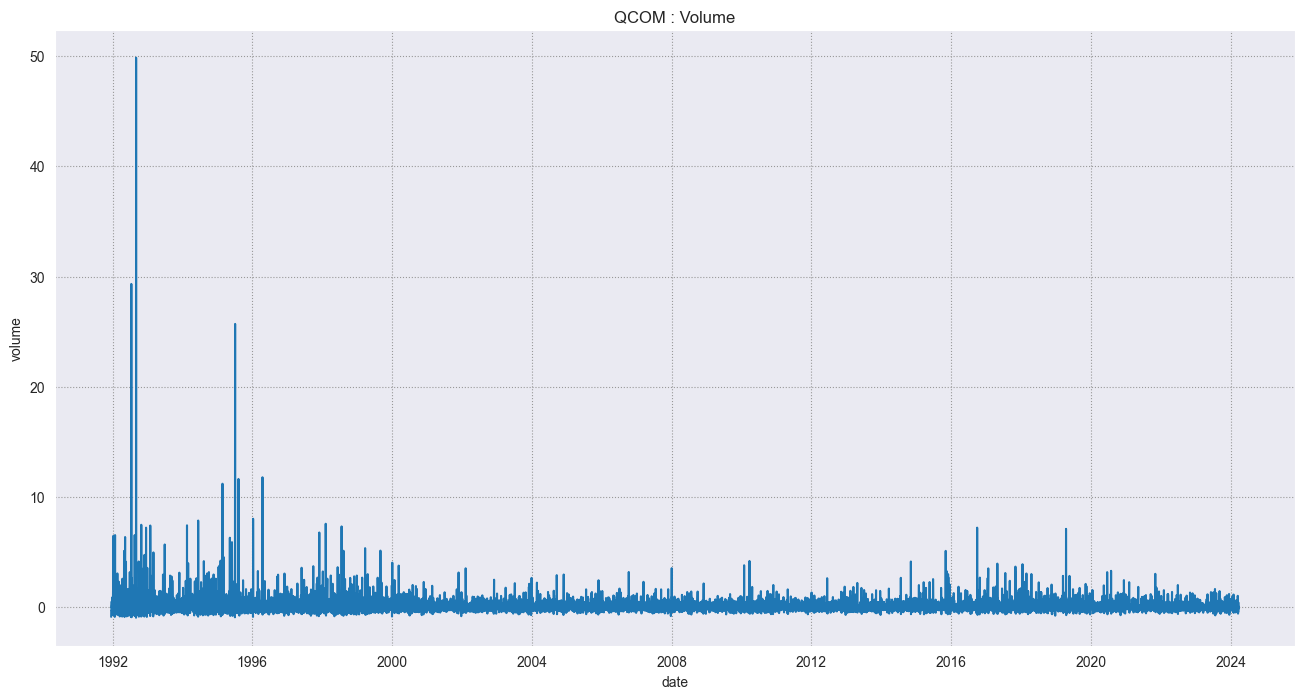

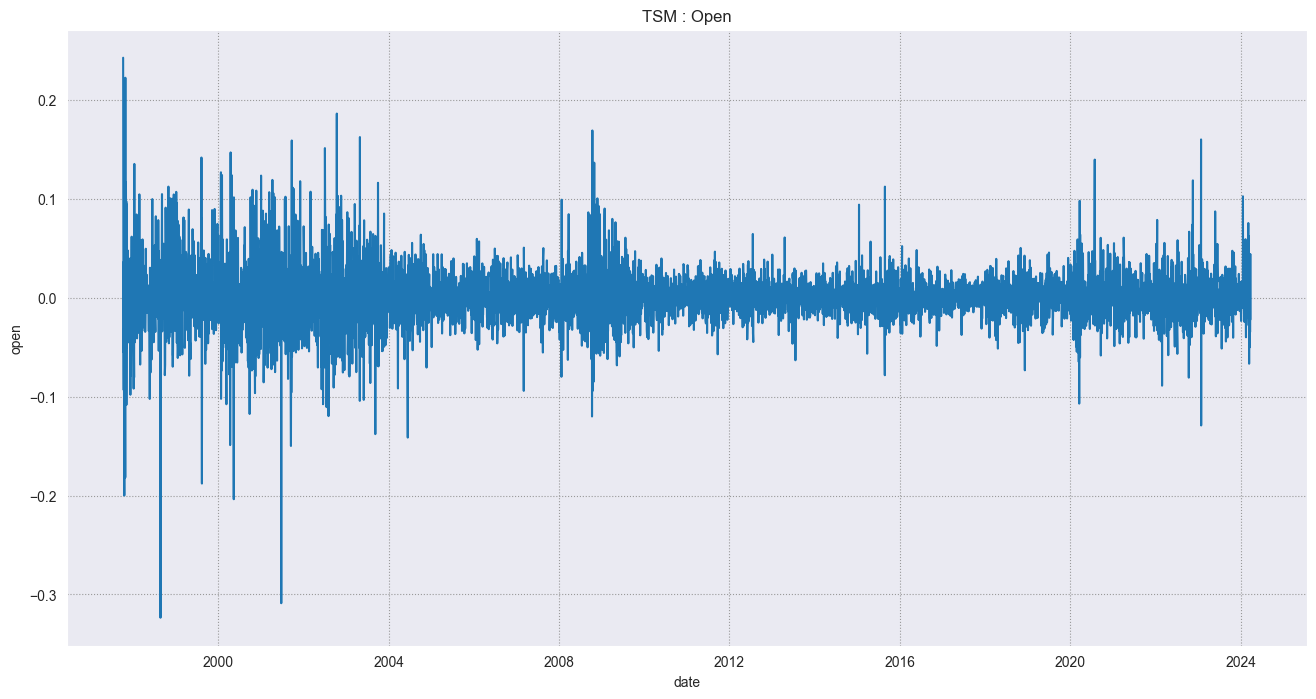

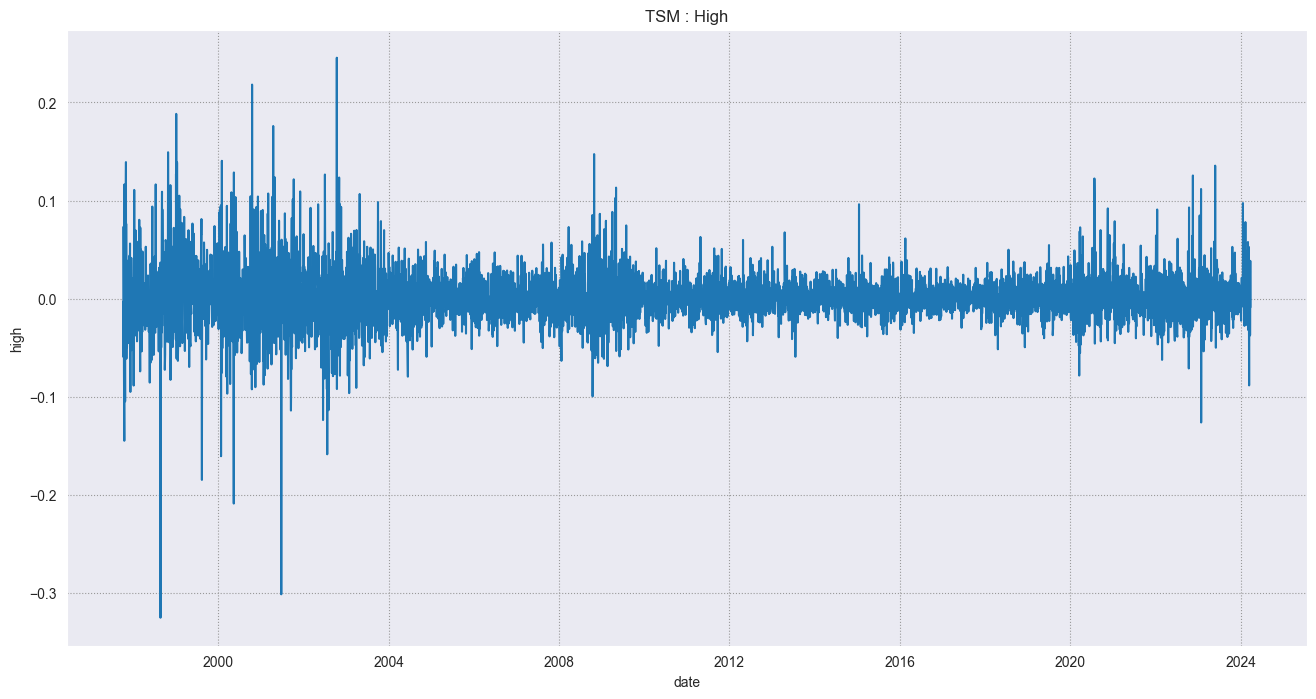

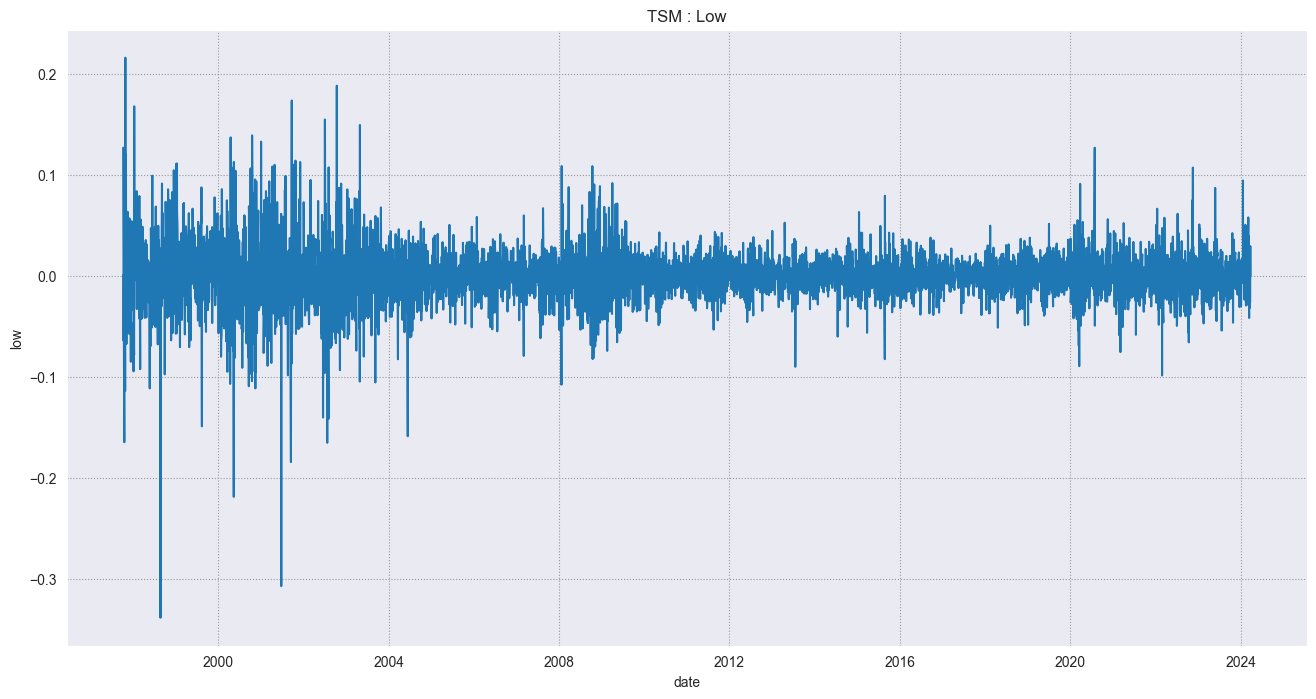

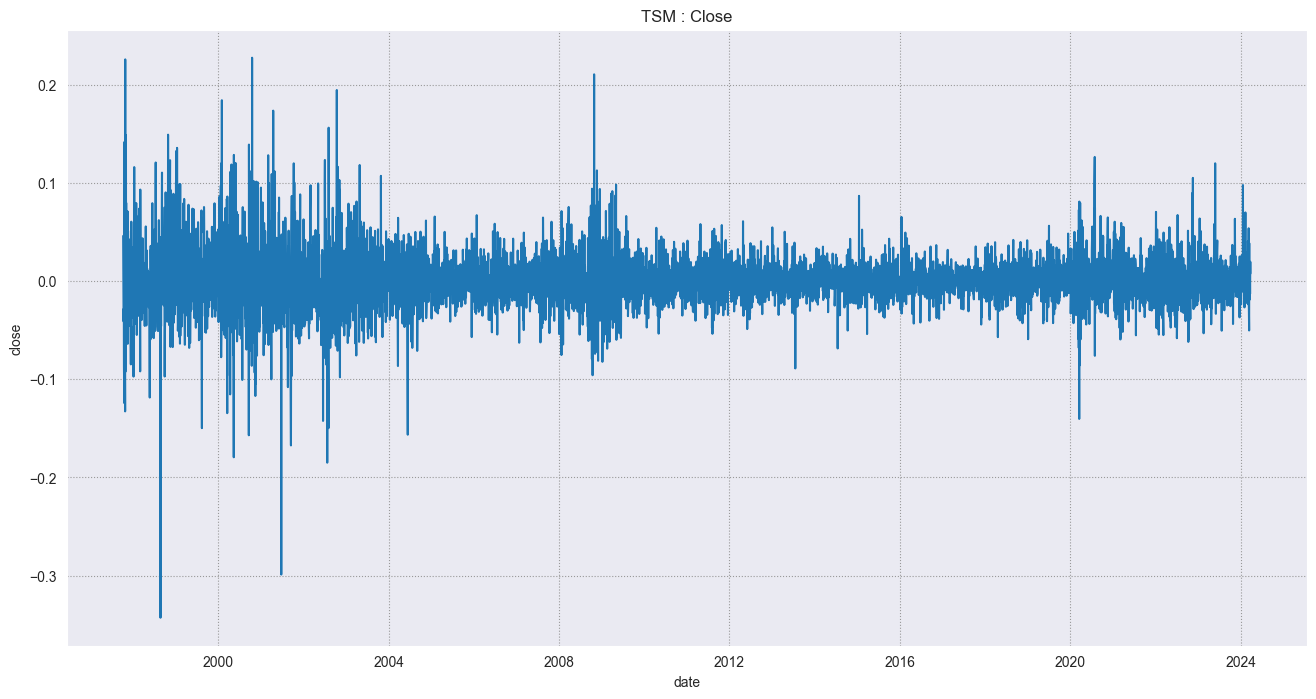

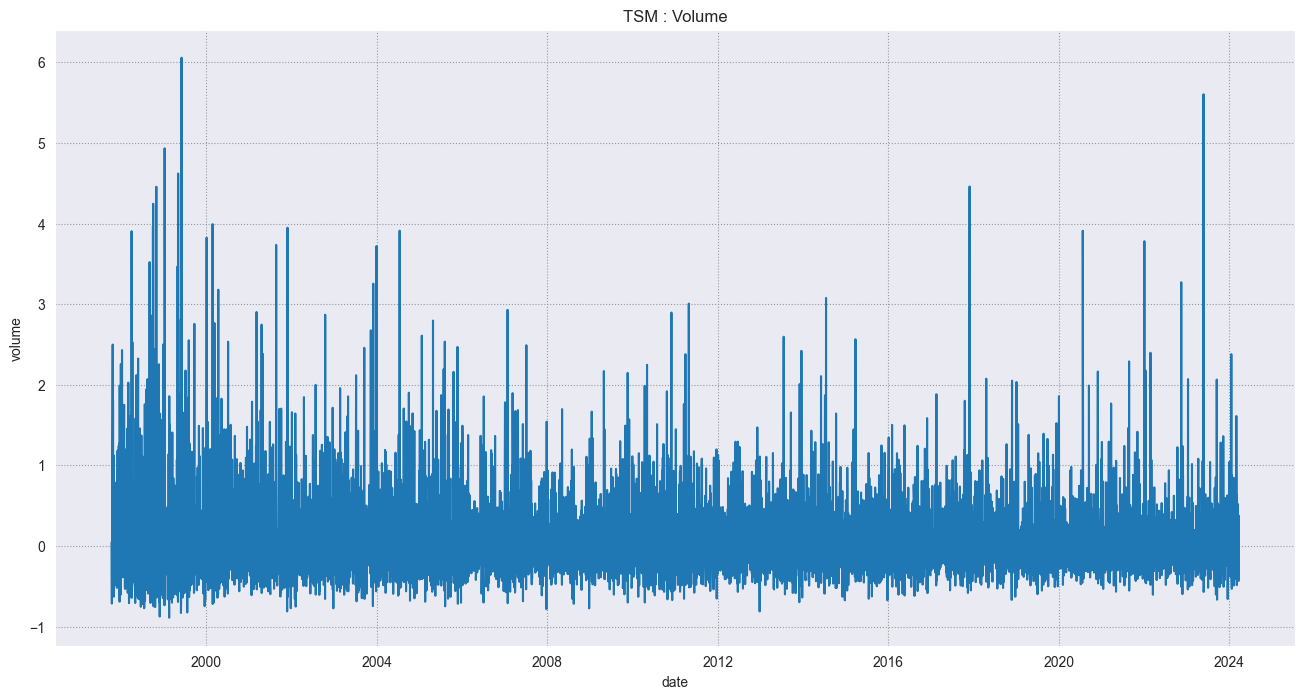

In [37]:
# graph the values for each of the stock tickers
for ticker in df_diff['ticker'].unique():
    for col in df_diff.drop(['date', 'ticker'], axis=1).columns:
        line_graph(df_diff, ticker, col)